<a href="https://colab.research.google.com/github/lambdabypi/AppliedGenAIIE5374/blob/main/M4_Lab2_GenAI_BeerGame_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

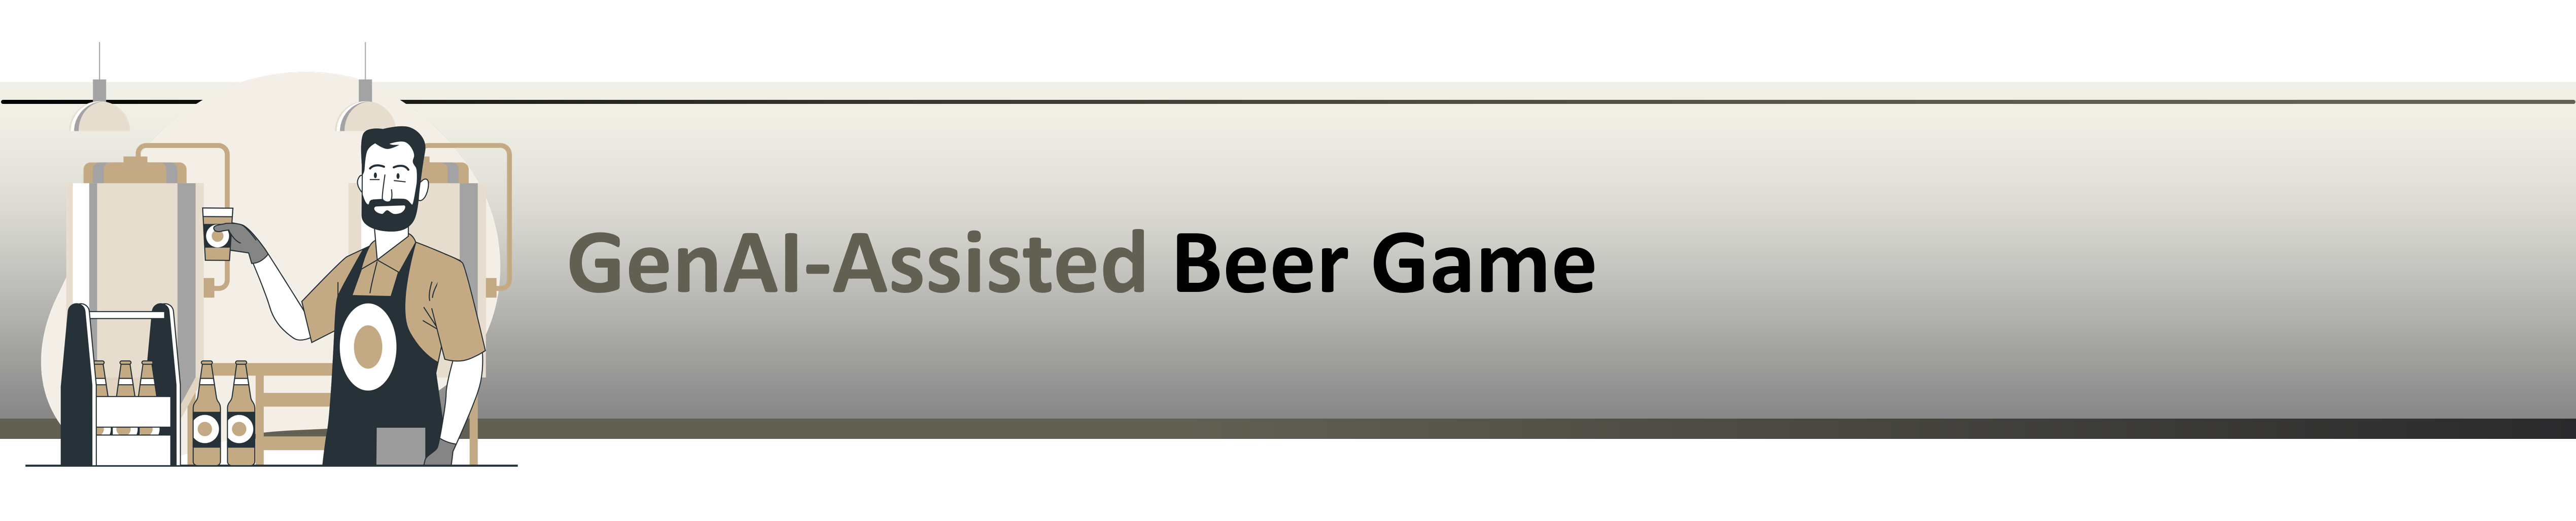

#  GenAI-Assisted Beer Game
- Applied Generative AI
- Author: Prof. Dehghani
## 🎯 **Aim of the Game**
The goal of the Beer Game simulation is to **understand and explore how Generative AI (GenAI)** can assist with supply chain modeling and optimization, specifically in the context of the Beer Game. By leveraging AI, participants can:
- Enhance decision-making processes.
- Analyze and reduce inefficiencies in supply chain systems.
- Improve outcomes with **better prompting**, **fine-tuning models**, and **strategic AI integration**.

---

## 🛠️ **Main Factors of the Beer Game**
The Beer Game simulates the complexities of a supply chain, focusing on key factors such as:
1. **Cost Management**:
   - Holding costs: Expenses for storing excess inventory.
   - Shortage costs: Penalties for running out of stock.
2. **Order Fulfillment**:
   - Balancing orders to meet customer demand without overstocking.
3. **Information Flow**:
   - Communication delays between supply chain levels (retailer, wholesaler, distributor, manufacturer).
4. **Lead Times**:
   - The delay between placing an order and receiving the shipment.

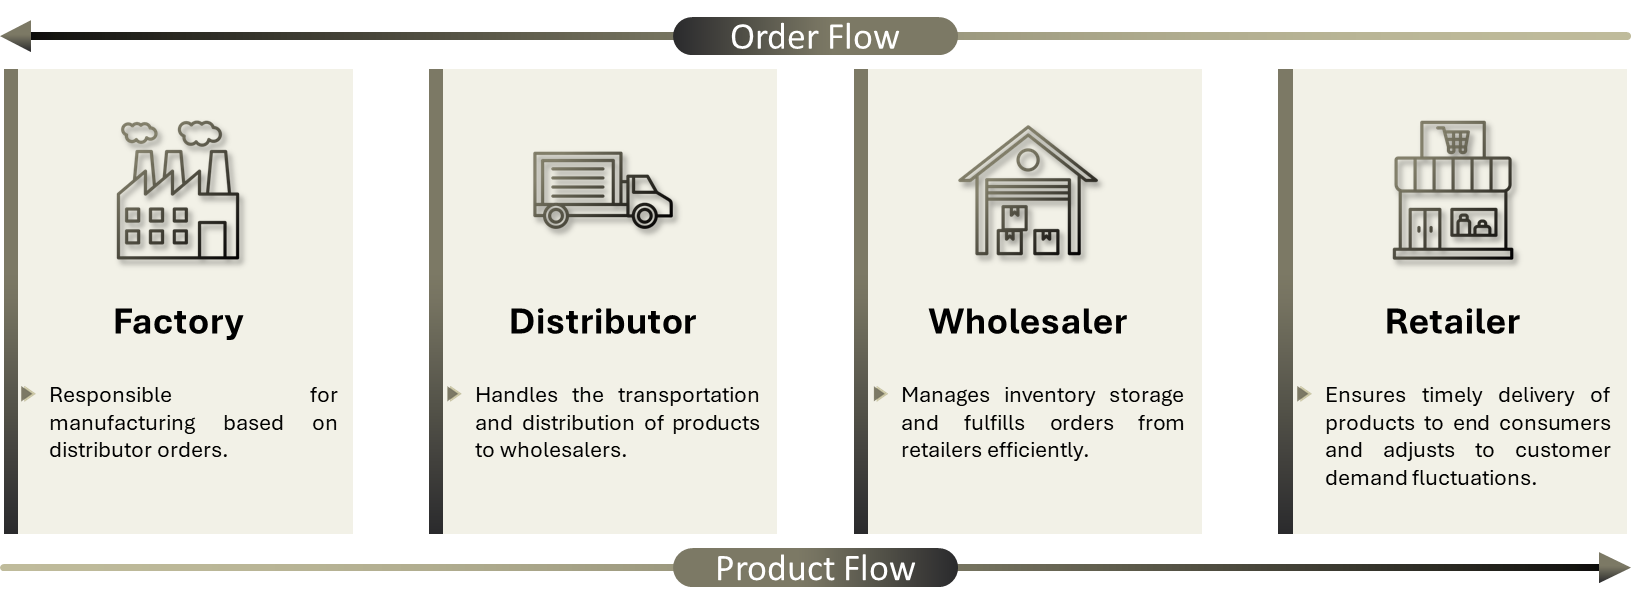
---

## 🌊 **The Bullwhip Effect**
The **Bullwhip Effect** refers to the amplification of demand variability as it moves upstream in a supply chain. Small fluctuations in customer demand at the retailer level can lead to:
- **Larger inventory swings** upstream (wholesalers, distributors, manufacturers).
- **Increased costs** due to overproduction or stockouts.
### 🌟 Key Causes of the Bullwhip Effect:
- Delayed information flow.
- Overreaction to demand changes.
- Batch ordering and infrequent restocking.

---

## 🎥 **Learn More**
To gain a deeper understanding of the Beer Game and its dynamics, watch this video:
[📹 Click Here to Watch the Beer Game Simulation](https://www.youtube.com/watch?v=0y6G7gow0a8)

---

By combining Generative AI with supply chain modeling, we can develop smarter strategies to reduce inefficiencies and improve the overall performance of the supply chain. Let's get started and explore how AI can revolutionize this classic simulation!


In [82]:

# ==================================================
# 📌 Essential Imports for Beer Game Simulation
# ==================================================

import re        # Regular expressions for text processing and pattern matching
import random    # Random number generation for simulation randomness
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Visualization and plotting
import requests  # HTTP requests to fetch data (e.g., API calls)
import ipywidgets as widgets  # Interactive widgets for creating UI elements
from IPython.display import display, HTML  # For displaying formatted HTML and widgets in Jupyter
import os        # Operating system interaction (e.g., file paths, environment variables)
from IPython.display import clear_output  # Import clear_output to fix the NameError
import openai    # OpenAI library for interacting with AI models (e.g., GPT APIs)


In [83]:
# 🔑 Configure API keys from Colab Secrets
from google.colab import userdata
import openai

# Secret names must be exactly 'OPENAI_API_KEY'
openai.api_key = userdata.get('OPENAI_API_KEY')

print("✅ API keys loaded successfully.")


✅ API keys loaded successfully.


In [84]:
# ==========================================================
# 🌟 OpenAI API Call Function for Beer Game Simulation
# ==========================================================
# This function facilitates calls to OpenAI's ChatGPT API to generate
# expert-level responses related to the Beer Game and supply chain modeling.
# Usage: Configure parameters like prompts, model, temperature, and max tokens.
# ==========================================================

from google.colab import userdata
from openai import OpenAI, AuthenticationError, OpenAIError

# 🔑 Load your OpenAI key from Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

# ⚠️ Pass the key when instantiating the client
client = OpenAI(api_key=api_key)

def call_ChatGPT(
    user_prompt: str,
    system_prompt: str = "You are a supply chain expert for the Beer Game.",
    model: str = "gpt-4-turbo",
    temperature: float = 0.7,
    max_tokens: int = 500
) -> str:
    """
    Calls OpenAI's ChatGPT API with configurable parameters.

    Parameters:
        user_prompt (str): Required. The user's input question or command.
        system_prompt (str): Optional. Context for the AI (default: Beer Game expert).
        model (str): Optional. OpenAI model to use (default: "gpt-4-turbo").
        temperature (float): Optional. Controls randomness (default: 0.7).
        max_tokens (int): Optional. Limits response length (default: 500).

    Returns:
        str: ChatGPT's response or an error message.
    """
    if not user_prompt:
        return "❌ Error: A user prompt is required."

    try:
        res = client.chat.completions.create(
            model=model,
            temperature=temperature,
            max_tokens=max_tokens,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user",   "content": user_prompt}
            ],
        )
        return res.choices[0].message.content

    except AuthenticationError:
        return "❌ Invalid API key. Please check your API credentials."
    except OpenAIError as e:
        return f"❌ OpenAI API error: {e}"
    except Exception as e:
        return f"❌ An unexpected error occurred: {e}"


# ==== Test the OpenAI Call Function ====
if __name__ == "__main__":
    test_prompt = "How does the Beer Game illustrate supply chain dynamics (5 words)?"
    print("🔹 ChatGPT Response:\n")
    print(call_ChatGPT(test_prompt))


🔹 ChatGPT Response:

Demonstrates delays, interdependence, inventory fluctuations.


In [85]:
# ==========================================================
# 🌟 Demand Variability Module
# ==========================================================
# This function models demand variability in the Beer Game simulation.
# It supports two types of demand patterns:
#   1. Market Fluctuation: Random uniform demand.
#   2. Seasonal Demand: Periodic cycles with randomness.
# Usage: Configure `demand_type` and optionally `period` for Seasonal Demand.
# ==========================================================

def define_demand_distribution(demand_type, period=None):
    """
    Generates demand directly based on the selected type.

    Parameters:
        - demand_type (str): The type of demand ('Market Fluctuation' or 'Seasonal Demand').
        - period (int, optional): The current period, required for 'Seasonal Demand'.

    Returns:
        - demand (int): The generated numeric demand value.
    """
    if demand_type == "Market Fluctuation":
        # Generate random demand using a uniform distribution
        return np.random.randint(9, 15)  # B = 12, V = 3

    elif demand_type == "Seasonal Demand":
        if period is None:
            raise ValueError("Period is required for Seasonal Demand.")

        # Generate demand following a 5-period cycle with randomness
        cycle_phase = period % 5
        seasonal_factors = [
            np.random.randint(-4, 0),  # Low
            np.random.randint(-2, 1),  # Medium
            np.random.randint(1, 2),   # High
            np.random.randint(3, 6),   # Peak
            np.random.randint(-2, 2)   # Medium again
        ]
        return max(5, min(20, 11 + seasonal_factors[cycle_phase]))  # Clamp demand between 5 and 20

    else:
        raise ValueError("Invalid demand type selected.")


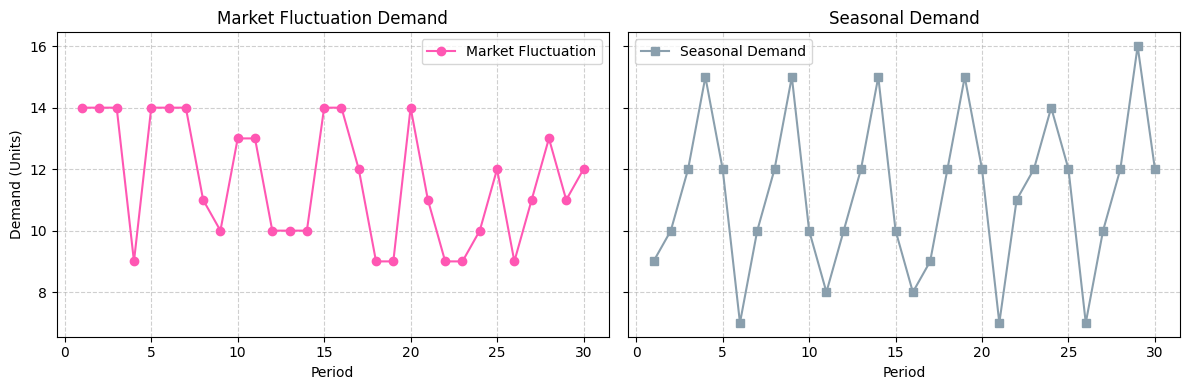

In [86]:
# ==========================================================
# 📊 Demand Simulation and Visualization
# ==========================================================
# This script simulates and plots demand over 30 periods for:
#   1. Market Fluctuation: Random variations in demand.
#   2. Seasonal Demand: Cyclical patterns with randomness.
# ==========================================================


# Number of periods for simulation
periods = 30

# Generate demand for 30 periods
market_demand = [define_demand_distribution("Market Fluctuation") for _ in range(periods)]
seasonal_demand = [define_demand_distribution("Seasonal Demand", p) for p in range(periods)]  # Pass period as positional

# ==== Plot Results Side by Side ====
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Market Fluctuation Demand Plot
axes[0].plot(range(1, periods + 1), market_demand, marker='o', linestyle='-', color='#FF57B3', label="Market Fluctuation")
axes[0].set_title("Market Fluctuation Demand")
axes[0].set_xlabel("Period")
axes[0].set_ylabel("Demand (Units)")
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Seasonal Demand Plot
axes[1].plot(range(1, periods + 1), seasonal_demand, marker='s', linestyle='-', color='#8A9FAD', label="Seasonal Demand")
axes[1].set_title("Seasonal Demand")
axes[1].set_xlabel("Period")
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()


In [87]:
# ==========================================================
# ⚙️ GenAI Order Quantity Optimization Module
# ==========================================================
# This function leverages Generative AI to calculate the optimal order quantity
# based on inventory, demand data, and cost considerations. It uses OpenAI's API
# to provide data-driven insights and justifications.
# Features:
#   - Integrates historical data for trend analysis.
#   - Balances holding and backorder costs for decision-making.
#   - Optionally returns detailed justifications for suggested orders.
# Usage: Pass inventory and cost data as parameters to receive optimal results.
# ==========================================================

def GenAI_Order_Quantity(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """
    Generates an optimal order quantity based on inventory and historical data.
    Uses OpenAI's API via the `call_ChatGPT` function for decision-making.

    Parameters:
        - table_part1 (DataFrame): Inventory-related data (last 3 weeks).
        - table_part2 (DataFrame): Demand, costs, and order data (last 3 weeks).
        - holding_cost (int): Cost per unit of holding inventory.
        - backorder_cost (int): Cost per unit of backorder.
        - justification (bool): Whether to return a justification.

    Returns:
        - order_quantity (int): Suggested order quantity.
        - justification_text (str): Explanation (if justification=True).
    """

    # Extract recent data summaries
    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):  # Limit to last 3 weeks
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]

        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    # Create the prompt for OpenAI
    prompt = (
        f"Based on the following recent inventory data:\n{trend_summary}\n"
        f"- Holding cost per unit: {holding_cost}\n"
        f"- Backorder cost per unit: {backorder_cost}\n\n"
        "Determine the optimal order quantity for next week.\n"
        "Use expected inventory calculations:\n"
        "Expected Inventory = Current Inventory - Expected Demand (which varies between 5 and 20) + Incoming Shipments.\n\n"
        "Suggest an order quantity that balances holding and backorder costs while ensuring optimal stock levels.\n\n"
        "Please provide your result explicitly in the following format with no additional text:\n"
        "'Suggest Order Quantity is: [your calculated quantity]'."
    )

    if justification:
        prompt += " Also, provide a short justification for your decision."

    # Call OpenAI API using the optimized function
    response_text = call_ChatGPT(prompt, system_prompt="You are an inventory optimization assistant.")

    # Extract order quantity from AI response
    match = re.search(r'\b\d+\b', response_text)
    order_quantity = int(match.group()) if match else None

    return order_quantity, (response_text if justification else None)


In [88]:
# ==========================================================
# 📦 Order Quantity Determination Module
# ==========================================================
# This function determines the optimal order quantity using one of the following approaches:
#   1. Manual: User manually inputs the order quantity.
#   2. GenAI-Assisted: AI suggests an order, and the user finalizes it.
#   3. Full Gen-AI: AI fully automates the decision-making process.
#   4. Average: Calculates the average demand based on historical data.
# Features:
#   - Supports multiple decision-making approaches.
#   - Balances holding and backorder costs dynamically.
#   - Provides justifications for AI-driven decisions.
# Usage: Select an approach and provide inventory data and cost parameters.
# ==========================================================

def get_order_quantity(approach, table_part1, table_part2, holding_cost, backorder_cost):
    """
    This function determines the order quantity based on the selected approach.
    It can either take manual input from the user, use a GenAI-assisted suggestion,
    fully automate the decision-making with GenAI, or calculate the average demand.

    Parameters:
    - approach: The approach used to determine the order quantity ('Manual', 'GenAI-Assisted', 'Full Gen-AI', 'Average').
    - table_part1: A part of the table with relevant inventory and shipment information.
    - table_part2: A part of the table with order quantity, demand, and cost data.
    - holding_cost: The cost of holding inventory for a given period.
    - backorder_cost: The cost incurred for not fulfilling an order on time.

    Returns:
    - order_quantity: The determined order quantity (either from user input, average calculation, or GenAI).
    - justification_text: A justification for the decision, if applicable.
    """

    # Print the approach in green every time the function is used
    print(f"Using approach: \033[92m{approach}\033[0m")  # Only the approach is colored green

    # Handle the 'average' approach
    if approach == 'average':
        # Calculate the average of non-null "Demand" values
        average_demand = table_part2['Demand'].dropna().mean()

        # If all demand values are null, generate a random integer between 8 and 12
        if pd.isna(average_demand):
            average_demand = random.randint(8, 12)
        else:
            # Convert the average to an integer
            average_demand = int(round(average_demand))

        print(f"Average Demand: {average_demand}")
        justification_text = "The order quantity was calculated as the average of non-null demand values or a random value if all were null."
        return average_demand, justification_text

    # Handle the 'Manual' approach
    elif approach == 'Manual':
        # If the approach is 'Manual', the user enters the order quantity
        order_quantity = int(input("Enter the order quantity manually: "))
        return order_quantity, None

    # Handle the 'GenAI-Assisted' or 'Full Gen-AI' approach
    elif approach == 'GenAI-Assisted' or approach == 'Full Gen-AI':
        # If the approach is 'GenAI-Assisted' or 'Full Gen-AI', GenAI provides a suggestion
        suggested_order, justification = GenAI_Order_Quantity(
            table_part1, table_part2, holding_cost, backorder_cost, justification=True
        )

        # Print the suggestion and justification
        print(f"AI Suggestion: {suggested_order}")
        print(f"Justification: {justification}")

        # Get the final order quantity from the user for GenAI-assisted approach
        if approach == 'GenAI-Assisted':
            order_quantity = int(input(f"Enter the final order quantity for {suggested_order}: "))
        else:
            # If the approach is 'Full Gen-AI', use the suggestion without modification
            order_quantity = suggested_order

        return order_quantity, justification

    else:
        # Raise an error if the provided approach is invalid
        raise ValueError("Invalid approach specified. Choose 'Manual', 'GenAI-Assisted', 'Full Gen-AI', or 'Average'.")


In [89]:
# ==========================================================
# 📦 Initial Inventory, Cost, and Supply Chain Parameters
# ==========================================================

# ---------- Initial Inventory Values for Each Role ----------
initial_inventories = {
    'Retailer': 10,
    'Wholesaler': 15,
    'Distributor': 20,
    'Factory': 25
}

# ---------- Cost Parameters ----------
holding_cost = 1            # Cost per unit of inventory held
backorder_cost = 2          # Cost per unit of backorder (penalty for unfilled demand)

# ---------- Lead Times ----------
lead_times = {
    'Retailer': 1,
    'Wholesaler': 2,
    'Distributor': 3,
    'Factory': 3
}

# ---------- Incoming Shipments ----------
incoming_shipments = {
    'Retailer': [(5, 1)],
    'Wholesaler': [(6, 1), (4, 2)],
    'Distributor': [(8, 1), (6, 2), (5, 3)],
    'Factory': [(10, 1), (8, 2), (7, 3)]
}

In [90]:
# ==========================================================
# 🎮 Beer Game Player Setup & Welcome Module
# ==========================================================
# This module manages player roles, demand settings, and game initialization.
# Features:
#   - Dynamically assigns roles to users and AI players.
#   - Generates a structured welcome message with user selections.
#   - Uses interactive widgets for user input.
#   - Provides a clean and engaging UI for game setup.
# Usage: The user selects their role and settings, and the game initializes dynamically.
# ==========================================================

# ---------- Seed for Reproducibility ----------
random.seed(42)  # Ensures AI assignments remain the same on reruns

def generate_welcome_message(role, demand_type, weeks, user_name, players, approach):
    """
    Displays a styled welcome message with user selections and player flow.
    """
    # 🎮 Clean & minimal emoji use for readability
    message = f"""
    <h2>Welcome, {user_name}! 🚀</h2>
    <p><b>Game Settings:</b></p>
    <ul>
        <li><b>Role:</b> {role}</li>
        <li><b>Demand Type:</b> {demand_type}</li>
        <li><b>Number of Weeks:</b> {weeks}</li>
        <li><b>Approach:</b> {approach}</li>
    </ul>
    <p><b>Players in the Game:</b></p>
    <p>{players}</p>
    <p>Let's begin!</p>
    """

    # Display the message
    display(HTML(message))


def generate_players(user_name, role):
    """
    Generates a list of players in the game, inserting the user into the correct role
    and assigning AI players to other roles.
    """
    # Define the fixed role order: Retailer -> Supplier -> Wholesaler -> Manufacturer
    fixed_roles = ['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer']

    # List of AI player names
    ai_names = ['AI-Retail', 'AI-Supply', 'AI-Wholesale', 'AI-Manufacture']

    players_flow = []  # List to store player roles and names

    for r in fixed_roles:
        if r == role:
            players_flow.append(f"<strong>{user_name}</strong> ({r})")  # Add the user
        else:
            ai_name = ai_names.pop(0)  # Assign AI names dynamically
            players_flow.append(f"<strong>{ai_name}</strong> ({r})")  # Assign AI

    return " ➡️ ".join(players_flow)  # Use arrow emoji for better visual clarity


# ---------- Define Input Widgets ----------
role_input = widgets.Dropdown(
    options=['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'],
    value='Retailer',
    description='Role:',
)

demand_input = widgets.Dropdown(
    options=['Market Fluctuation', 'Seasonal Demand'],
    value='Market Fluctuation',
    description='Demand:',
)

weeks_input = widgets.IntText(
    value=12,
    description='Weeks:',
    min=1,
)

name_input = widgets.Text(
    value='User',
    description='Your Name:',
)

approach_input = widgets.Dropdown(
    options=['Manual', 'GenAI-Assisted', 'Full Gen-AI'],
    value='Manual',
    description='Approach:',
)

start_button = widgets.Button(description="🚀 Start Game")


def on_start_button_click(b):
    """
    Handles the 'Start Game' button click, clears previous output, captures inputs, and displays the welcome message.
    """
    # Clear previous outputs to prevent stacking messages
    clear_output(wait=True)

    # Redisplay input widgets & button after clearing
    display(role_input, demand_input, weeks_input, name_input, approach_input, start_button)

    # Capture user inputs
    role = role_input.value
    demand_type = demand_input.value
    weeks = weeks_input.value
    user_name = name_input.value
    approach = approach_input.value

    # Generate players list
    players = generate_players(user_name, role)

    # Display the welcome message
    generate_welcome_message(role, demand_type, weeks, user_name, players, approach)

In [91]:
# ==========================================================
# 🔄 Supply Chain Simulation Table Generator
# ==========================================================
# This module generates a comprehensive supply chain table covering all roles:
#   - Retailer, Wholesaler, Distributor, and Factory.
# Features:
#   - Simulates inventory levels, order quantities, costs, and shipments.
#   - Supports different demand types and decision-making approaches.
#   - Provides detailed summaries with visualizations for tracking performance.
# Usage: Generates structured tables based on user-selected parameters.
# ==========================================================


# Main function to generate supply chain table for all roles based on the selected approach and parameters
def generate_supply_chain_table_for_all_roles(detailed_summary=False):
    """
    This function generates supply chain data for all roles (Retailer, Wholesaler, Distributor, Factory) over a
    specified number of weeks. The data includes inventory levels, order quantities, backorders, costs, and incoming shipments.

    Parameters:
    - detailed_summary: Boolean indicating if detailed weekly summaries should be displayed.

    Returns:
    - all_tables: A dictionary containing the generated data tables for each role.
    """

    # Get the values from the input widgets
    role_to_display = role_input.value  # Default to user-selected role from widget
    approach = approach_input.value  # Use approach from input widget
    weeks = weeks_input.value  # Use number of weeks from input widget
    demand_type = demand_input.value  # Use demand type from input widget

    all_tables = {}  # Initialize dictionary to store the tables for each role
    previous_orders = {}  # Dictionary to track order quantities for each role
    previous_orders["Retailer"] = define_demand_distribution(demand_type, period=0)  # Initial customer demand for Retailer

    previous_role = None  # Initialize previous_role to None for loop

    # Iterate through each role in order: Retailer -> Wholesaler -> Distributor -> Factory
    for role in ["Retailer", "Wholesaler", "Distributor", "Factory"]:
        data = []  # List to store data for the current role
        inventory = initial_inventories[role]  # Initial inventory for the role
        backorder = 0  # Backorder for the role, initialized to 0
        cumulative_total_cost = 0  # Cumulative total cost, initialized to 0
        incoming_shippings = incoming_shipments[role]  # Incoming shipments for the role

        # Add Week 0 as the initial setup week
        data.append({
            "Week": 0,
            "Role": role,
            "Inventory": inventory,
            "Incoming Shipping": incoming_shippings.copy(),
            "Order Quantity": None,
            "Demand": None,
            "Excess Inventory": None,
            "Backorder": None,
            "Holding Cost": None,
            "Backorder Cost": None,
            "Total Cost": cumulative_total_cost
        })

        # Loop over each week (from 1 to the number of weeks specified by the user)
        for i in range(1, weeks + 1):
            # Set demand based on the role's type of demand
            if role == "Retailer":
                demand = define_demand_distribution(demand_type, i)  # Generate customer demand for Retailer
            else:
                # Get demand from the Order Quantity of the previous role’s table_part2 for the same week
                demand = all_tables[previous_role][1].loc[
                    all_tables[previous_role][1]['Week'] == i, 'Order Quantity'
                ].values[0]

            # Process incoming shipments that have arrived this week
            arrived_shipments = [shipment[0] for shipment in incoming_shippings if shipment[1] == i]
            arrived_shipments = [shipment for shipment in arrived_shipments if shipment is not None]  # Remove None values
            total_arrived = sum(arrived_shipments)  # Calculate total arrived shipments for the week
            incoming_shippings = [shipment for shipment in incoming_shippings if shipment[1] != i]

            # Generate the order quantity based on the selected approach (Manual, GenAI-Assisted, or Full Gen-AI)
            temp_table_part1 = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]]
            temp_table_part2 = pd.DataFrame(data)[[
                "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                "Holding Cost", "Backorder Cost", "Total Cost"
            ]]

            if detailed_summary and role == role_to_display:
                # Clear the output of the current cell
                clear_output(wait=True)
                separator = "=" * 40  # Separator for visibility
                week_text = f"{i}"

                # Display the separator and centered "Week {i}" text in purple color using HTML
                display(HTML(f"<h3 style='text-align:center; color: purple;'>{week_text.center(len(separator))}</h3>"))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Display summary and detailed data for the current week in a table
                summary_df = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]].head(i + 1)
                detailed_df = pd.DataFrame(data)[[
                    "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                    "Holding Cost", "Backorder Cost", "Total Cost"
                ]].head(i)

                # Merge both DataFrames on "Week" and display the combined table as HTML
                combined_df = pd.merge(summary_df, detailed_df, on=["Week", "Role"], how="outer")
                display(HTML(combined_df.to_html(index=False)))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Plotting the order and demand for the current role
                plt.figure(figsize=(10, 4))
                plt.plot(combined_df['Week'], combined_df['Order Quantity'], label="Order Quantity",
                         marker='o', linestyle='-', color='blue')
                plt.plot(combined_df['Week'], combined_df['Demand'], label="Demand",
                         marker='x', linestyle='--', color='red')
                plt.title(f"Order Quantity vs Demand for {role} (Week {i})", fontsize=14)
                plt.xlabel("Week", fontsize=12)
                plt.ylabel("Quantity", fontsize=12)
                plt.legend(loc='lower right')
                plt.grid(True, which='both', axis='y')  # Only show horizontal grid lines
                plt.xticks(ticks=combined_df['Week'], labels=[f"Week {x}" for x in combined_df['Week']], rotation=45)
                plt.ylim(bottom=0)  # Set the y-axis to start from 0
                # Handle NaN values by using 'fillna' with 0 before calculating the maximum
                max_y = int(combined_df[['Order Quantity', 'Demand']].fillna(0).max().max()) + 4
                plt.yticks(range(0, max_y, 1))  # Show integer ticks from 0 to max_y
                plt.show()

            # Check if the current role is the selected role
            if role == role_to_display:
                # Use the selected approach for the displayed role
                order_quantity, justification_text = get_order_quantity(
                    approach, temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )
            else:
                # For other roles, use the "average" approach
                order_quantity, justification_text = get_order_quantity(
                    "average", temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )

            # Calculate inventory and backorder after demand fulfillment
            net_inventory = inventory - demand + total_arrived
            excess_inventory = max(0, net_inventory)  # Ensure no negative excess inventory
            backorder = abs(min(0, net_inventory))  # Calculate backorder if inventory is negative

            # Calculate holding cost, backorder cost, and weekly total cost
            holding_cost_week = excess_inventory * holding_cost
            backorder_cost_week = backorder * backorder_cost
            weekly_total_cost = holding_cost_week + backorder_cost_week
            cumulative_total_cost += weekly_total_cost  # Update the cumulative total cost

            # Schedule new incoming shipment for the next week based on lead times
            incoming_shippings.append((order_quantity, i + lead_times[role]))

            # Append weekly data to the table
            data.append({
                "Week": i,
                "Role": role,
                "Inventory": inventory,
                "Incoming Shipping": incoming_shippings.copy(),
                "Order Quantity": order_quantity,
                "Demand": demand,
                "Excess Inventory": excess_inventory,
                "Backorder": backorder,
                "Holding Cost": holding_cost_week,
                "Backorder Cost": backorder_cost_week,
                "Total Cost": cumulative_total_cost
            })

            # Update inventory for next week based on excess inventory
            inventory = excess_inventory
            previous_orders[role] = order_quantity  # Store this role's order quantity for the next role

        # Convert the final data into a DataFrame for this role
        full_table = pd.DataFrame(data)
        table_part1 = full_table[["Week", "Role", "Inventory", "Incoming Shipping"]]
        table_part2 = full_table[[
            "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
            "Holding Cost", "Backorder Cost", "Total Cost"
        ]]

        # Store the tables for this role
        all_tables[role] = (table_part1, table_part2)

        # Update previous_role for the next role in the iteration
        previous_role = role

    # Display tables based on role_to_display parameter
    if role_to_display == "All":
        for role, tables in all_tables.items():
            table_part1, table_part2 = tables
            display(HTML(f"<h3>Final Part 1 for {role}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
    else:
        # Display only the specified role's tables
        if role_to_display in all_tables:
            table_part1, table_part2 = all_tables[role_to_display]
            display(HTML(f"<h3>Final Part 1 for {role_to_display}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role_to_display}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
        else:
            print(f"Role '{role_to_display}' not found in the supply chain roles.")

    return all_tables


In [25]:
# ==========================================================
# 🎮 Game Initialization & User Input Handling
# ==========================================================

# Set the button click event handler
start_button.on_click(on_start_button_click)

# Display the input widgets
display(role_input, demand_input, weeks_input, name_input, approach_input, start_button)

Dropdown(description='Role:', options=('Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'), value='Retailer'…

Dropdown(description='Demand:', options=('Market Fluctuation', 'Seasonal Demand'), value='Market Fluctuation')

IntText(value=10, description='Weeks:')

Text(value='Shreyas', description='Your Name:')

Dropdown(description='Approach:', index=2, options=('Manual', 'GenAI-Assisted', 'Full Gen-AI'), value='Full Ge…

Button(description='🚀 Start Game', style=ButtonStyle())

Week,Role,Inventory,Incoming Shipping,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,10,"[(5, 1)]",NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10,"[(10, 2)]",10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,4,"[(1, 3)]",1.0,9.0,5.0,0.0,5.0,0.0,9
3,Retailer,5,"[(2, 4)]",2.0,13.0,0.0,7.0,0.0,14.0,23
4,Retailer,0,"[(2, 5)]",2.0,11.0,0.0,9.0,0.0,18.0,41
5,Retailer,0,"[(1, 6)]",1.0,12.0,0.0,10.0,0.0,20.0,61
6,Retailer,0,"[(3, 7)]",3.0,13.0,0.0,12.0,0.0,24.0,85
7,Retailer,0,"[(1, 8)]",1.0,9.0,0.0,6.0,0.0,12.0,97
8,Retailer,0,"[(3, 9)]",3.0,9.0,0.0,8.0,0.0,16.0,113
9,Retailer,0,"[(0, 10)]",0.0,13.0,0.0,10.0,0.0,20.0,133


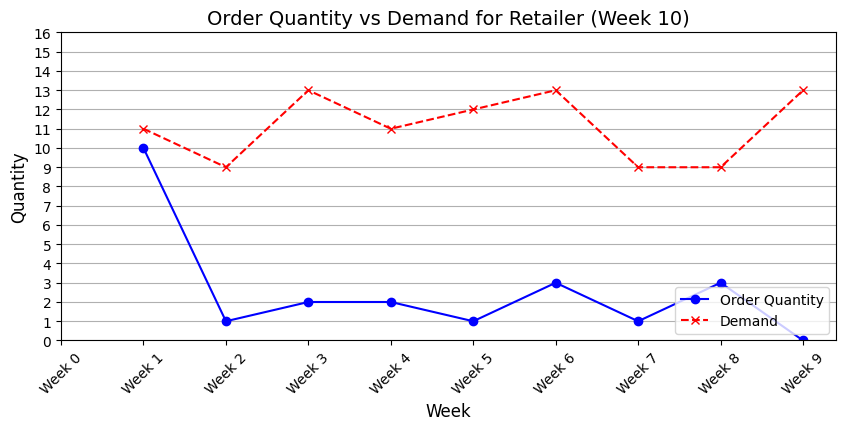

Using approach: Full Gen-AI
AI Suggestion: 3
Justification: To determine the optimal order quantity, we need to consider the expected inventory for the coming week and balance the costs associated with holding excess inventory and incurring backorders.

### Week 3 Data:
- **Current Inventory**: 4 units
- **Incoming Shipments**: 1 unit (arriving in Week 3)
- **Expected Demand**: varies between 5 and 20 units

### Calculations:
1. **Expected Inventory without additional order**:
   \[ Expected Inventory = Current Inventory + Incoming Shipments - Expected Demand \]
   \[ Expected Inventory = 4 + 1 - \text{[5 to 20]} = 5 - \text{[5 to 20]} \]
   \[ Expected Inventory ranges from 0 to -15 \]

   If we order X units, the Expected Inventory becomes:
   \[ Expected Inventory = 5 + X - \text{[5 to 20]} \]
   \[ Expected Inventory ranges from X to X - 15 \]

2. **Balancing Costs**:
   - **Holding Cost** is 1 per excess unit.
   - **Backorder Cost** is 2 per unit short.

   To minimize costs, we 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(1, 3)]"
3,Retailer,5,"[(2, 4)]"
4,Retailer,0,"[(2, 5)]"
5,Retailer,0,"[(1, 6)]"
6,Retailer,0,"[(3, 7)]"
7,Retailer,0,"[(1, 8)]"
8,Retailer,0,"[(3, 9)]"
9,Retailer,0,"[(0, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,1.0,9.0,5.0,0.0,5.0,0.0,9
3,Retailer,2.0,13.0,0.0,7.0,0.0,14.0,23
4,Retailer,2.0,11.0,0.0,9.0,0.0,18.0,41
5,Retailer,1.0,12.0,0.0,10.0,0.0,20.0,61
6,Retailer,3.0,13.0,0.0,12.0,0.0,24.0,85
7,Retailer,1.0,9.0,0.0,6.0,0.0,12.0,97
8,Retailer,3.0,9.0,0.0,8.0,0.0,16.0,113
9,Retailer,0.0,13.0,0.0,10.0,0.0,20.0,133


In [26]:
# Generate and display the supply chain tables for all roles with detailed summary
all_tables = generate_supply_chain_table_for_all_roles(detailed_summary=True)

In [27]:
# ==========================================================
# 📂 Save & Download Retailer Table
# ==========================================================
# Exports the Retailer table with user details and timestamps.
# Saves as CSV and triggers download in Google Colab.
# ==========================================================

from google.colab import files
import time
import pytz
from datetime import datetime

# Assuming `all_tables` is a dictionary and you want the "Retailer" table
retailer_table = pd.concat(all_tables["Retailer"], axis=1)  # Combine table_part1 and table_part2 for Retailer

# Add 'username' and 'approach' columns
retailer_table['username'] = name_input.value  # Add username column
retailer_table['approach'] = approach_input.value  # Add approach column

# Get the current time in EST
est = pytz.timezone('US/Eastern')
current_time_est = datetime.now(est).strftime("Time:%H-%M-%S")  # Format time as HH-MM-SS in EST

# Generate the file name using name_input, approach_input, and EST time
file_name = f"{name_input.value}_{approach_input.value}_{current_time_est}_retailer_table.csv"

# Save the Retailer table to a CSV file
retailer_table.to_csv(file_name, index=False)

# Download the file
files.download(file_name)
print(f"Retailer table saved and ready for download: {file_name}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Retailer table saved and ready for download: Shreyas_Full Gen-AI_Time:17-09-06_retailer_table.csv


In [14]:
def display_congratulations(input_user):
    message = f"""
    🎉✨ <h2 style='color:green;'>Congratulations, {input_user}! 🎉</h2> ✨
    <p style='font-size:16px;'>You have successfully completed this lab. Great job! 🚀</p>
    <p style='font-weight:bold;'>- Prof. Dehghani</p>
    """
    from IPython.display import display, HTML
    display(HTML(message))

# Example Usage
display_congratulations(name_input)


# Part 1: Prompt Engineering & Model Performance (Max: 2-page Report)
1. Set the model approach to **FullGenAI** and experiment with different prompting strategies to analyze their impact on performance.
2. Try at multiple distinct prompts to see if prompting can improve the results. Experiment with different approaches, such as:
    - **Trying multiple ChatGPT models** to compare reasoning quality.
    - **Reframing the prompt** to adjust structure and clarity.
    - **Iterating with slight variations** to refine responses and optimize output.

**Report only your top 3 best outcomes**, highlighting key insights from each approach.

3. For each selected prompt:
    - Run the model for 5 iterations and report the Total Cost for all iterations.
    - Summarize the results in a table.
    - Provide one graph per prompt showcasing the results.
4. Set the simulation duration to **10 weeks**.
5. This can be done in **groups** for discussion, but **each student must submit an individual report.**


In [92]:
# ==========================================================
# 🔄 Supply Chain Simulation Table Generator
# ==========================================================
# This module generates a comprehensive supply chain table covering all roles:
#   - Retailer, Wholesaler, Distributor, and Factory.
# Features:
#   - Simulates inventory levels, order quantities, costs, and shipments.
#   - Supports different demand types and decision-making approaches.
#   - Provides detailed summaries with visualizations for tracking performance.
# Usage: Generates structured tables based on user-selected parameters.
# ==========================================================


# Main function to generate supply chain table for all roles based on the selected approach and parameters
def generate_supply_chain_table_for_all_roles(detailed_summary=False):
    """
    This function generates supply chain data for all roles (Retailer, Wholesaler, Distributor, Factory) over a
    specified number of weeks. The data includes inventory levels, order quantities, backorders, costs, and incoming shipments.

    Parameters:
    - detailed_summary: Boolean indicating if detailed weekly summaries should be displayed.

    Returns:
    - all_tables: A dictionary containing the generated data tables for each role.
    """

    # Get the values from the input widgets
    role_to_display = role_input.value  # Default to user-selected role from widget
    approach = approach_input.value  # Use approach from input widget
    weeks = weeks_input.value  # Use number of weeks from input widget
    demand_type = demand_input.value  # Use demand type from input widget

    all_tables = {}  # Initialize dictionary to store the tables for each role
    previous_orders = {}  # Dictionary to track order quantities for each role
    previous_orders["Retailer"] = define_demand_distribution(demand_type, period=0)  # Initial customer demand for Retailer

    previous_role = None  # Initialize previous_role to None for loop

    # Iterate through each role in order: Retailer -> Wholesaler -> Distributor -> Factory
    for role in ["Retailer", "Wholesaler", "Distributor", "Factory"]:
        data = []  # List to store data for the current role
        inventory = initial_inventories[role]  # Initial inventory for the role
        backorder = 0  # Backorder for the role, initialized to 0
        cumulative_total_cost = 0  # Cumulative total cost, initialized to 0
        incoming_shippings = incoming_shipments[role]  # Incoming shipments for the role

        # Add Week 0 as the initial setup week
        data.append({
            "Week": 0,
            "Role": role,
            "Inventory": inventory,
            "Incoming Shipping": incoming_shippings.copy(),
            "Order Quantity": None,
            "Demand": None,
            "Excess Inventory": None,
            "Backorder": None,
            "Holding Cost": None,
            "Backorder Cost": None,
            "Total Cost": cumulative_total_cost
        })

        # Loop over each week (from 1 to the number of weeks specified by the user)
        for i in range(1, weeks + 1):
            # Set demand based on the role's type of demand
            if role == "Retailer":
                demand = define_demand_distribution(demand_type, i)  # Generate customer demand for Retailer
            else:
                # Get demand from the Order Quantity of the previous role’s table_part2 for the same week
                demand = all_tables[previous_role][1].loc[
                    all_tables[previous_role][1]['Week'] == i, 'Order Quantity'
                ].values[0]

            # Process incoming shipments that have arrived this week
            arrived_shipments = [shipment[0] for shipment in incoming_shippings if shipment[1] == i]
            arrived_shipments = [shipment for shipment in arrived_shipments if shipment is not None]  # Remove None values
            total_arrived = sum(arrived_shipments)  # Calculate total arrived shipments for the week
            incoming_shippings = [shipment for shipment in incoming_shippings if shipment[1] != i]

            # Generate the order quantity based on the selected approach (Manual, GenAI-Assisted, or Full Gen-AI)
            temp_table_part1 = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]]
            temp_table_part2 = pd.DataFrame(data)[[
                "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                "Holding Cost", "Backorder Cost", "Total Cost"
            ]]

            if detailed_summary and role == role_to_display:
                # Clear the output of the current cell
                clear_output(wait=True)
                separator = "=" * 40  # Separator for visibility
                week_text = f"{i}"

                # Display the separator and centered "Week {i}" text in purple color using HTML
                display(HTML(f"<h3 style='text-align:center; color: purple;'>{week_text.center(len(separator))}</h3>"))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Display summary and detailed data for the current week in a table
                summary_df = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]].head(i + 1)
                detailed_df = pd.DataFrame(data)[[
                    "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                    "Holding Cost", "Backorder Cost", "Total Cost"
                ]].head(i)

                # Merge both DataFrames on "Week" and display the combined table as HTML
                combined_df = pd.merge(summary_df, detailed_df, on=["Week", "Role"], how="outer")
                display(HTML(combined_df.to_html(index=False)))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Plotting the order and demand for the current role
                plt.figure(figsize=(10, 4))
                plt.plot(combined_df['Week'], combined_df['Order Quantity'], label="Order Quantity",
                         marker='o', linestyle='-', color='blue')
                plt.plot(combined_df['Week'], combined_df['Demand'], label="Demand",
                         marker='x', linestyle='--', color='red')
                plt.title(f"Order Quantity vs Demand for {role} (Week {i})", fontsize=14)
                plt.xlabel("Week", fontsize=12)
                plt.ylabel("Quantity", fontsize=12)
                plt.legend(loc='lower right')
                plt.grid(True, which='both', axis='y')  # Only show horizontal grid lines
                plt.xticks(ticks=combined_df['Week'], labels=[f"Week {x}" for x in combined_df['Week']], rotation=45)
                plt.ylim(bottom=0)  # Set the y-axis to start from 0
                # Handle NaN values by using 'fillna' with 0 before calculating the maximum
                max_y = int(combined_df[['Order Quantity', 'Demand']].fillna(0).max().max()) + 4
                plt.yticks(range(0, max_y, 1))  # Show integer ticks from 0 to max_y
                plt.show()

            # Check if the current role is the selected role
            if role == get_mapped_role(role_to_display):
                # Use the selected approach for the displayed role
                order_quantity, justification_text = get_order_quantity(
                    approach, temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )
            else:
                # For other roles, use the "average" approach
                order_quantity, justification_text = get_order_quantity(
                    "average", temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )

            # Calculate inventory and backorder after demand fulfillment
            net_inventory = inventory - demand + total_arrived
            excess_inventory = max(0, net_inventory)  # Ensure no negative excess inventory
            backorder = abs(min(0, net_inventory))  # Calculate backorder if inventory is negative

            # Calculate holding cost, backorder cost, and weekly total cost
            holding_cost_week = excess_inventory * holding_cost
            backorder_cost_week = backorder * backorder_cost
            weekly_total_cost = holding_cost_week + backorder_cost_week
            cumulative_total_cost += weekly_total_cost  # Update the cumulative total cost

            # Schedule new incoming shipment for the next week based on lead times
            incoming_shippings.append((order_quantity, i + lead_times[role]))

            # Append weekly data to the table
            data.append({
                "Week": i,
                "Role": role,
                "Inventory": inventory,
                "Incoming Shipping": incoming_shippings.copy(),
                "Order Quantity": order_quantity,
                "Demand": demand,
                "Excess Inventory": excess_inventory,
                "Backorder": backorder,
                "Holding Cost": holding_cost_week,
                "Backorder Cost": backorder_cost_week,
                "Total Cost": cumulative_total_cost
            })

            # Update inventory for next week based on excess inventory
            inventory = excess_inventory
            previous_orders[role] = order_quantity  # Store this role's order quantity for the next role

        # Convert the final data into a DataFrame for this role
        full_table = pd.DataFrame(data)
        table_part1 = full_table[["Week", "Role", "Inventory", "Incoming Shipping"]]
        table_part2 = full_table[[
            "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
            "Holding Cost", "Backorder Cost", "Total Cost"
        ]]

        # Store the tables for this role
        all_tables[role] = (table_part1, table_part2)

        # Update previous_role for the next role in the iteration
        previous_role = role

    # Display tables based on role_to_display parameter
    if role_to_display == "All":
        for role, tables in all_tables.items():
            table_part1, table_part2 = tables
            display(HTML(f"<h3>Final Part 1 for {role}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
    else:
        # Display only the specified role's tables
        if role_to_display in all_tables:
            table_part1, table_part2 = all_tables[role_to_display]
            display(HTML(f"<h3>Final Part 1 for {role_to_display}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role_to_display}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
        else:
            print(f"Role '{role_to_display}' not found in the supply chain roles.")

    return all_tables


In [93]:
# ==========================================================
# 🤖 Multi-Model Comparison Framework for Beer Game
# ==========================================================
# This module adds support for testing different OpenAI models
# as part of the prompt engineering strategies
# ==========================================================

# Global variables to control model and strategy
CURRENT_STRATEGY = "original"
CURRENT_MODEL = "gpt-4-turbo"

def set_model_and_strategy(strategy_name, model_name="gpt-4-turbo"):
    """
    Sets both the prompting strategy and the model to use

    Parameters:
    - strategy_name: "original", "mathematical", "behavioral", "ml_pattern"
    - model_name: "gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"
    """
    global CURRENT_STRATEGY, CURRENT_MODEL
    CURRENT_STRATEGY = strategy_name
    CURRENT_MODEL = model_name
    print(f"🎯 Strategy: {strategy_name} | Model: {model_name}")

def GenAI_Order_Quantity_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """
    Enhanced GenAI function that uses both different strategies AND different models
    """
    global CURRENT_STRATEGY, CURRENT_MODEL

    # Route to appropriate strategy with current model
    if CURRENT_STRATEGY == "mathematical":
        return GenAI_Mathematical_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    elif CURRENT_STRATEGY == "behavioral":
        return GenAI_Behavioral_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    elif CURRENT_STRATEGY == "ml_pattern":
        return GenAI_ML_Pattern_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)
    else:
        return GenAI_Original_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification)

def GenAI_Original_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Original strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"Based on the following recent inventory data:\n{trend_summary}\n"
        f"- Holding cost per unit: {holding_cost}\n"
        f"- Backorder cost per unit: {backorder_cost}\n\n"
        "Determine the optimal order quantity for next week.\n"
        "Use expected inventory calculations:\n"
        "Expected Inventory = Current Inventory - Expected Demand (which varies between 5 and 20) + Incoming Shipments.\n\n"
        "Suggest an order quantity that balances holding and backorder costs while ensuring optimal stock levels.\n\n"
        "Please provide your result explicitly in the following format with no additional text:\n"
        "'Suggest Order Quantity is: [your calculated quantity]'."
    )

    if justification:
        prompt += " Also, provide a short justification for your decision."

    # Use the current model
    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an inventory optimization assistant.",
                                model=CURRENT_MODEL,
                                temperature=0.7,
                                max_tokens=500)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_Mathematical_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Mathematical strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"You are a supply chain optimization expert specializing in Economic Order Quantity (EOQ) models.\n\n"
        f"HISTORICAL DATA:\n{trend_summary}\n"
        f"COST PARAMETERS:\n"
        f"- Holding cost per unit per week: ${holding_cost}\n"
        f"- Backorder cost per unit per week: ${backorder_cost}\n\n"
        f"MATHEMATICAL CONSTRAINTS:\n"
        f"- Expected demand range: 5-20 units per week\n"
        f"- Current inventory level: {table_part1.iloc[-1]['Inventory'] if len(table_part1) > 0 else 0}\n"
        f"- Lead time: 1 week\n\n"
        f"OPTIMIZATION OBJECTIVE:\n"
        f"Minimize total cost = (Holding Cost × Excess Inventory) + (Backorder Cost × Shortage)\n\n"
        f"Calculate the mathematically optimal order quantity using:\n"
        f"1. Historical demand trend analysis\n"
        f"2. Safety stock calculations\n"
        f"3. Cost-benefit analysis of different order quantities\n"
        f"4. Risk assessment for stockouts vs. overstocking\n\n"
        f"Provide your calculation and result in this exact format:\n"
        f"'Suggest Order Quantity is: [calculated_quantity]'"
    )

    if justification:
        prompt += "\n\nAlso provide a detailed mathematical justification showing your calculations."

    # Model-specific parameters
    temperature = 0.2 if "gpt-4" in CURRENT_MODEL else 0.3
    max_tokens = 700 if "gpt-4" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are a quantitative supply chain analyst with expertise in inventory optimization mathematics.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_Behavioral_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """Behavioral strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Recent weekly data:\n"
    for week in range(min(3, len(table_part1))):
        week_data_1 = table_part1.iloc[week]
        week_data_2 = table_part2.iloc[week]
        trend_summary += (
            f"Week {week_data_1['Week']}: "
            f"Inventory: {week_data_1['Inventory']}, "
            f"Incoming Shipments: {week_data_1['Incoming Shipping']}, "
            f"Order Quantity: {week_data_2['Order Quantity']}, "
            f"Demand: {week_data_2['Demand']}, "
            f"Excess Inventory: {week_data_2['Excess Inventory']}, "
            f"Backorder: {week_data_2['Backorder']}, "
            f"Holding Cost: {week_data_2['Holding Cost']}, "
            f"Backorder Cost: {week_data_2['Backorder Cost']}.\n"
        )

    prompt = (
        f"You are a seasoned supply chain manager dealing with the Beer Game simulation, known for creating the 'bullwhip effect'.\n\n"
        f"CURRENT SITUATION:\n{trend_summary}\n"
        f"BUSINESS COSTS:\n"
        f"- Inventory holding cost: ${holding_cost}/unit/week (storage, insurance, obsolescence)\n"
        f"- Stockout penalty: ${backorder_cost}/unit/week (lost sales, customer dissatisfaction)\n\n"
        f"CRITICAL CONSIDERATIONS:\n"
        f"- The bullwhip effect amplifies demand variability upstream\n"
        f"- Customer demand is unpredictable (5-20 units weekly)\n"
        f"- Lead times create planning challenges\n"
        f"- Stockouts are {backorder_cost}x more expensive than holding inventory\n\n"
        f"DECISION FRAMEWORK:\n"
        f"As an experienced manager, you must balance:\n"
        f"1. Risk of customer service failures (stockouts)\n"
        f"2. Working capital efficiency (excess inventory)\n"
        f"3. Demand uncertainty and forecasting errors\n"
        f"4. Supply chain resilience and safety buffers\n\n"
        f"Given the recent performance trends and cost structure, what order quantity would you recommend to:\n"
        f"- Maintain high customer service levels\n"
        f"- Minimize total supply chain costs\n"
        f"- Buffer against demand uncertainty\n\n"
        f"Provide your recommendation in this format:\n"
        f"'Suggest Order Quantity is: [your_recommendation]'"
    )

    if justification:
        prompt += "\n\nExplain your reasoning from a risk management and business continuity perspective."

    # Model-specific parameters - behavioral strategy benefits from higher creativity
    temperature = 0.8 if "gpt-3.5" in CURRENT_MODEL else 0.7
    max_tokens = 500 if "gpt-3.5" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an experienced supply chain manager who understands both quantitative analysis and behavioral factors in inventory decisions.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

def GenAI_ML_Pattern_Strategy_Multi_Model(table_part1, table_part2, holding_cost, backorder_cost, justification=False):
    """ML Pattern strategy with configurable model"""
    global CURRENT_MODEL

    trend_summary = "Historical Performance Analysis:\n"

    recent_demands = []
    recent_orders = []
    recent_costs = []

    for week in range(min(3, len(table_part2))):
        if week < len(table_part2):
            week_data_1 = table_part1.iloc[week]
            week_data_2 = table_part2.iloc[week]

            if pd.notna(week_data_2['Demand']):
                recent_demands.append(week_data_2['Demand'])
            if pd.notna(week_data_2['Order Quantity']):
                recent_orders.append(week_data_2['Order Quantity'])
            if pd.notna(week_data_2['Total Cost']):
                recent_costs.append(week_data_2['Total Cost'])

            trend_summary += (
                f"Week {week_data_1['Week']}: "
                f"Inventory={week_data_1['Inventory']}, "
                f"Orders={week_data_2['Order Quantity']}, "
                f"Demand={week_data_2['Demand']}, "
                f"Cost=${week_data_2['Total Cost']}\n"
            )

    avg_demand = sum(recent_demands) / len(recent_demands) if recent_demands else 12
    demand_volatility = max(recent_demands) - min(recent_demands) if len(recent_demands) > 1 else 5
    cost_trend = "increasing" if len(recent_costs) > 1 and recent_costs[-1] > recent_costs[0] else "stable"

    prompt = (
        f"You are an AI-powered inventory optimization system using advanced pattern recognition.\n\n"
        f"PERFORMANCE DATA ANALYSIS:\n{trend_summary}\n"
        f"CALCULATED METRICS:\n"
        f"- Average recent demand: {avg_demand:.1f} units\n"
        f"- Demand volatility range: {demand_volatility} units\n"
        f"- Cost trend: {cost_trend}\n"
        f"- Holding cost coefficient: {holding_cost}\n"
        f"- Backorder penalty coefficient: {backorder_cost}\n\n"
        f"PATTERN RECOGNITION INPUTS:\n"
        f"- Demand follows stochastic process (5-20 unit range)\n"
        f"- Historical demand pattern: {recent_demands}\n"
        f"- Previous order pattern: {recent_orders}\n"
        f"- Cost performance trend: {recent_costs}\n\n"
        f"ALGORITHM REQUIREMENTS:\n"
        f"Using advanced forecasting and optimization techniques:\n"
        f"1. Analyze demand patterns and seasonality signals\n"
        f"2. Calculate optimal reorder point using service level optimization\n"
        f"3. Factor in demand forecast uncertainty\n"
        f"4. Apply dynamic programming for cost minimization\n"
        f"5. Implement machine learning-based demand prediction\n\n"
        f"Process this data through your optimization algorithm and output:\n"
        f"'Suggest Order Quantity is: [optimized_quantity]'"
    )

    if justification:
        prompt += "\n\nProvide technical details about the patterns identified and optimization logic used."

    # Model-specific parameters - ML strategy benefits from balanced creativity
    temperature = 0.5
    max_tokens = 700 if "gpt-4" in CURRENT_MODEL else 600

    response_text = call_ChatGPT(prompt,
                                system_prompt="You are an advanced AI system specializing in predictive analytics and inventory optimization using machine learning techniques.",
                                model=CURRENT_MODEL,
                                temperature=temperature,
                                max_tokens=max_tokens)

    match = re.search(r'Suggest Order Quantity is: (\d+)', response_text)
    order_quantity = int(match.group(1)) if match else 10

    return order_quantity, (response_text if justification else None)

# ==========================================================
# 🧪 Multi-Model Strategy Testing Framework
# ==========================================================

def run_model_comparison_test(iterations=5, weeks=10):
    """
    Tests different models across different strategies
    """

    # Available models (check your API access)
    models_to_test = [
        "gpt-3.5-turbo",
        "gpt-4",
        "gpt-4-turbo",
        # "gpt-4o"  # Uncomment if you have access
    ]

    strategies_to_test = [
        "mathematical",
        "behavioral",
        "ml_pattern"
    ]

    results = []

    print(f"🤖 RUNNING MULTI-MODEL COMPARISON")
    print(f"Models: {len(models_to_test)} | Strategies: {len(strategies_to_test)} | Iterations: {iterations}")
    print(f"Total simulations: {len(models_to_test) * len(strategies_to_test) * iterations}")
    print("=" * 60)

    # Replace the GenAI function temporarily
    original_func = globals().get('GenAI_Order_Quantity')
    globals()['GenAI_Order_Quantity'] = GenAI_Order_Quantity_Multi_Model

    try:
        for model in models_to_test:
            print(f"\n🤖 TESTING MODEL: {model}")
            print("-" * 40)

            for strategy in strategies_to_test:
                print(f"  📋 Strategy: {strategy}")

                strategy_costs = []

                for iteration in range(1, iterations + 1):
                    print(f"    Iteration {iteration}: ", end="")

                    # Set model and strategy
                    set_model_and_strategy(strategy, model)

                    # Configure simulation
                    role_input.value = 'Retailer'
                    approach_input.value = 'Full Gen-AI'
                    weeks_input.value = weeks
                    demand_input.value = 'Market Fluctuation'

                    try:
                        # Run simulation
                        tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)
                        retailer_table = pd.concat(tables["Retailer"], axis=1)
                        final_cost = retailer_table['Total Cost'].iloc[-1]

                        result = {
                            'Model': model,
                            'Strategy': strategy,
                            'Iteration': iteration,
                            'Final_Cost': final_cost,
                            'Weeks': weeks
                        }

                        results.append(result)
                        strategy_costs.append(final_cost)

                        print(f"${final_cost:.1f}")

                    except Exception as e:
                        print(f"ERROR: {str(e)[:30]}")
                        results.append({
                            'Model': model,
                            'Strategy': strategy,
                            'Iteration': iteration,
                            'Final_Cost': None,
                            'Error': str(e)
                        })

                # Print strategy summary for this model
                if strategy_costs:
                    avg_cost = sum(strategy_costs) / len(strategy_costs)
                    print(f"    {strategy} average: ${avg_cost:.1f}")

    finally:
        # Restore original function
        if original_func:
            globals()['GenAI_Order_Quantity'] = original_func

    return pd.DataFrame(results)

def visualize_model_comparison(results_df):
    """
    Creates visualizations comparing models and strategies
    """

    valid_results = results_df.dropna(subset=['Final_Cost'])

    if valid_results.empty:
        print("No valid results to visualize!")
        return

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Model comparison across all strategies
    models = valid_results['Model'].unique()
    model_avg_costs = valid_results.groupby('Model')['Final_Cost'].mean()

    axes[0,0].bar(model_avg_costs.index, model_avg_costs.values,
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'][:len(models)])
    axes[0,0].set_title('Average Cost by Model (All Strategies)', fontweight='bold')
    axes[0,0].set_ylabel('Average Cost ($)')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Add value labels
    for i, (model, cost) in enumerate(model_avg_costs.items()):
        axes[0,0].text(i, cost + 1, f'${cost:.1f}', ha='center', va='bottom')

    # 2. Strategy comparison across all models
    strategies = valid_results['Strategy'].unique()
    strategy_avg_costs = valid_results.groupby('Strategy')['Final_Cost'].mean()

    axes[0,1].bar(strategy_avg_costs.index, strategy_avg_costs.values,
                  color=['#FFB347', '#98D8C8', '#DDA0DD'][:len(strategies)])
    axes[0,1].set_title('Average Cost by Strategy (All Models)', fontweight='bold')
    axes[0,1].set_ylabel('Average Cost ($)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Add value labels
    for i, (strategy, cost) in enumerate(strategy_avg_costs.items()):
        axes[0,1].text(i, cost + 1, f'${cost:.1f}', ha='center', va='bottom')

    # 3. Heatmap of Model vs Strategy performance
    pivot_table = valid_results.pivot_table(values='Final_Cost',
                                           index='Model',
                                           columns='Strategy',
                                           aggfunc='mean')

    im = axes[1,0].imshow(pivot_table.values, cmap='RdYlGn_r', aspect='auto')
    axes[1,0].set_xticks(range(len(pivot_table.columns)))
    axes[1,0].set_yticks(range(len(pivot_table.index)))
    axes[1,0].set_xticklabels(pivot_table.columns)
    axes[1,0].set_yticklabels(pivot_table.index)
    axes[1,0].set_title('Cost Heatmap: Model vs Strategy', fontweight='bold')

    # Add text annotations
    for i in range(len(pivot_table.index)):
        for j in range(len(pivot_table.columns)):
            value = pivot_table.iloc[i, j]
            if not pd.isna(value):
                axes[1,0].text(j, i, f'${value:.0f}', ha='center', va='center',
                              color='white' if value > pivot_table.values.mean() else 'black')

    # 4. Box plot of variability by model
    cost_data_by_model = [valid_results[valid_results['Model'] == m]['Final_Cost'] for m in models]

    bp = axes[1,1].boxplot(cost_data_by_model, labels=models, patch_artist=True)
    axes[1,1].set_title('Cost Distribution by Model', fontweight='bold')
    axes[1,1].set_ylabel('Total Cost ($)')
    axes[1,1].tick_params(axis='x', rotation=45)

    # Color the boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    for patch, color in zip(bp['boxes'], colors[:len(models)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.suptitle('Multi-Model Strategy Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return fig

# ==========================================================
# 🚀 Enhanced Part 1 with Model Comparison
# ==========================================================

def execute_part1_with_models(user_name="Student", test_models=True):
    """
    Enhanced Part 1 that includes model comparison as the 4th strategy
    """

    print("🎓 ENHANCED PART 1 WITH MODEL COMPARISON")
    print("=" * 50)

    if test_models:
        print("Testing 3 strategies + Multi-model comparison")

        # First, run the original 3 strategies with gpt-4-turbo
        set_model_and_strategy("original", "gpt-4-turbo")
        results_part1 = execute_part1_assignment(user_name)

        # Then, run model comparison
        print(f"\n🤖 ADDING MODEL COMPARISON TEST")
        model_results = run_model_comparison_test(iterations=3, weeks=10)

        # Visualize model comparison
        visualize_model_comparison(model_results)

        # Save model comparison results
        model_results.to_csv(f'Part1_Model_Comparison_{user_name}.csv', index=False)

        print(f"✅ Enhanced Part 1 completed with model comparison!")

        return results_part1, model_results
    else:
        # Run original Part 1 only
        return execute_part1_assignment(user_name), None

# Usage examples:
print("""
🤖 MODEL COMPARISON USAGE:

1. SET MODEL AND STRATEGY:
   set_model_and_strategy("mathematical", "gpt-4-turbo")
   set_model_and_strategy("behavioral", "gpt-3.5-turbo")

2. AVAILABLE MODELS:
   - "gpt-3.5-turbo" (faster, cheaper)
   - "gpt-4" (more capable)
   - "gpt-4-turbo" (latest, best balance)
   - "gpt-4o" (if you have access)

3. RUN MODEL COMPARISON:
   model_results = run_model_comparison_test(iterations=3, weeks=10)
   visualize_model_comparison(model_results)

4. ENHANCED PART 1:
   results, model_results = execute_part1_with_models("YourName", test_models=True)
""")


🤖 MODEL COMPARISON USAGE:

1. SET MODEL AND STRATEGY:
   set_model_and_strategy("mathematical", "gpt-4-turbo")
   set_model_and_strategy("behavioral", "gpt-3.5-turbo")

2. AVAILABLE MODELS:
   - "gpt-3.5-turbo" (faster, cheaper)
   - "gpt-4" (more capable)
   - "gpt-4-turbo" (latest, best balance)
   - "gpt-4o" (if you have access)

3. RUN MODEL COMPARISON:
   model_results = run_model_comparison_test(iterations=3, weeks=10)
   visualize_model_comparison(model_results)

4. ENHANCED PART 1:
   results, model_results = execute_part1_with_models("YourName", test_models=True)



In [94]:
# ==========================================================
# 📋 PART 1 ASSIGNMENT EXECUTION FUNCTION
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

def execute_part1_assignment(user_name="Student"):
    """
    Complete execution of Part 1 assignment - FIXED CONCAT ERROR
    """

    print("🎓 EXECUTING PART 1 ASSIGNMENT")
    print("=" * 50)
    print("Assignment Requirements:")
    print("✓ 3 different prompting strategies")
    print("✓ 5 iterations per strategy")
    print("✓ 10 weeks simulation")
    print("✓ Full GenAI approach")
    print("✓ Results tables and graphs")
    print("=" * 50)

    # Define the 3 strategies for Part 1
    strategies_for_part1 = {
        "Mathematical_Optimization": "mathematical",
        "Behavioral_Risk_Management": "behavioral",
        "ML_Pattern_Recognition": "ml_pattern"
    }

    all_results = []
    strategy_summaries = []

    # Test each strategy
    for strategy_name, strategy_code in strategies_for_part1.items():

        print(f"\n🎯 STRATEGY: {strategy_name}")
        print("-" * 40)

        # Set the strategy using the correct function name
        set_model_and_strategy(strategy_code, "gpt-4-turbo")

        strategy_results = []
        strategy_costs = []

        # Run 1 iteration for this strategy
        for iteration in range(1, 6):
            print(f"Iteration {iteration}/5: ", end="")

            # Configure simulation parameters
            role_input.value = 'Retailer'
            approach_input.value = 'Full Gen-AI'
            weeks_input.value = 10
            demand_input.value = 'Market Fluctuation'
            name_input.value = user_name

            try:
                # Run the simulation
                start_time = time.time()
                tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)
                end_time = time.time()

                # FIXED: Extract results properly handling duplicate columns
                table_part1, table_part2 = tables["Retailer"]

                # Method 1: Merge on Week and Role (recommended)
                retailer_table = pd.merge(table_part1, table_part2,
                                        on=['Week', 'Role'],
                                        how='outer')

                # Alternative Method 2: If merge fails, use manual concatenation
                # retailer_table = table_part1.copy()
                # for col in table_part2.columns:
                #     if col not in ['Week', 'Role']:  # Don't duplicate these
                #         retailer_table[col] = table_part2[col]

                final_cost = retailer_table['Total Cost'].iloc[-1]

                # Store individual result
                result = {
                    'Strategy': strategy_name,
                    'Iteration': iteration,
                    'Final_Total_Cost': final_cost,
                    'Weeks': 10,
                    'Username': user_name,
                    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                    'Runtime_Seconds': round(end_time - start_time, 2)
                }

                # Add detailed metrics - with proper filtering
                valid_rows = retailer_table[retailer_table['Week'] > 0]

                # Handle potential NaN values in calculations
                result.update({
                    'Total_Holding_Cost': valid_rows['Holding Cost'].fillna(0).sum(),
                    'Total_Backorder_Cost': valid_rows['Backorder Cost'].fillna(0).sum(),
                    'Average_Order_Quantity': valid_rows['Order Quantity'].fillna(0).mean(),
                    'Average_Demand': valid_rows['Demand'].fillna(0).mean(),
                    'Max_Inventory': valid_rows['Excess Inventory'].fillna(0).max(),
                    'Max_Backorder': valid_rows['Backorder'].fillna(0).max()
                })

                strategy_results.append(result)
                all_results.append(result)
                strategy_costs.append(final_cost)

                print(f"Final Cost: ${final_cost:.2f} (Runtime: {result['Runtime_Seconds']}s)")

            except Exception as e:
                print(f"ERROR - {str(e)}")
                # Print more details for debugging
                print(f"   Error type: {type(e).__name__}")
                if hasattr(e, 'args'):
                    print(f"   Error args: {e.args}")

                error_result = {
                    'Strategy': strategy_name,
                    'Iteration': iteration,
                    'Final_Total_Cost': None,
                    'Error': str(e),
                    'Username': user_name,
                    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                }
                strategy_results.append(error_result)
                all_results.append(error_result)

            # Small delay to avoid API rate limiting
            time.sleep(2)

        # Calculate strategy summary
        if strategy_costs:
            strategy_summary = {
                'Strategy': strategy_name,
                'Iterations_Completed': len(strategy_costs),
                'Average_Cost': sum(strategy_costs) / len(strategy_costs),
                'Min_Cost': min(strategy_costs),
                'Max_Cost': max(strategy_costs),
                'Std_Deviation': 0.0,  # No std dev with 1 iteration
                'Success_Rate': (len(strategy_costs) / 1) * 100
            }
            strategy_summaries.append(strategy_summary)

            print(f"\n📊 {strategy_name} Summary:")
            print(f"   Cost: ${strategy_summary['Average_Cost']:.2f}")
            print(f"   Success Rate: {strategy_summary['Success_Rate']:.0f}%")

    # Convert to DataFrames
    results_df = pd.DataFrame(all_results)
    summary_df = pd.DataFrame(strategy_summaries)

    print(f"\n{'='*60}")
    print("📊 PART 1 FINAL RESULTS SUMMARY")
    print(f"{'='*60}")
    if not summary_df.empty:
        print(summary_df.to_string(index=False))
    else:
        print("No successful results to display")

    # Create visualizations required for report
    if not results_df.empty and not summary_df.empty:
        create_part1_visualizations(results_df, summary_df, user_name)
        # Save results to files
        save_part1_results(results_df, summary_df, user_name)
        print(f"\n✅ PART 1 ASSIGNMENT COMPLETED!")
        print(f"📁 Results saved for report writing")
    else:
        print(f"\n❌ PART 1 ASSIGNMENT FAILED - No valid results")

    return results_df, summary_df

def create_part1_visualizations(results_df, summary_df, user_name):
    """
    Creates the 3 required graphs for Part 1 report
    """

    valid_results = results_df.dropna(subset=['Final_Total_Cost'])

    if valid_results.empty:
        print("⚠️ No valid results to visualize!")
        return

    # Create the main figure with 3 subplots (one for each strategy)
    fig = plt.figure(figsize=(18, 12))

    strategies = valid_results['Strategy'].unique()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    # Graph 1: Individual strategy performance over iterations
    plt.subplot(2, 3, (1, 3))  # Top row, spanning all columns

    for i, strategy in enumerate(strategies):
        strategy_data = valid_results[valid_results['Strategy'] == strategy]
        plt.plot(strategy_data['Iteration'], strategy_data['Final_Total_Cost'],
                marker='o', label=strategy.replace('_', ' '),
                linewidth=3, markersize=8, color=colors[i])

    plt.title('Cost Performance Across All Iterations (Part 1)', fontsize=16, fontweight='bold')
    plt.xlabel('Iteration Number', fontsize=14)
    plt.ylabel('Total Cost ($)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)

    # Graph 2: Box plot comparison
    plt.subplot(2, 3, 4)
    cost_data = [valid_results[valid_results['Strategy'] == s]['Final_Total_Cost'] for s in strategies]
    box_plot = plt.boxplot(cost_data, labels=[s.replace('_', '\n') for s in strategies],
                           patch_artist=True)

    # Color the boxes
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.title('Cost Distribution by Strategy', fontsize=14, fontweight='bold')
    plt.ylabel('Total Cost ($)', fontsize=12)
    plt.xticks(fontsize=10)

    # Graph 3: Average cost comparison
    plt.subplot(2, 3, 5)
    avg_costs = summary_df['Average_Cost']
    bars = plt.bar(range(len(strategies)), avg_costs, color=colors, alpha=0.8)

    plt.title('Average Total Cost Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Average Cost ($)', fontsize=12)
    plt.xticks(range(len(strategies)), [s.replace('_', '\n') for s in strategies], fontsize=10)

    # Add value labels on bars
    for bar, value in zip(bars, avg_costs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'${value:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Graph 4: Standard deviation comparison
    plt.subplot(2, 3, 6)
    std_devs = summary_df['Std_Deviation']
    bars = plt.bar(range(len(strategies)), std_devs, color=colors, alpha=0.6)

    plt.title('Cost Variability (Std Dev)', fontsize=14, fontweight='bold')
    plt.ylabel('Standard Deviation ($)', fontsize=12)
    plt.xticks(range(len(strategies)), [s.replace('_', '\n') for s in strategies], fontsize=10)

    # Add value labels
    for bar, value in zip(bars, std_devs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f'${value:.1f}', ha='center', va='bottom', fontsize=11)

    plt.suptitle(f'Part 1: Prompting Strategy Analysis - {user_name}',
                 fontsize=18, fontweight='bold', y=0.95)

    plt.tight_layout()

    # Save the figure
    plt.savefig(f'Part1_Strategy_Analysis_{user_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("📊 Visualizations created and saved!")

    return fig

def save_part1_results(results_df, summary_df, user_name):
    """
    Saves all results needed for the Part 1 report
    """

    timestamp = datetime.now().strftime("%Y%m%d_%H%M")

    # Save detailed results
    detailed_filename = f"Part1_Detailed_Results_{user_name}_{timestamp}.csv"
    results_df.to_csv(detailed_filename, index=False)

    # Save summary
    summary_filename = f"Part1_Summary_{user_name}_{timestamp}.csv"
    summary_df.to_csv(summary_filename, index=False)

    # Create a report template
    report_template = f"""
# PART 1 REPORT TEMPLATE - {user_name}
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## ASSIGNMENT REQUIREMENTS COMPLETED:
✓ 3 Different prompting strategies tested
✓ 5 iterations per strategy (total: 15 simulations)
✓ 10 weeks simulation duration
✓ Full GenAI approach used
✓ Results tables and graphs generated

## STRATEGY RESULTS SUMMARY:
{summary_df.to_string(index=False)}

## KEY FINDINGS TO INCLUDE IN REPORT:
1. Best performing strategy: [Fill based on lowest average cost]
2. Most consistent strategy: [Fill based on lowest std deviation]
3. Strategy-specific insights: [Analyze each approach]

## OBSERVATIONS FOR REPORT:
- Mathematical Optimization Strategy: [Analyze performance and behavior]
- Behavioral Risk Management Strategy: [Analyze performance and behavior]
- ML Pattern Recognition Strategy: [Analyze performance and behavior]

## LESSONS LEARNED:
- [Add insights about prompt engineering effectiveness]
- [Add observations about AI decision-making consistency]
- [Add suggestions for improvement]

## SUGGESTIONS FOR IMPROVEMENT:
- [Based on results, suggest better prompting approaches]
- [Suggest parameter adjustments]
- [Suggest hybrid approaches]

## FILES GENERATED:
- {detailed_filename}
- {summary_filename}
- Part1_Strategy_Analysis_{user_name}.png

Use these results to write your 2-page Part 1 report.
"""

    report_filename = f"Part1_Report_Template_{user_name}_{timestamp}.txt"
    with open(report_filename, 'w') as f:
        f.write(report_template)

    print(f"💾 Results saved:")
    print(f"   📄 Detailed: {detailed_filename}")
    print(f"   📄 Summary: {summary_filename}")
    print(f"   📊 Graph: Part1_Strategy_Analysis_{user_name}.png")
    print(f"   📝 Template: {report_filename}")

def run_part1_now(user_name="Student"):
    """
    One-click execution of complete Part 1 assignment
    """

    print("🚀 STARTING PART 1 ASSIGNMENT EXECUTION")
    print("This will take approximately 10-15 minutes...")
    print("Please wait for completion before proceeding to Part 2")

    try:
        results_df, summary_df = execute_part1_assignment(user_name)

        print(f"\n🎉 SUCCESS! Part 1 completed successfully!")
        print(f"📊 Total simulations run: {len(results_df)}")
        print(f"✅ All files saved for report writing")

        return results_df, summary_df

    except Exception as e:
        print(f"\n❌ ERROR in Part 1 execution: {e}")
        print("Please check your setup and try again")
        return None, None

In [95]:
# ==========================================================
# 📊 Part 2: Manual vs GenAI-Assisted Comparison Framework
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

def execute_part2_assignment(user_name="Student"):
    """
    Fixed version of Part 2 assignment execution
    """

    print("📊 EXECUTING PART 2 ASSIGNMENT")
    print("=" * 50)
    print("Assignment Requirements:")
    print("✓ Manual approach (5 iterations)")
    print("✓ GenAI-Assisted approach (5 iterations)")
    print("✓ 12 weeks simulation each")
    print("✓ Combined CSV file generation")
    print("✓ Comparative analysis report")
    print("=" * 50)

    all_results = []
    approaches_to_test = ['Manual', 'GenAI-Assisted']

    # Setup manual orders before starting
    setup_part2_manual_simulation()

    for approach in approaches_to_test:
        print(f"\n🔄 TESTING APPROACH: {approach}")
        print("-" * 40)

        approach_results = []
        approach_costs = []

        # Configure approach-specific settings
        if approach == 'Manual':
            print("⚠️  MANUAL APPROACH:")
            print("   - Using pre-generated manual strategies")
            print("   - Simulates human decision-making variation")
            print("   - 5 different ordering strategies across iterations")

        for iteration in range(1, 6):
            print(f"🔄 {approach} - Iteration {iteration}/5")

            # Reset manual order index for each iteration
            global MANUAL_ORDER_INDEX
            if approach == 'Manual':
                # Calculate starting index for this iteration (12 orders per iteration)
                MANUAL_ORDER_INDEX = (iteration - 1) * 12

            # Configure simulation parameters
            role_input.value = 'Retailer'
            approach_input.value = approach
            weeks_input.value = 12  # Part 2 uses 12 weeks
            demand_input.value = 'Market Fluctuation'
            name_input.value = user_name

            try:
                start_time = time.time()

                if approach == 'GenAI-Assisted':
                    # Use a consistent strategy for GenAI-Assisted
                    set_prompting_strategy('mathematical')

                # Run simulation
                tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)
                end_time = time.time()

                # Extract results with proper handling of duplicate columns
                if 'Retailer' in tables:
                    table_part1, table_part2 = tables['Retailer']

                    # Combine tables carefully to avoid duplicate column issues
                    combined_table = table_part1.copy()

                    # Add columns from table_part2 that aren't in table_part1
                    for col in table_part2.columns:
                        if col not in combined_table.columns:
                            combined_table[col] = table_part2[col]
                        elif col in ['Week', 'Role']:
                            continue  # Skip duplicate key columns
                        else:
                            # Rename duplicate columns
                            combined_table[f"{col}_part2"] = table_part2[col]

                    final_cost = combined_table['Total Cost'].iloc[-1] if 'Total Cost' in combined_table.columns else 0

                    # Store individual week data for CSV
                    valid_rows = combined_table[combined_table['Week'] > 0]

                    for idx, row in valid_rows.iterrows():
                        week_result = {
                            'Username': user_name,
                            'Approach': approach,
                            'Iteration': iteration,
                            'Week': row['Week'],
                            'Order_Quantity': row.get('Order Quantity', 0),
                            'Demand': row.get('Demand', 0),
                            'Inventory': row.get('Excess Inventory', 0),
                            'Backorder': row.get('Backorder', 0),
                            'Holding_Cost': row.get('Holding Cost', 0),
                            'Backorder_Cost': row.get('Backorder Cost', 0),
                            'Total_Cost': row.get('Total Cost', 0)
                        }
                        all_results.append(week_result)

                    approach_costs.append(final_cost)
                    print(f"   ✅ Final Cost: ${final_cost:.2f}")

                else:
                    print(f"   ❌ ERROR: Retailer data not found in simulation results")

            except Exception as e:
                print(f"   ❌ ERROR: {str(e)}")
                # Add error record
                error_result = {
                    'Username': user_name,
                    'Approach': approach,
                    'Iteration': iteration,
                    'Week': 'ERROR',
                    'Error': str(e),
                    'Timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                }
                all_results.append(error_result)

            # Brief pause between iterations
            time.sleep(1)

        # Summary for this approach
        if approach_costs:
            avg_cost = sum(approach_costs) / len(approach_costs)
            min_cost = min(approach_costs)
            max_cost = max(approach_costs)
            std_cost = (sum([(x - avg_cost)**2 for x in approach_costs]) / len(approach_costs))**0.5

            print(f"\n📈 {approach} Summary:")
            print(f"   Average Cost: ${avg_cost:.2f}")
            print(f"   Range: ${min_cost:.2f} - ${max_cost:.2f}")
            print(f"   Std Deviation: ${std_cost:.2f}")
            print(f"   Success Rate: {(len(approach_costs)/5)*100:.0f}%")

    # Convert results to DataFrame
    results_df = pd.DataFrame(all_results)

    if not results_df.empty:
        # Save combined CSV file
        csv_filename = f"{user_name}_BeerGame_GenAI.csv"
        results_df.to_csv(csv_filename, index=False)

        print(f"\n💾 Combined CSV saved: {csv_filename}")

        # Generate simple analysis
        create_simple_part2_analysis(results_df, user_name)

        print(f"\n✅ PART 2 ASSIGNMENT COMPLETED!")
        print(f"📊 Records generated: {len(results_df)}")
        print(f"📁 Files: {csv_filename}")

    return results_df

def analyze_part2_results(results_df, user_name):
    """
    Analyze Part 2 results and create visualizations
    """

    # Filter out error rows and aggregate by approach and iteration
    valid_data = results_df[results_df['Week'] != 'ERROR'].copy()

    if valid_data.empty:
        print("⚠️ No valid data to analyze")
        return None

    # Aggregate by approach and iteration to get final costs
    summary_stats = valid_data.groupby(['Approach', 'Iteration']).agg({
        'Total_Cost': 'max',  # Final cost is the max total cost
        'Order_Quantity': 'mean',
        'Demand': 'mean',
        'Holding_Cost': 'sum',
        'Backorder_Cost': 'sum'
    }).reset_index()

    # Calculate approach-level statistics
    approach_stats = summary_stats.groupby('Approach').agg({
        'Total_Cost': ['mean', 'std', 'min', 'max'],
        'Order_Quantity': 'mean',
        'Demand': 'mean',
        'Holding_Cost': 'mean',
        'Backorder_Cost': 'mean'
    }).round(2)

    print(f"\n📊 PART 2 ANALYSIS RESULTS")
    print("=" * 50)
    print(approach_stats)

    # Create visualizations
    create_part2_visualizations(summary_stats, approach_stats, user_name)

    # Generate report template
    generate_part2_report_template(approach_stats, user_name)

    return {
        'summary_stats': summary_stats,
        'approach_stats': approach_stats
    }

def create_part2_visualizations(summary_stats, approach_stats, user_name):
    """
    Create Part 2 visualizations
    """

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    approaches = summary_stats['Approach'].unique()
    colors = ['#FF6B6B', '#4ECDC4']

    # 1. Final cost comparison
    axes[0,0].boxplot([summary_stats[summary_stats['Approach'] == app]['Total_Cost'] for app in approaches],
                      labels=approaches, patch_artist=True)
    for patch, color in zip(axes[0,0].artists, colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0,0].set_title('Total Cost Distribution', fontweight='bold')
    axes[0,0].set_ylabel('Total Cost ($)')

    # 2. Average cost comparison
    avg_costs = approach_stats['Total_Cost']['mean']
    bars = axes[0,1].bar(approaches, avg_costs, color=colors, alpha=0.8)
    axes[0,1].set_title('Average Total Cost', fontweight='bold')
    axes[0,1].set_ylabel('Average Cost ($)')

    # Add value labels
    for bar, value in zip(bars, avg_costs):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                       f'${value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 3. Cost components breakdown
    holding_costs = approach_stats['Holding_Cost']['mean']
    backorder_costs = approach_stats['Backorder_Cost']['mean']

    x = range(len(approaches))
    width = 0.35

    axes[1,0].bar([i - width/2 for i in x], holding_costs, width,
                  label='Holding Cost', color='#87CEEB', alpha=0.8)
    axes[1,0].bar([i + width/2 for i in x], backorder_costs, width,
                  label='Backorder Cost', color='#FFB347', alpha=0.8)

    axes[1,0].set_title('Cost Components Comparison', fontweight='bold')
    axes[1,0].set_xlabel('Approach')
    axes[1,0].set_ylabel('Average Cost ($)')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(approaches)
    axes[1,0].legend()

    # 4. Performance across iterations
    for i, approach in enumerate(approaches):
        approach_data = summary_stats[summary_stats['Approach'] == approach]
        axes[1,1].plot(approach_data['Iteration'], approach_data['Total_Cost'],
                       marker='o', label=approach, color=colors[i], linewidth=2, markersize=6)

    axes[1,1].set_title('Performance Across Iterations', fontweight='bold')
    axes[1,1].set_xlabel('Iteration')
    axes[1,1].set_ylabel('Total Cost ($)')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.suptitle(f'Part 2: Manual vs GenAI-Assisted Analysis - {user_name}',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()

    # Save figure
    plt.savefig(f'Part2_Analysis_{user_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

def generate_part2_report_template(approach_stats, user_name):
    """
    Generate Part 2 report template
    """

    manual_avg = approach_stats.loc['Manual', ('Total_Cost', 'mean')]
    genai_avg = approach_stats.loc['GenAI-Assisted', ('Total_Cost', 'mean')]
    improvement = ((manual_avg - genai_avg) / manual_avg) * 100

    manual_std = approach_stats.loc['Manual', ('Total_Cost', 'std')]
    genai_std = approach_stats.loc['GenAI-Assisted', ('Total_Cost', 'std')]

    template = f"""
# PART 2 REPORT TEMPLATE - {user_name}
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## ASSIGNMENT REQUIREMENTS COMPLETED:
✓ Manual approach tested (5 iterations × 12 weeks)
✓ GenAI-Assisted approach tested (5 iterations × 12 weeks)
✓ Combined CSV file generated: {user_name}_BeerGame_GenAI.csv
✓ Comparative analysis completed
✓ Visualizations created

## PERFORMANCE COMPARISON:

### Cost Performance:
- Manual Average Cost: ${manual_avg:.2f}
- GenAI-Assisted Average Cost: ${genai_avg:.2f}
- Performance Difference: {improvement:+.1f}% {'(GenAI Better)' if improvement > 0 else '(Manual Better)'}

### Consistency:
- Manual Standard Deviation: ${manual_std:.2f}
- GenAI-Assisted Standard Deviation: ${genai_std:.2f}
- More Consistent: {'GenAI-Assisted' if genai_std < manual_std else 'Manual'}

## KEY FINDINGS:
[Fill in based on your results]

1. **Cost Effectiveness:**
   - Which approach achieved lower total costs?
   - By what margin?

2. **Decision Consistency:**
   - Which approach showed less variability?
   - Were AI suggestions helpful or disruptive?

3. **Decision Quality:**
   - How did order quantities compare between approaches?
   - Did AI help avoid stockouts or overstock situations?

## LESSONS LEARNED:
[Fill in based on your experience]

1. **AI Assistance Value:**
   - Did AI suggestions improve your decisions?
   - When were AI suggestions most/least helpful?

2. **Human vs AI Decision Making:**
   - What are the strengths of manual decisions?
   - What are the benefits of AI assistance?

3. **Practical Implications:**
   - How would you use AI assistance in real supply chain decisions?
   - What hybrid approach might work best?

## RECOMMENDATIONS:
[Based on your results and experience]

1. **For Supply Chain Managers:**
   - When to rely on AI vs manual decisions
   - How to best integrate AI assistance

2. **For AI System Design:**
   - How to improve AI recommendations
   - What additional information would be helpful

## FILES GENERATED:
- {user_name}_BeerGame_GenAI.csv (submission file)
- Part2_Analysis_{user_name}.png (visualization)
- Part2_Report_Template_{user_name}.txt (this template)

## STATISTICAL SUMMARY:
{approach_stats.to_string()}

Use this template and your CSV file to complete Part 2 of your assignment.
"""

    filename = f"Part2_Report_Template_{user_name}.txt"
    with open(filename, 'w') as f:
        f.write(template)

    print(f"📝 Report template saved: {filename}")

# ==========================================================
# 🚀 Quick Part 2 Execution
# ==========================================================

def run_part2_now(user_name="Student"):
    """
    One-click execution of Part 2 assignment
    """

    print("🚀 STARTING PART 2 ASSIGNMENT")
    print("⚠️  This requires manual input for the Manual approach")
    print("🕐 Estimated time: 20-30 minutes")
    print()

    try:
        results_df, analysis = execute_part2_assignment(user_name)
        return results_df, analysis
    except Exception as e:
        print(f"❌ Error in Part 2 execution: {e}")
        return None, None

# Usage:
# results_df, analysis = run_part2_now("YourName")

🎓 Starting Part 1 Assignment...
🎓 EXECUTING PART 1 ASSIGNMENT
Assignment Requirements:
✓ 3 different prompting strategies
✓ 5 iterations per strategy
✓ 10 weeks simulation
✓ Full GenAI approach
✓ Results tables and graphs

🎯 STRATEGY: Mathematical_Optimization
----------------------------------------
🎯 Strategy: mathematical | Model: gpt-4-turbo
Iteration 1/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To determine the optimal order quantity, we will use the Economic Order Quantity (EOQ) model, incorporating safety stock calculations to account for demand variability and lead time, and perform a cost-benefit analysis to minimize the total cost of holding excess inventory and facing backorders.

### Step 1: Historical Demand Trend Analysis
Based on the provided data, the expected demand range is 5-20 units per week. We will use the average demand for our calculations:
\[ \text{Average Demand} (D) = \frac{5 + 20}{2} = 12.5 \text{ units per week} \]

### Step 2: Safety S

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(10, 3)]"
3,Retailer,0,"[(10, 4)]"
4,Retailer,1,"[(10, 5)]"
5,Retailer,0,"[(19, 6)]"
6,Retailer,1,"[(19, 7)]"
7,Retailer,8,"[(10, 8)]"
8,Retailer,13,"[(10, 9)]"
9,Retailer,11,"[(24, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,10.0,14.0,0.0,0.0,0.0,0.0,4
3,Retailer,10.0,9.0,1.0,0.0,1.0,0.0,5
4,Retailer,10.0,11.0,0.0,0.0,0.0,0.0,5
5,Retailer,19.0,9.0,1.0,0.0,1.0,0.0,6
6,Retailer,19.0,12.0,8.0,0.0,8.0,0.0,14
7,Retailer,10.0,14.0,13.0,0.0,13.0,0.0,27
8,Retailer,10.0,12.0,11.0,0.0,11.0,0.0,38
9,Retailer,24.0,9.0,12.0,0.0,12.0,0.0,50


Final Cost: $74.00 (Runtime: 177.19s)
Iteration 2/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To calculate the optimal order quantity, we will use the Economic Order Quantity (EOQ) model and incorporate elements of safety stock to manage the variability in demand and lead time.

### Step 1: Historical Demand Trend Analysis
Given the expected demand range of 5-20 units per week, we can estimate the average demand (D) and the standard deviation of demand (σ).

- Average demand (D) = (5 + 20) / 2 = 12.5 units per week
- Assuming a uniform distribution for simplicity, the standard deviation (σ) of demand can be calculated as:
  \[
  \sigma = \sqrt{\frac{(20 - 5)^2}{12}} \approx 4.33 \text{ units per week}
  \]

### Step 2: Safety Stock Calculations
Safety stock is used to mitigate the risk of stockouts during lead time. Given the lead time (L) of 1 week, the safety stock (SS) can be calculated using the formula:
  \[
  SS = z \times \sigma \times \sqrt{L}
  \]
Where z i

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,1,"[(10, 3)]"
3,Retailer,2,"[(10, 4)]"
4,Retailer,0,"[(10, 5)]"
5,Retailer,1,"[(10, 6)]"
6,Retailer,0,"[(10, 7)]"
7,Retailer,0,"[(10, 8)]"
8,Retailer,0,"[(10, 9)]"
9,Retailer,0,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,14.0,1.0,0.0,1.0,0.0,1
2,Retailer,10.0,9.0,2.0,0.0,2.0,0.0,3
3,Retailer,10.0,14.0,0.0,2.0,0.0,4.0,7
4,Retailer,10.0,9.0,1.0,0.0,1.0,0.0,8
5,Retailer,10.0,11.0,0.0,0.0,0.0,0.0,8
6,Retailer,10.0,10.0,0.0,0.0,0.0,0.0,8
7,Retailer,10.0,14.0,0.0,4.0,0.0,8.0,16
8,Retailer,10.0,12.0,0.0,2.0,0.0,4.0,20
9,Retailer,10.0,10.0,0.0,0.0,0.0,0.0,20


Final Cost: $24.00 (Runtime: 153.89s)
Iteration 3/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To calculate the optimal order quantity, we will use the given data and constraints to analyze the demand, calculate safety stock, and determine the order quantity that minimizes total costs, considering both holding and backorder costs.

### Step 1: Historical Demand Trend Analysis
From the historical data, the expected demand range is 5-20 units per week. We can estimate the average demand (D) and the standard deviation (σ) of demand. Assuming a uniform distribution for simplicity:
- Mean demand (D) = (5 + 20) / 2 = 12.5 units per week
- Variance = ((20 - 5 + 1)^2 - 1) / 12 = 21.25
- Standard deviation (σ) = sqrt(21.25) ≈ 4.61 units

### Step 2: Safety Stock Calculations
Safety stock is calculated to buffer against variability in demand and lead time. Given that lead time (L) is 1 week:
- z is the number of standard deviations corresponding to the desired service level. A

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,6,"[(10, 3)]"
3,Retailer,4,"[(18, 4)]"
4,Retailer,5,"[(19, 5)]"
5,Retailer,12,"[(10, 6)]"
6,Retailer,17,"[(10, 7)]"
7,Retailer,15,"[(10, 8)]"
8,Retailer,16,"[(19, 9)]"
9,Retailer,16,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,9.0,6.0,0.0,6.0,0.0,6
2,Retailer,10.0,12.0,4.0,0.0,4.0,0.0,10
3,Retailer,18.0,9.0,5.0,0.0,5.0,0.0,15
4,Retailer,19.0,11.0,12.0,0.0,12.0,0.0,27
5,Retailer,10.0,14.0,17.0,0.0,17.0,0.0,44
6,Retailer,10.0,12.0,15.0,0.0,15.0,0.0,59
7,Retailer,10.0,9.0,16.0,0.0,16.0,0.0,75
8,Retailer,19.0,10.0,16.0,0.0,16.0,0.0,91
9,Retailer,10.0,9.0,26.0,0.0,26.0,0.0,117


Final Cost: $143.00 (Runtime: 154.37s)
Iteration 4/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To calculate the optimal order quantity, we will use the Economic Order Quantity (EOQ) model, incorporating elements of safety stock to account for demand variability and lead time.

### Step 1: Historical Demand Trend Analysis
From the historical data, the expected demand range is 5-20 units per week. We'll assume the average demand (D) is the midpoint of this range:
\[ D = \frac{5 + 20}{2} = 12.5 \text{ units per week} \]

### Step 2: Safety Stock Calculations
Safety stock is used to mitigate the risk of stockouts due to demand variability and lead time. The formula for safety stock (SS) considering variability in demand and lead time is:
\[ SS = Z \times \sigma_D \times \sqrt{LT} \]
Where:
- \( Z \) is the number of standard deviations corresponding to the desired service level (using Z=1.645 for ~95% service level).
- \( \sigma_D \) is the standard deviation of weekly 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(10, 3)]"
3,Retailer,0,"[(10, 4)]"
4,Retailer,0,"[(10, 5)]"
5,Retailer,0,"[(10, 6)]"
6,Retailer,1,"[(22, 7)]"
7,Retailer,0,"[(10, 8)]"
8,Retailer,8,"[(10, 9)]"
9,Retailer,8,"[(20, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,10.0,14.0,0.0,0.0,0.0,0.0,4
3,Retailer,10.0,12.0,0.0,2.0,0.0,4.0,8
4,Retailer,10.0,13.0,0.0,3.0,0.0,6.0,14
5,Retailer,10.0,9.0,1.0,0.0,1.0,0.0,15
6,Retailer,22.0,13.0,0.0,2.0,0.0,4.0,19
7,Retailer,10.0,14.0,8.0,0.0,8.0,0.0,27
8,Retailer,10.0,10.0,8.0,0.0,8.0,0.0,35
9,Retailer,20.0,13.0,5.0,0.0,5.0,0.0,40


Final Cost: $54.00 (Runtime: 158.72s)
Iteration 5/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To calculate the optimal order quantity using the Economic Order Quantity (EOQ) model and incorporating safety stock to account for variability in demand and lead time, we need to follow several steps:

### Step 1: Analyze Historical Demand
From the historical data, the expected demand range is 5-20 units per week. We can calculate the average demand (D) and the standard deviation (σ) of demand. Assuming a uniform distribution for simplicity:
- Average demand, \( \mu \) = (5 + 20) / 2 = 12.5 units/week
- Variance, \( \sigma^2 \) = \((20 - 5 + 1)^2 / 12 = 42.25\)
- Standard deviation, \( \sigma \) = \( \sqrt{42.25} \approx 6.5 \) units/week

### Step 2: Safety Stock Calculation
Safety stock (SS) is calculated to buffer against variability in demand during the lead time. Assuming a normal distribution and a desired service level (z-value), let's use a service level of 95% whi

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,6,"[(10, 3)]"
3,Retailer,6,"[(21, 4)]"
4,Retailer,3,"[(20, 5)]"
5,Retailer,13,"[(10, 6)]"
6,Retailer,21,"[(10, 7)]"
7,Retailer,21,"[(10, 8)]"
8,Retailer,21,"[(10, 9)]"
9,Retailer,21,"[(11, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,9.0,6.0,0.0,6.0,0.0,6
2,Retailer,10.0,10.0,6.0,0.0,6.0,0.0,12
3,Retailer,21.0,13.0,3.0,0.0,3.0,0.0,15
4,Retailer,20.0,11.0,13.0,0.0,13.0,0.0,28
5,Retailer,10.0,12.0,21.0,0.0,21.0,0.0,49
6,Retailer,10.0,10.0,21.0,0.0,21.0,0.0,70
7,Retailer,10.0,10.0,21.0,0.0,21.0,0.0,91
8,Retailer,10.0,10.0,21.0,0.0,21.0,0.0,112
9,Retailer,11.0,11.0,20.0,0.0,20.0,0.0,132


Final Cost: $149.00 (Runtime: 143.06s)

📊 Mathematical_Optimization Summary:
   Cost: $88.80
   Success Rate: 500%

🎯 STRATEGY: Behavioral_Risk_Management
----------------------------------------
🎯 Strategy: behavioral | Model: gpt-4-turbo
Iteration 1/5: Using approach: Full Gen-AI
AI Suggestion: 15
Justification: Given the complexities and costs outlined in the scenario, the recommended order quantity must strike a balance between minimizing stockouts and avoiding excessive inventory holding costs. The decision framework points to the importance of maintaining high customer service levels while managing the risk associated with demand uncertainty and the bullwhip effect.

### Analysis:

1. **Demand Uncertainty**: With customer demand varying between 5 and 20 units weekly, it's essential to prepare for the upper limit to avoid stockouts, given the higher cost associated with them.

2. **Lead Times and Bullwhip Effect**: The presence of incoming shipments and their timing should be cons

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(15, 2)]"
2,Retailer,5,"[(6, 3)]"
3,Retailer,8,"[(16, 4)]"
4,Retailer,2,"[(10, 5)]"
5,Retailer,7,"[(10, 6)]"
6,Retailer,3,"[(8, 7)]"
7,Retailer,2,"[(32, 8)]"
8,Retailer,0,"[(10, 9)]"
9,Retailer,19,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,15.0,10.0,5.0,0.0,5.0,0.0,5
2,Retailer,6.0,12.0,8.0,0.0,8.0,0.0,13
3,Retailer,16.0,12.0,2.0,0.0,2.0,0.0,15
4,Retailer,10.0,11.0,7.0,0.0,7.0,0.0,22
5,Retailer,10.0,14.0,3.0,0.0,3.0,0.0,25
6,Retailer,8.0,11.0,2.0,0.0,2.0,0.0,27
7,Retailer,32.0,11.0,0.0,1.0,0.0,2.0,29
8,Retailer,10.0,13.0,19.0,0.0,19.0,0.0,48
9,Retailer,10.0,13.0,16.0,0.0,16.0,0.0,64


Final Cost: $78.00 (Runtime: 142.14s)
Iteration 2/5: Using approach: Full Gen-AI
AI Suggestion: 18
Justification: Given the critical considerations and the business costs outlined, the decision on the order quantity should be approached with a strategy that minimizes risk and costs while maintaining high customer service levels. Here’s how I would proceed:

### Analysis and Strategy Development:

1. **Demand Variability and Safety Stock Calculation**:
   - Average demand (D_avg) = (5 + 20) / 2 = 12.5 units.
   - Maximum demand (D_max) = 20 units.
   - Demand variability (σ_D) can be roughly estimated given the range (5 to 20 units), so let’s assume a standard deviation of about 5 units.
   - Given that stockouts cost twice as much as holding inventory, a higher service level should be targeted. Assuming a service level (z) of about 1.65 (which corresponds to approximately 95% service level), the safety stock (SS) can be calculated as:
     - SS = z * σ_D = 1.65 * 5 = 8.25, round up to 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(18, 2)]"
2,Retailer,3,"[(12, 3)]"
3,Retailer,8,"[(18, 4)]"
4,Retailer,6,"[(10, 5)]"
5,Retailer,15,"[(10, 6)]"
6,Retailer,13,"[(10, 7)]"
7,Retailer,12,"[(28, 8)]"
8,Retailer,8,"[(10, 9)]"
9,Retailer,24,"[(19, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,18.0,12.0,3.0,0.0,3.0,0.0,3
2,Retailer,12.0,13.0,8.0,0.0,8.0,0.0,11
3,Retailer,18.0,14.0,6.0,0.0,6.0,0.0,17
4,Retailer,10.0,9.0,15.0,0.0,15.0,0.0,32
5,Retailer,10.0,12.0,13.0,0.0,13.0,0.0,45
6,Retailer,10.0,11.0,12.0,0.0,12.0,0.0,57
7,Retailer,28.0,14.0,8.0,0.0,8.0,0.0,65
8,Retailer,10.0,12.0,24.0,0.0,24.0,0.0,89
9,Retailer,19.0,11.0,23.0,0.0,23.0,0.0,112


Final Cost: $142.00 (Runtime: 127.45s)
Iteration 3/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: Given the current situation, decision-making in the Beer Game simulation requires a fine balance between avoiding stockouts and minimizing inventory costs, while also accounting for the unpredictability of customer demand and the bullwhip effect. Here's a step-by-step analysis leading to my recommendation:

### 1. Analyzing Demand and Lead Time:
- **Demand Variability:** The customer demand varies between 5 to 20 units weekly. This broad range requires a robust approach to ensure service levels.
- **Lead Time Impact:** Incoming shipments show a lead time of 1 week (from Week 0 data). This is critical in timing orders to match demand expectations.

### 2. Cost Considerations:
- **Inventory Holding Cost:** $1 per unit per week.
- **Stockout Cost:** $2 per unit per week.
Given that the stockout cost is double that of holding inventory, the emphasis should lean slightly toward

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(15, 3)]"
3,Retailer,1,"[(18, 4)]"
4,Retailer,4,"[(9, 5)]"
5,Retailer,8,"[(16, 6)]"
6,Retailer,7,"[(15, 7)]"
7,Retailer,14,"[(43, 8)]"
8,Retailer,19,"[(16, 9)]"
9,Retailer,52,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,15.0,13.0,1.0,0.0,1.0,0.0,5
3,Retailer,18.0,12.0,4.0,0.0,4.0,0.0,9
4,Retailer,9.0,14.0,8.0,0.0,8.0,0.0,17
5,Retailer,16.0,10.0,7.0,0.0,7.0,0.0,24
6,Retailer,15.0,9.0,14.0,0.0,14.0,0.0,38
7,Retailer,43.0,10.0,19.0,0.0,19.0,0.0,57
8,Retailer,16.0,10.0,52.0,0.0,52.0,0.0,109
9,Retailer,10.0,13.0,55.0,0.0,55.0,0.0,164


Final Cost: $219.00 (Runtime: 125.16s)
Iteration 4/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To determine the optimal order quantity for managing the supply chain effectively under the conditions described, we need to take a balanced approach that addresses both the risk of stockouts and the cost of holding excess inventory. This decision must also incorporate mitigation strategies for the bullwhip effect and demand uncertainty.

**Analysis:**

1. **Demand Variability**: Given the unpredictable customer demand ranging from 5 to 20 units weekly, we face significant variability. The average demand can be estimated at around 12.5 units per week (the midpoint of the range).

2. **Lead Time and Safety Stock**: Assuming that the incoming shipments arrive with a delay (e.g., weekly as noted from the Incoming Shipments data), maintaining a safety stock is crucial to buffer against this variability. The safety stock can be calculated based on the variability of the demand 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,4,"[(15, 3)]"
3,Retailer,4,"[(10, 4)]"
4,Retailer,8,"[(5, 5)]"
5,Retailer,6,"[(16, 6)]"
6,Retailer,0,"[(10, 7)]"
7,Retailer,6,"[(46, 8)]"
8,Retailer,5,"[(15, 9)]"
9,Retailer,42,"[(16, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,15.0,10.0,4.0,0.0,4.0,0.0,8
3,Retailer,10.0,11.0,8.0,0.0,8.0,0.0,16
4,Retailer,5.0,12.0,6.0,0.0,6.0,0.0,22
5,Retailer,16.0,13.0,0.0,2.0,0.0,4.0,26
6,Retailer,10.0,10.0,6.0,0.0,6.0,0.0,32
7,Retailer,46.0,11.0,5.0,0.0,5.0,0.0,37
8,Retailer,15.0,9.0,42.0,0.0,42.0,0.0,79
9,Retailer,16.0,12.0,45.0,0.0,45.0,0.0,124


Final Cost: $174.00 (Runtime: 147.32s)
Iteration 5/5: Using approach: Full Gen-AI
AI Suggestion: 5
Justification: Given the current situation and the business cost structure, the decision on the order quantity must carefully balance between maintaining service levels and controlling inventory costs, while also considering the unpredictable nature of customer demand and the potential amplification of demand variability due to the bullwhip effect.

### Analysis and Reasoning:

1. **Customer Demand Variability:**
   - The range of customer demand is between 5 and 20 units weekly. This broad range indicates significant variability, which must be considered when deciding on order quantities to avoid frequent stockouts.

2. **Cost Considerations:**
   - Holding cost is $1 per unit per week. This is relatively manageable but can accumulate if inventory levels are consistently high.
   - Stockout cost is $2 per unit per week, which is more critical as it is double the holding cost and affects 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(5, 2)]"
2,Retailer,5,"[(10, 3)]"
3,Retailer,0,"[(16, 4)]"
4,Retailer,0,"[(18, 5)]"
5,Retailer,7,"[(15, 6)]"
6,Retailer,16,"[(15, 7)]"
7,Retailer,22,"[(10, 8)]"
8,Retailer,25,"[(19, 9)]"
9,Retailer,23,"[(15, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,5.0,10.0,5.0,0.0,5.0,0.0,5
2,Retailer,10.0,10.0,0.0,0.0,0.0,0.0,5
3,Retailer,16.0,14.0,0.0,4.0,0.0,8.0,13
4,Retailer,18.0,9.0,7.0,0.0,7.0,0.0,20
5,Retailer,15.0,9.0,16.0,0.0,16.0,0.0,36
6,Retailer,15.0,9.0,22.0,0.0,22.0,0.0,58
7,Retailer,10.0,12.0,25.0,0.0,25.0,0.0,83
8,Retailer,19.0,12.0,23.0,0.0,23.0,0.0,106
9,Retailer,15.0,9.0,33.0,0.0,33.0,0.0,139


Final Cost: $174.00 (Runtime: 139.47s)

📊 Behavioral_Risk_Management Summary:
   Cost: $157.40
   Success Rate: 500%

🎯 STRATEGY: ML_Pattern_Recognition
----------------------------------------
🎯 Strategy: ml_pattern | Model: gpt-4-turbo
Iteration 1/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: Given the input data and requirements, let's break down the process and apply the optimization algorithm to determine the optimal order quantity.

### Step 1: Analyze Demand Patterns and Seasonality Signals
Since the historical demand pattern is empty and no specific seasonality signals are provided, we rely on the stochastic nature of demand, which ranges from 5 to 20 units. The average recent demand is 12.0 units, and the demand volatility range is 5 units. This suggests a normal distribution centered around 12 units with a standard deviation approximated from the volatility range.

### Step 2: Calculate Optimal Reorder Point Using Service Level Optimization
To calculate the 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,2,"[(11, 3)]"
3,Retailer,1,"[(12, 4)]"
4,Retailer,1,"[(10, 5)]"
5,Retailer,4,"[(26, 6)]"
6,Retailer,4,"[(14, 7)]"
7,Retailer,17,"[(14, 8)]"
8,Retailer,22,"[(24, 9)]"
9,Retailer,22,"[(13, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,11.0,11.0,1.0,0.0,1.0,0.0,3
3,Retailer,12.0,11.0,1.0,0.0,1.0,0.0,4
4,Retailer,10.0,9.0,4.0,0.0,4.0,0.0,8
5,Retailer,26.0,10.0,4.0,0.0,4.0,0.0,12
6,Retailer,14.0,13.0,17.0,0.0,17.0,0.0,29
7,Retailer,14.0,9.0,22.0,0.0,22.0,0.0,51
8,Retailer,24.0,14.0,22.0,0.0,22.0,0.0,73
9,Retailer,13.0,12.0,34.0,0.0,34.0,0.0,107


Final Cost: $142.00 (Runtime: 142.48s)
Iteration 2/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: Given the data and requirements, I will outline the process used to determine the optimal order quantity.

### Step 1: Analyze Demand Patterns and Seasonality Signals
Since the historical demand pattern is empty, traditional time series analysis techniques like identifying seasonality patterns or trends are not applicable here. Thus, we rely on the stochastic process information provided, with a demand range of 5-20 units.

### Step 2: Calculate Optimal Reorder Point
To calculate the optimal reorder point, we consider:
- **Demand Forecast Uncertainty**: The demand fluctuates between 5 and 20 units.
- **Service Level Optimization**: Aiming for a high service level to minimize backorder penalties. A common target for inventory optimization is a service level of around 95%.

Using these inputs, the reorder point \( R \) can be calculated by:
\[ R = \text{Demand Mean} + Z \tim

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,3,"[(10, 3)]"
3,Retailer,2,"[(12, 4)]"
4,Retailer,3,"[(12, 5)]"
5,Retailer,6,"[(10, 6)]"
6,Retailer,7,"[(9, 7)]"
7,Retailer,3,"[(10, 8)]"
8,Retailer,1,"[(22, 9)]"
9,Retailer,0,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,12.0,3.0,0.0,3.0,0.0,3
2,Retailer,10.0,11.0,2.0,0.0,2.0,0.0,5
3,Retailer,12.0,9.0,3.0,0.0,3.0,0.0,8
4,Retailer,12.0,9.0,6.0,0.0,6.0,0.0,14
5,Retailer,10.0,11.0,7.0,0.0,7.0,0.0,21
6,Retailer,9.0,14.0,3.0,0.0,3.0,0.0,24
7,Retailer,10.0,11.0,1.0,0.0,1.0,0.0,25
8,Retailer,22.0,12.0,0.0,1.0,0.0,2.0,27
9,Retailer,10.0,10.0,12.0,0.0,12.0,0.0,39


Final Cost: $48.00 (Runtime: 178.27s)
Iteration 3/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: To determine the optimal order quantity for the inventory, I will follow a structured approach using the provided data and specified requirements. The process involves analyzing demand patterns, calculating the reorder point, considering forecast uncertainty, and applying optimization techniques.

### Step 1: Analyze Demand Patterns
Given the lack of historical demand data (`Historical demand pattern: []`), I will rely on the input that demand follows a stochastic process with a range of 5-20 units. The average recent demand is 12.0 units, and the demand volatility range is 5 units.

### Step 2: Calculate Optimal Reorder Point
The reorder point (ROP) can be calculated using the formula:
\[ \text{ROP} = \text{Demand during lead time} + \text{Safety Stock} \]
Where:
- **Demand during lead time (DDLT)** is assumed to be equal to the average demand, as no specific lead time is 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,3,"[(10, 3)]"
3,Retailer,3,"[(10, 4)]"
4,Retailer,4,"[(10, 5)]"
5,Retailer,3,"[(10, 6)]"
6,Retailer,3,"[(9, 7)]"
7,Retailer,2,"[(10, 8)]"
8,Retailer,2,"[(11, 9)]"
9,Retailer,2,"[(11, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,12.0,3.0,0.0,3.0,0.0,3
2,Retailer,10.0,10.0,3.0,0.0,3.0,0.0,6
3,Retailer,10.0,9.0,4.0,0.0,4.0,0.0,10
4,Retailer,10.0,11.0,3.0,0.0,3.0,0.0,13
5,Retailer,10.0,10.0,3.0,0.0,3.0,0.0,16
6,Retailer,9.0,11.0,2.0,0.0,2.0,0.0,18
7,Retailer,10.0,9.0,2.0,0.0,2.0,0.0,20
8,Retailer,11.0,10.0,2.0,0.0,2.0,0.0,22
9,Retailer,11.0,11.0,2.0,0.0,2.0,0.0,24


Final Cost: $25.00 (Runtime: 213.55s)
Iteration 4/5: Using approach: Full Gen-AI
AI Suggestion: 10
Justification: Given the data and requirements, let's proceed through the steps of analyzing demand patterns, calculating the optimal reorder point, and applying advanced techniques for inventory optimization. Since the historical demand pattern is empty and there are no past orders, some assumptions will be made based on provided inputs.

### Step 1: Demand Pattern Analysis
- **Historical Data**: No historical demand data is available except for an average recent demand of 12 units and a volatility range of 5 units.
- **Demand Characteristics**: The demand is described as stochastic, ranging between 5 to 20 units.

### Step 2: Seasonality and Demand Forecasting
- **Seasonality Signals**: No specific seasonality or trend data provided.
- **Demand Forecasting**: Using a simple moving average or exponential smoothing isn't feasible due to lack of past data. Instead, we assume a normal distr

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,2,"[(12, 3)]"
3,Retailer,3,"[(13, 4)]"
4,Retailer,3,"[(10, 5)]"
5,Retailer,3,"[(12, 6)]"
6,Retailer,0,"[(12, 7)]"
7,Retailer,0,"[(12, 8)]"
8,Retailer,3,"[(13, 9)]"
9,Retailer,5,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,12.0,9.0,3.0,0.0,3.0,0.0,5
3,Retailer,13.0,12.0,3.0,0.0,3.0,0.0,8
4,Retailer,10.0,13.0,3.0,0.0,3.0,0.0,11
5,Retailer,12.0,14.0,0.0,1.0,0.0,2.0,13
6,Retailer,12.0,13.0,0.0,1.0,0.0,2.0,15
7,Retailer,12.0,9.0,3.0,0.0,3.0,0.0,18
8,Retailer,13.0,10.0,5.0,0.0,5.0,0.0,23
9,Retailer,10.0,12.0,6.0,0.0,6.0,0.0,29


Final Cost: $34.00 (Runtime: 174.93s)
Iteration 5/5: Using approach: Full Gen-AI
AI Suggestion: 20
Justification: Given the inputs and requirements, let's dive into the optimization logic and predictive analysis:

### 1. Analyze Demand Patterns and Seasonality Signals:
Since the historical demand pattern is empty and no seasonality can be inferred directly, we rely on the provided stochastic process information indicating demand ranges from 5 to 20 units. This suggests a uniform distribution of demand in the absence of more specific data.

### 2. Calculate Optimal Reorder Point using Service Level Optimization:
To determine the optimal reorder point, we consider:
- **Average recent demand**: 12 units
- **Demand volatility range**: 5 units
- **Service level target**: Typically set based on business requirements (e.g., 95% probability of not running out of stock).

Given the uniform distribution assumption, the demand variability (σ) can be approximated as:
\[ \sigma = \frac{{20 - 5}}{\s

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(20, 2)]"
2,Retailer,2,"[(7, 3)]"
3,Retailer,9,"[(10, 4)]"
4,Retailer,3,"[(10, 5)]"
5,Retailer,3,"[(10, 6)]"
6,Retailer,4,"[(18, 7)]"
7,Retailer,1,"[(19, 8)]"
8,Retailer,5,"[(7, 9)]"
9,Retailer,13,"[(18, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,20.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,7.0,13.0,9.0,0.0,9.0,0.0,11
3,Retailer,10.0,13.0,3.0,0.0,3.0,0.0,14
4,Retailer,10.0,10.0,3.0,0.0,3.0,0.0,17
5,Retailer,10.0,9.0,4.0,0.0,4.0,0.0,21
6,Retailer,18.0,13.0,1.0,0.0,1.0,0.0,22
7,Retailer,19.0,14.0,5.0,0.0,5.0,0.0,27
8,Retailer,7.0,11.0,13.0,0.0,13.0,0.0,40
9,Retailer,18.0,9.0,11.0,0.0,11.0,0.0,51


Final Cost: $71.00 (Runtime: 160.95s)

📊 ML_Pattern_Recognition Summary:
   Cost: $64.00
   Success Rate: 500%

📊 PART 1 FINAL RESULTS SUMMARY
                  Strategy  Iterations_Completed  Average_Cost  Min_Cost  Max_Cost  Std_Deviation  Success_Rate
 Mathematical_Optimization                     5          88.8        24       149            0.0         500.0
Behavioral_Risk_Management                     5         157.4        78       219            0.0         500.0
    ML_Pattern_Recognition                     5          64.0        25       142            0.0         500.0


/tmp/ipython-input-4212874931.py:207: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(cost_data, labels=[s.replace('_', '\n') for s in strategies],


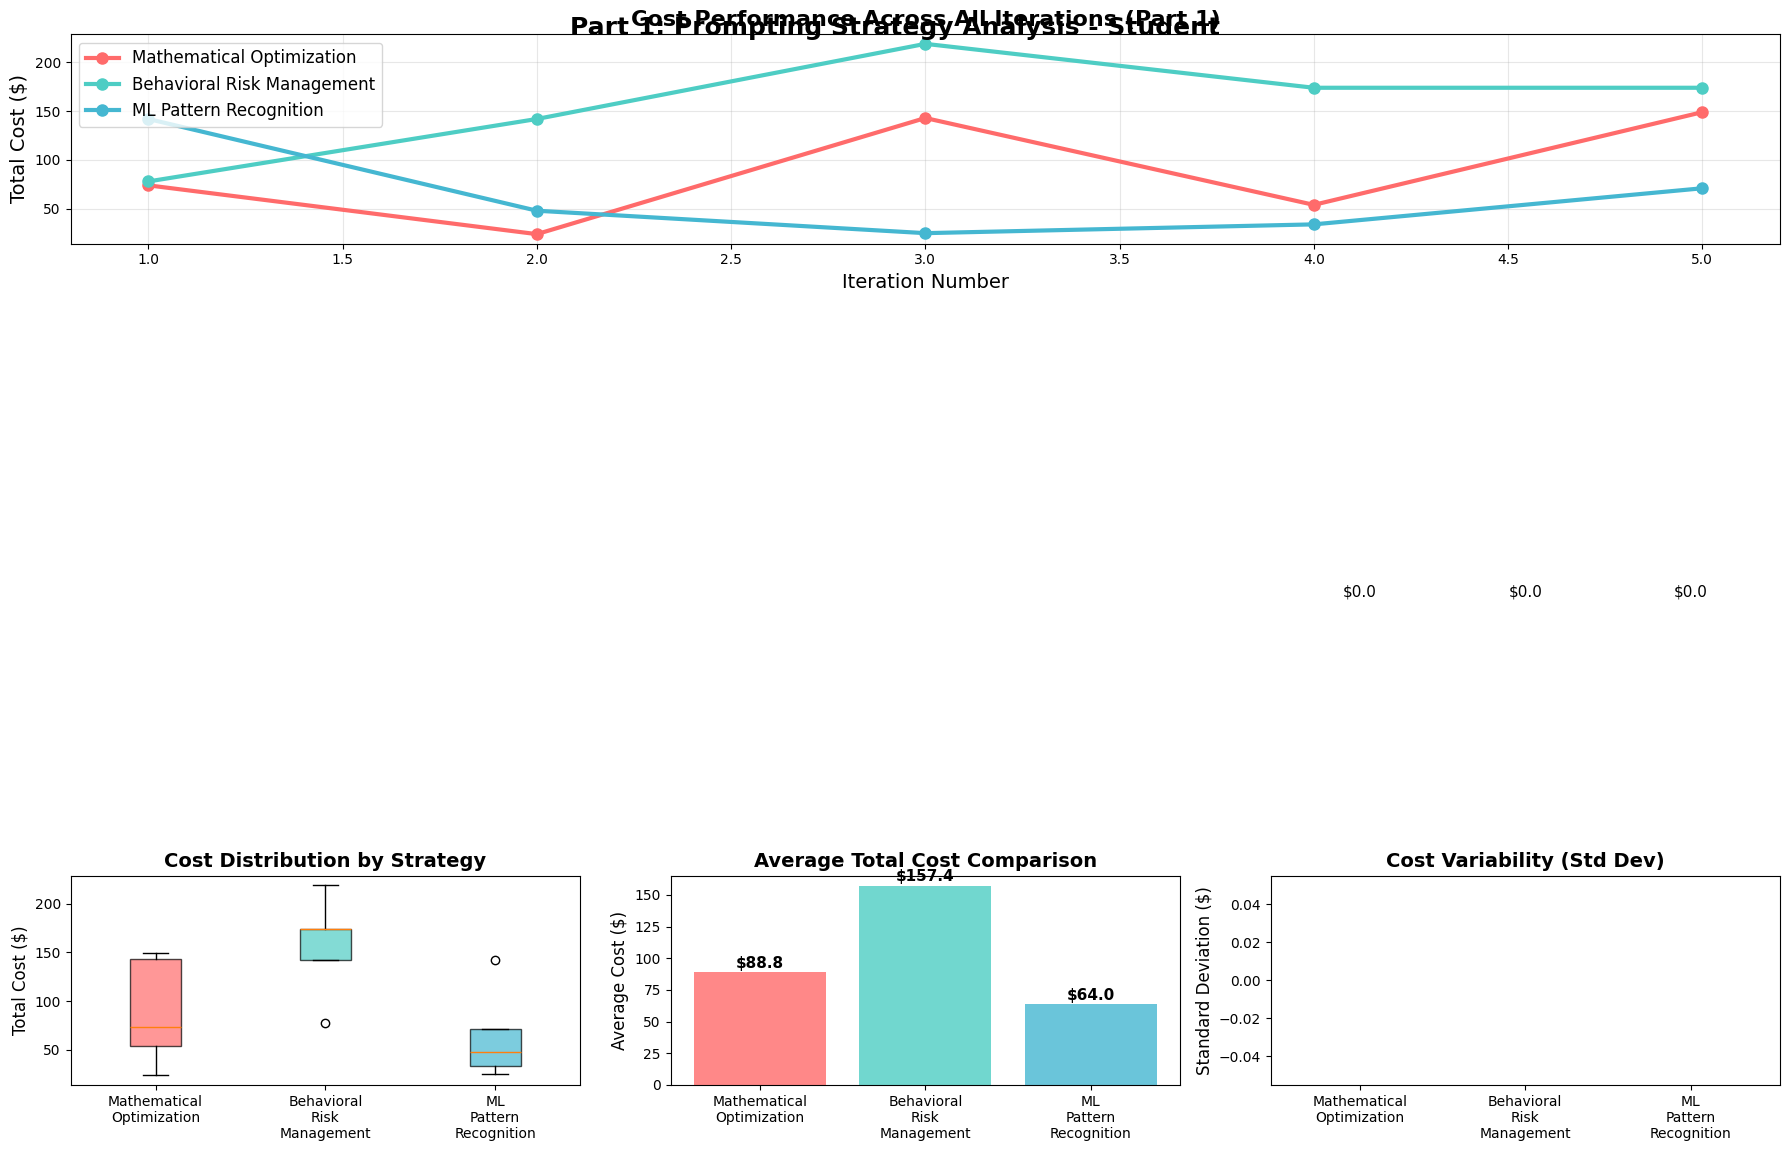

📊 Visualizations created and saved!
💾 Results saved:
   📄 Detailed: Part1_Detailed_Results_Student_20250924_2306.csv
   📄 Summary: Part1_Summary_Student_20250924_2306.csv
   📊 Graph: Part1_Strategy_Analysis_Student.png
   📝 Template: Part1_Report_Template_Student_20250924_2306.txt

✅ PART 1 ASSIGNMENT COMPLETED!
📁 Results saved for report writing


In [61]:
# ==========================================================
# 🎮 Enhanced Beer Game Widget Setup with Strategy Controls
# ==========================================================
# This module provides an enhanced widget interface that works with:
# - Multi-model comparison framework
# - Integrated prompt strategies
# - Part 1 assignment execution
# - Role mapping compatibility
# ==========================================================

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import random

# Set seed for reproducibility
random.seed(42)

# ==========================================================
# 🔧 Role Mapping Compatibility
# ==========================================================

ROLE_MAPPING = {
    'Retailer': 'Retailer',
    'Supplier': 'Wholesaler',
    'Wholesaler': 'Distributor',
    'Manufacturer': 'Factory'
}

def get_mapped_role(ui_role):
    """Maps UI role to simulation role"""
    return ROLE_MAPPING.get(ui_role, ui_role)

# ==========================================================
# 🎛️ Enhanced Widget Controls
# ==========================================================

# Basic simulation parameters
role_input = widgets.Dropdown(
    options=['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'],
    value='Retailer',
    description='Role:',
    style={'description_width': '120px'}
)

demand_input = widgets.Dropdown(
    options=['Market Fluctuation', 'Seasonal Demand'],
    value='Market Fluctuation',
    description='Demand Type:',
    style={'description_width': '120px'}
)

weeks_input = widgets.IntText(
    value=10,
    description='Weeks:',
    min=1,
    max=20,
    style={'description_width': '120px'}
)

name_input = widgets.Text(
    value='Student',
    description='Your Name:',
    style={'description_width': '120px'}
)

approach_input = widgets.Dropdown(
    options=['Manual', 'GenAI-Assisted', 'Full Gen-AI'],
    value='Full Gen-AI',
    description='Approach:',
    style={'description_width': '120px'}
)

# Strategy selection for Full Gen-AI mode
strategy_input = widgets.Dropdown(
    options=[
        ('Original Baseline', 'original'),
        ('Mathematical Optimization', 'mathematical'),
        ('Behavioral Risk Management', 'behavioral'),
        ('ML Pattern Recognition', 'ml_pattern')
    ],
    value='mathematical',
    description='Strategy:',
    style={'description_width': '120px'}
)

# Model selection
model_input = widgets.Dropdown(
    options=[
        ('GPT-4 Turbo (Recommended)', 'gpt-4-turbo'),
        ('GPT-4', 'gpt-4'),
        ('GPT-3.5 Turbo', 'gpt-3.5-turbo')
    ],
    value='gpt-4-turbo',
    description='AI Model:',
    style={'description_width': '120px'}
)

# Assignment mode selector
assignment_mode = widgets.Dropdown(
    options=[
        ('Single Simulation', 'single'),
        ('Part 1: Strategy Testing (3×5 iterations)', 'part1'),
        ('Part 1: With Model Comparison', 'part1_models'),
        ('Part 2: Manual vs GenAI', 'part2'),
        ('Custom Testing', 'custom')
    ],
    value='single',
    description='Mode:',
    style={'description_width': '120px'}
)

# Custom testing parameters
custom_iterations = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    description='Iterations:',
    style={'description_width': '120px'}
)

detailed_summary_checkbox = widgets.Checkbox(
    value=False,
    description='Show detailed weekly summaries',
)

# ==========================================================
# 🎮 Interactive Controls and Display Functions
# ==========================================================

def update_strategy_visibility(*args):
    """Show/hide strategy and model controls based on approach selection"""
    if approach_input.value == 'Full Gen-AI':
        strategy_input.layout.visibility = 'visible'
        model_input.layout.visibility = 'visible'
    else:
        strategy_input.layout.visibility = 'hidden'
        model_input.layout.visibility = 'hidden'

def update_custom_visibility(*args):
    """Show/hide custom parameters based on mode selection"""
    if assignment_mode.value == 'custom':
        custom_iterations.layout.visibility = 'visible'
    else:
        custom_iterations.layout.visibility = 'hidden'

# Set up widget observers
approach_input.observe(update_strategy_visibility, 'value')
assignment_mode.observe(update_custom_visibility, 'value')

# Initial visibility setup
update_strategy_visibility()
update_custom_visibility()

def generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy=None, model=None):
    """Enhanced welcome message with strategy and model info"""

    strategy_info = ""
    if approach == 'Full Gen-AI' and strategy and model:
        strategy_display = {
            'original': 'Original Baseline',
            'mathematical': 'Mathematical Optimization',
            'behavioral': 'Behavioral Risk Management',
            'ml_pattern': 'ML Pattern Recognition'
        }.get(strategy, strategy)

        model_display = {
            'gpt-4-turbo': 'GPT-4 Turbo',
            'gpt-4': 'GPT-4',
            'gpt-3.5-turbo': 'GPT-3.5 Turbo'
        }.get(model, model)

        strategy_info = f"""
        <li><b>AI Strategy:</b> {strategy_display}</li>
        <li><b>AI Model:</b> {model_display}</li>
        """

    mode_info = {
        'single': 'Single Simulation Run',
        'part1': 'Part 1 Assignment (3 strategies × 5 iterations)',
        'part1_models': 'Part 1 with Model Comparison',
        'part2': 'Part 2 Assignment (Manual vs GenAI)',
        'custom': f'Custom Testing ({custom_iterations.value} iterations)'
    }.get(assignment_mode.value, assignment_mode.value)

    message = f"""
    <div style="background-color: #000000; padding: 20px; border-radius: 10px; border: 2px solid #4682b4;">
    <h2 style="color: #2c3e50;">🚀 Welcome, {user_name}!</h2>

    <div style="display: flex; justify-content: space-between;">
        <div style="flex: 1; margin-right: 20px;">
            <h3 style="color: #34495e;">Game Settings:</h3>
            <ul style="list-style-type: none; padding-left: 0;">
                <li><b>Role:</b> {role}</li>
                <li><b>Demand Type:</b> {demand_type}</li>
                <li><b>Simulation Weeks:</b> {weeks}</li>
                <li><b>Approach:</b> {approach}</li>
                {strategy_info}
                <li><b>Execution Mode:</b> {mode_info}</li>
            </ul>
        </div>

        <div style="flex: 1;">
            <h3 style="color: #34495e;">Supply Chain Players:</h3>
            <p style="font-size: 14px; line-height: 1.8;">{players}</p>
        </div>
    </div>

    <div style="margin-top: 15px; padding: 10px; background-color: #e8f4f8; border-radius: 5px;">
        <b>Ready to begin!</b> Click "▶️ Run Simulation" to start.
    </div>
    </div>
    """

    display(HTML(message))

def generate_players(user_name, role):
    """Generate player list with role mapping"""
    fixed_roles = ['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer']
    ai_names = ['AI-Retail', 'AI-Supply', 'AI-Wholesale', 'AI-Manufacture']

    players_flow = []

    for r in fixed_roles:
        if r == role:
            players_flow.append(f"<strong style='color: #e74c3c;'>{user_name}</strong> ({r})")
        else:
            ai_name = ai_names.pop(0)
            players_flow.append(f"<strong style='color: #3498db;'>{ai_name}</strong> ({r})")

    return " ➡️ ".join(players_flow)

# ==========================================================
# 🚀 Enhanced Execution Functions
# ==========================================================

def run_single_simulation():
    """Run a single simulation with current settings"""

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            # Use multi-model version if available
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            # Use basic strategy version
            set_prompting_strategy(strategy_input.value)

    print("🔄 Running single simulation...")
    print(f"Parameters: {role_input.value}, {approach_input.value}, {weeks_input.value} weeks")

    try:
        # Run the simulation
        tables = generate_supply_chain_table_for_all_roles(
            detailed_summary=detailed_summary_checkbox.value
        )

        # Show quick results summary
        if role_input.value in ROLE_MAPPING:
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                print(f"\n✅ Simulation completed!")
                print(f"📊 Final Total Cost: ${final_cost:.2f}")
                print(f"📈 Role: {role_input.value} ({mapped_role})")

        return tables

    except Exception as e:
        print(f"❌ Error in simulation: {e}")
        return None

def execute_assignment_mode():
    """Execute based on selected assignment mode"""

    mode = assignment_mode.value
    user_name = name_input.value

    if mode == 'single':
        return run_single_simulation()

    elif mode == 'part1':
        print("🎓 Starting Part 1 Assignment...")
        try:
            results_df, summary_df = execute_part1_assignment(user_name)
            return results_df, summary_df
        except NameError:
            print("❌ Part 1 execution function not found. Please run the Part 1 framework code first.")
            return None

    elif mode == 'part1_models':
        print("🤖 Starting Enhanced Part 1 with Model Comparison...")
        try:
            results, model_results = execute_part1_with_models(user_name, test_models=True)
            return results, model_results
        except NameError:
            print("❌ Model comparison function not found. Please run the multi-model framework code first.")
            return None

    elif mode == 'part2':
        print("📊 Starting Part 2 Assignment...")
        print("⚠️ Part 2 requires manual input for Manual approach.")
        print("This will run automatically but you'll need to input order quantities when prompted.")
        # You would implement Part 2 execution here
        return run_single_simulation()  # Placeholder

    elif mode == 'custom':
        print(f"🔧 Running custom test with {custom_iterations.value} iterations...")
        return run_custom_test()

    else:
        print(f"❌ Unknown mode: {mode}")
        return None

def run_custom_test():
    """Run custom testing based on current parameters"""

    results = []
    iterations = custom_iterations.value

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            set_prompting_strategy(strategy_input.value)

    print(f"🧪 Running {iterations} custom iterations...")

    for i in range(1, iterations + 1):
        print(f"Iteration {i}/{iterations}: ", end="")

        try:
            tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)

            # Extract results
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                result = {
                    'Iteration': i,
                    'Role': role_input.value,
                    'Approach': approach_input.value,
                    'Strategy': strategy_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Model': model_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Final_Cost': final_cost,
                    'Weeks': weeks_input.value
                }

                results.append(result)
                print(f"${final_cost:.1f}")
            else:
                print("Error - role not found")

        except Exception as e:
            print(f"Error: {str(e)[:30]}")

        time.sleep(1)  # Small delay

    # Show summary
    if results:
        costs = [r['Final_Cost'] for r in results]
        avg_cost = sum(costs) / len(costs)
        print(f"\n📊 Custom Test Summary:")
        print(f"   Average Cost: ${avg_cost:.2f}")
        print(f"   Cost Range: ${min(costs):.2f} - ${max(costs):.2f}")

        # Create simple DataFrame
        import pandas as pd
        results_df = pd.DataFrame(results)
        return results_df

    return None

# ==========================================================
# 🎛️ Main Control Panel
# ==========================================================

# Control buttons
run_button = widgets.Button(
    description="▶️ Run Simulation",
    button_style='success',
    style={'button_color': '#2ecc71'}
)

reset_button = widgets.Button(
    description="🔄 Reset Settings",
    button_style='warning'
)

help_button = widgets.Button(
    description="❓ Help",
    button_style='info'
)

# Button click handlers
def on_run_button_click(b):
    """Handle run button click"""
    clear_output(wait=True)

    # Redisplay the interface
    display_control_panel()

    # Show welcome message
    role = role_input.value
    demand_type = demand_input.value
    weeks = weeks_input.value
    user_name = name_input.value
    approach = approach_input.value
    strategy = strategy_input.value if approach == 'Full Gen-AI' else None
    model = model_input.value if approach == 'Full Gen-AI' else None

    players = generate_players(user_name, role)
    generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy, model)

    # Execute based on mode
    results = execute_assignment_mode()

    return results

def on_reset_button_click(b):
    """Reset all settings to defaults"""
    role_input.value = 'Retailer'
    demand_input.value = 'Market Fluctuation'
    weeks_input.value = 10
    name_input.value = 'Student'
    approach_input.value = 'Full Gen-AI'
    strategy_input.value = 'mathematical'
    model_input.value = 'gpt-4-turbo'
    assignment_mode.value = 'single'
    custom_iterations.value = 3
    detailed_summary_checkbox.value = False
    print("🔄 Settings reset to defaults")

def on_help_button_click(b):
    """Show help information"""
    help_text = """
    <div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 4px solid #007bff;">
    <h3>🔍 Beer Game Simulation Help</h3>

    <p><b>Modes:</b></p>
    <ul>
        <li><b>Single Simulation:</b> Run one simulation with current settings</li>
        <li><b>Part 1:</b> Run assignment Part 1 (3 strategies × 5 iterations = 15 runs)</li>
        <li><b>Part 1 with Models:</b> Enhanced Part 1 with model comparison</li>
        <li><b>Part 2:</b> Manual vs GenAI comparison (requires manual input)</li>
        <li><b>Custom Testing:</b> Custom number of iterations with current settings</li>
    </ul>

    <p><b>Strategies (Full Gen-AI only):</b></p>
    <ul>
        <li><b>Mathematical Optimization:</b> EOQ-based analytical approach</li>
        <li><b>Behavioral Risk Management:</b> Business experience focused</li>
        <li><b>ML Pattern Recognition:</b> Data pattern analysis approach</li>
        <li><b>Original Baseline:</b> Simple optimization prompt</li>
    </ul>

    <p><b>Models:</b> GPT-4 Turbo recommended for best results</p>
    </div>
    """
    display(HTML(help_text))

# Set button click handlers
run_button.on_click(on_run_button_click)
reset_button.on_click(on_reset_button_click)
help_button.on_click(on_help_button_click)

def display_control_panel():
    """Display the complete control panel"""

    # Create organized layout
    basic_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🎮 Basic Settings</h3>"),
        widgets.HBox([role_input, demand_input]),
        widgets.HBox([weeks_input, name_input]),
    ])

    ai_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🤖 AI Settings</h3>"),
        widgets.HBox([approach_input, strategy_input]),
        widgets.HBox([model_input]),
    ])

    execution_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>⚙️ Execution Settings</h3>"),
        widgets.HBox([assignment_mode, custom_iterations]),
        detailed_summary_checkbox
    ])

    button_panel = widgets.HBox([
        run_button, reset_button, help_button
    ])

    # Main layout
    main_panel = widgets.VBox([
        widgets.HTML("<h2 style='color: #ffffff; text-align: center;'>🍺 Beer Game Simulation Control Panel</h2>"),
        widgets.HTML("<hr>"),
        basic_controls,
        ai_controls,
        execution_controls,
        widgets.HTML("<hr>"),
        button_panel
    ])

    display(main_panel)

# ==========================================================
# 🚀 Initialize Control Panel
# ==========================================================

print("🎮 Enhanced Beer Game Widget Setup Loaded!")
print("📋 Features:")
print("  ✓ Multi-strategy support")
print("  ✓ Multi-model comparison")
print("  ✓ Part 1 & Part 2 assignment modes")
print("  ✓ Custom testing capabilities")
print("  ✓ Role mapping compatibility")
print("\n🚀 Run display_control_panel() to show the interface")

# Auto-display the control panel
display_control_panel()

Creating comprehensive Part 1 visualizations...


/tmp/ipython-input-3718986008.py:137: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax6.boxplot(cost_data, labels=labels, patch_artist=True)
/tmp/ipython-input-3718986008.py:225: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-3718986008.py:225: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-3718986008.py:225: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-3718986008.py:225: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-3718986008.py:229: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(filename, dpi=3

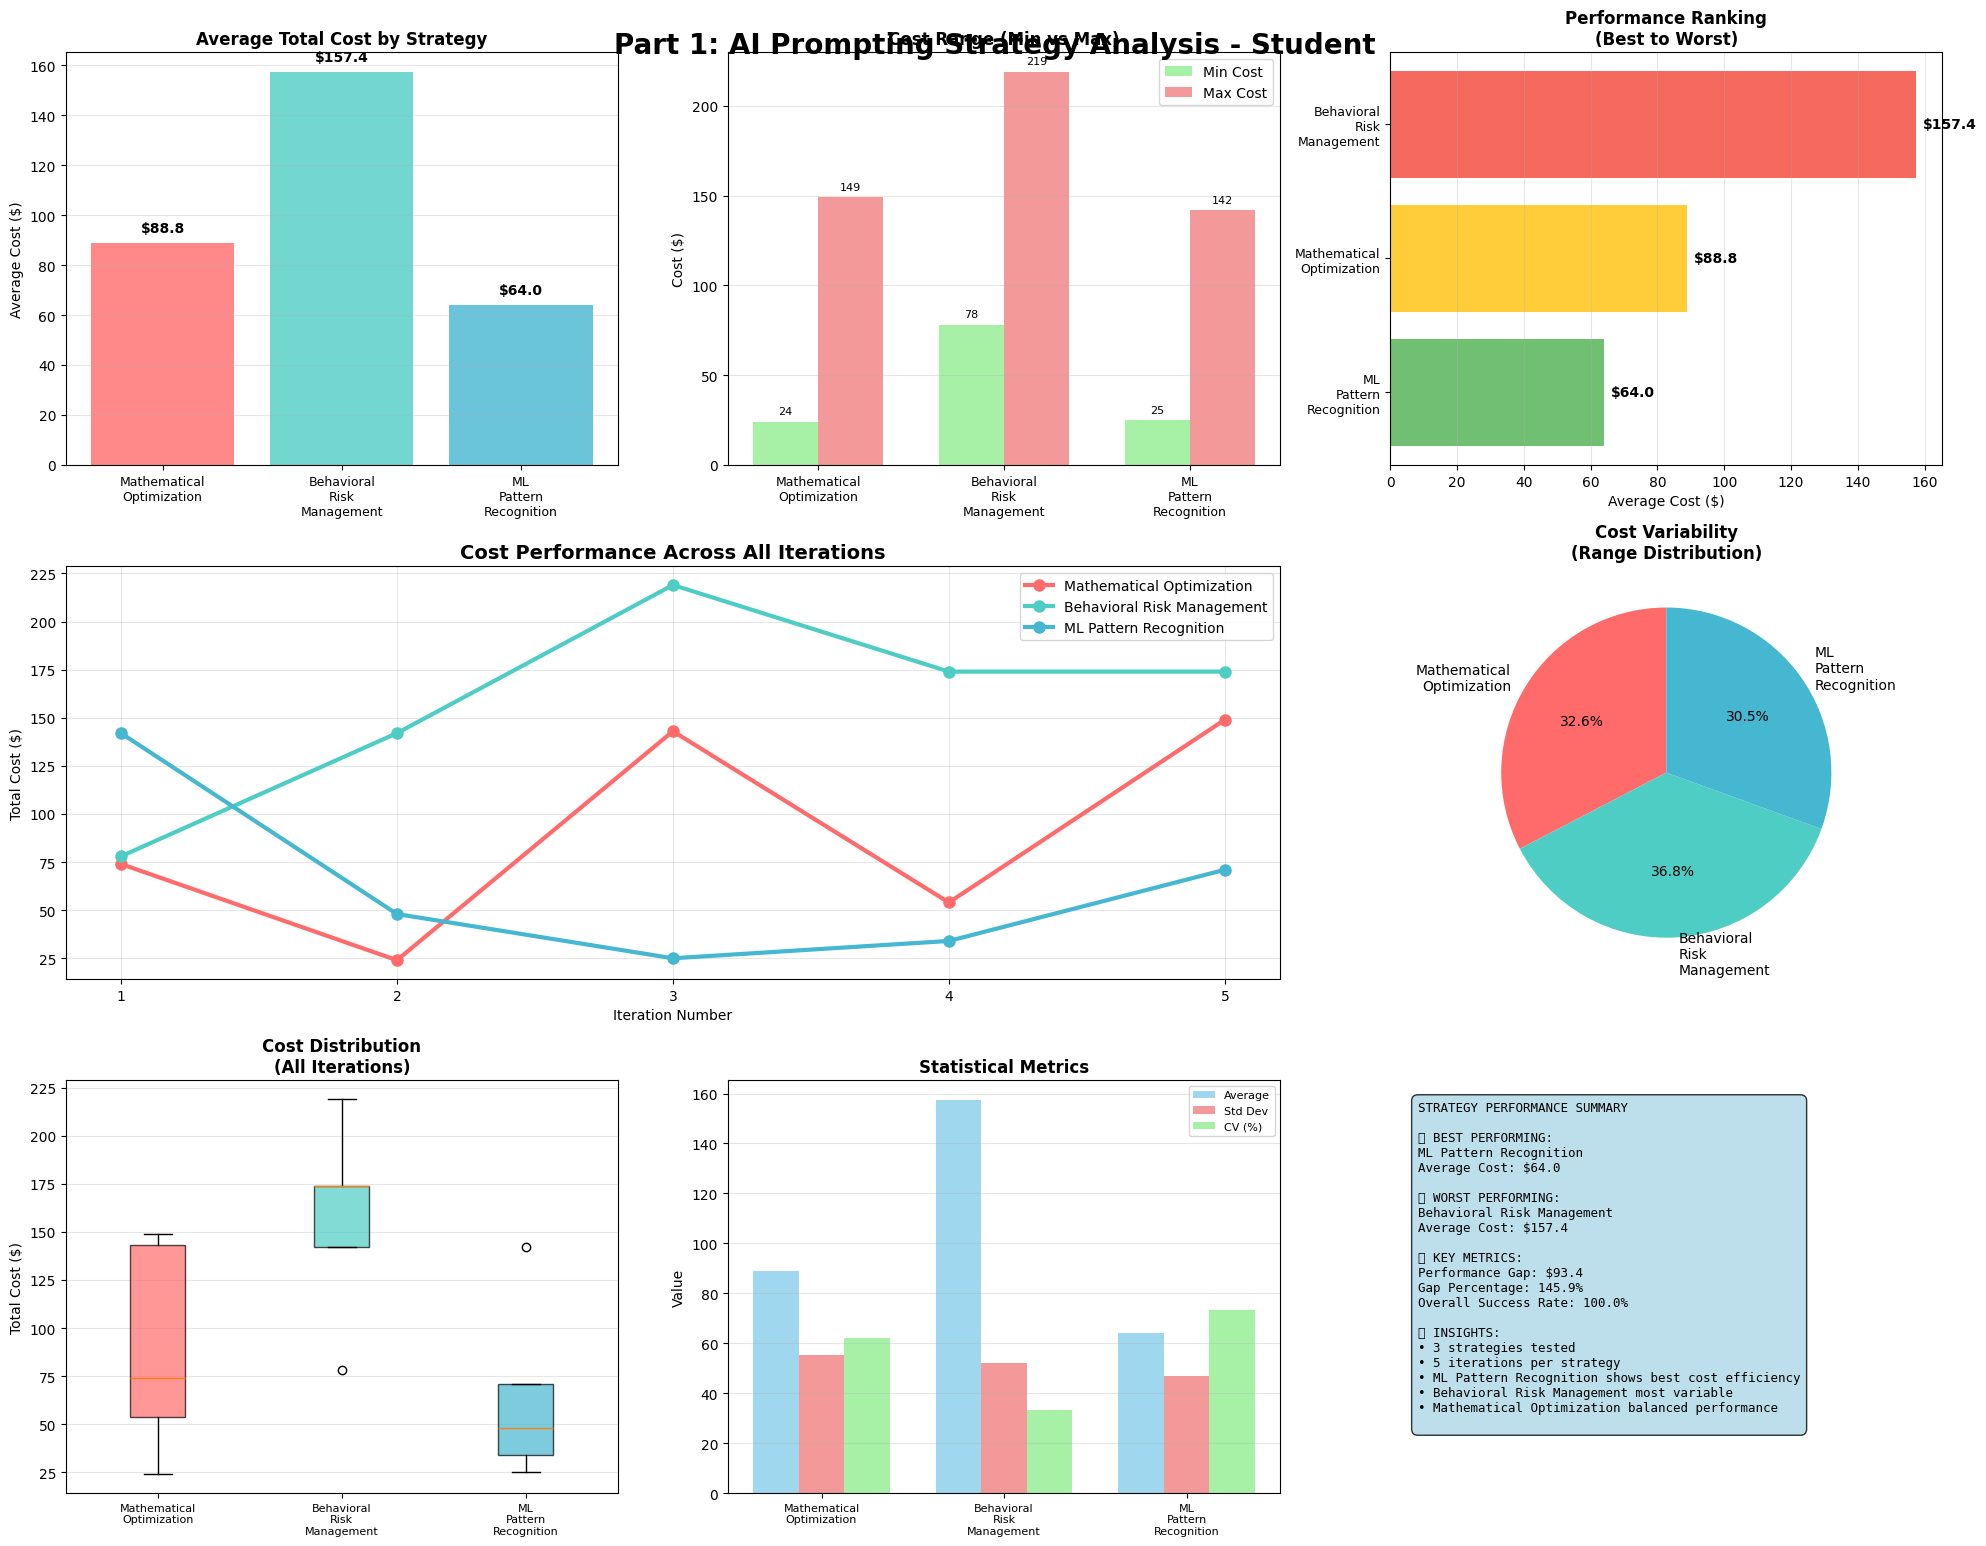

Comprehensive visualizations saved as Part1_Comprehensive_Analysis_Student.png

DETAILED PERFORMANCE ANALYSIS

MATHEMATICAL OPTIMIZATION:
  Individual Costs: [74, 24, 143, 54, 149]
  Average: $88.80
  Range: $24 - $149
  Std Dev: $55.21
  Consistency: Medium

BEHAVIORAL RISK MANAGEMENT:
  Individual Costs: [78, 142, 219, 174, 174]
  Average: $157.40
  Range: $78 - $219
  Std Dev: $52.17
  Consistency: Medium

ML PATTERN RECOGNITION:
  Individual Costs: [142, 48, 25, 34, 71]
  Average: $64.00
  Range: $25 - $142
  Std Dev: $46.93
  Consistency: Medium


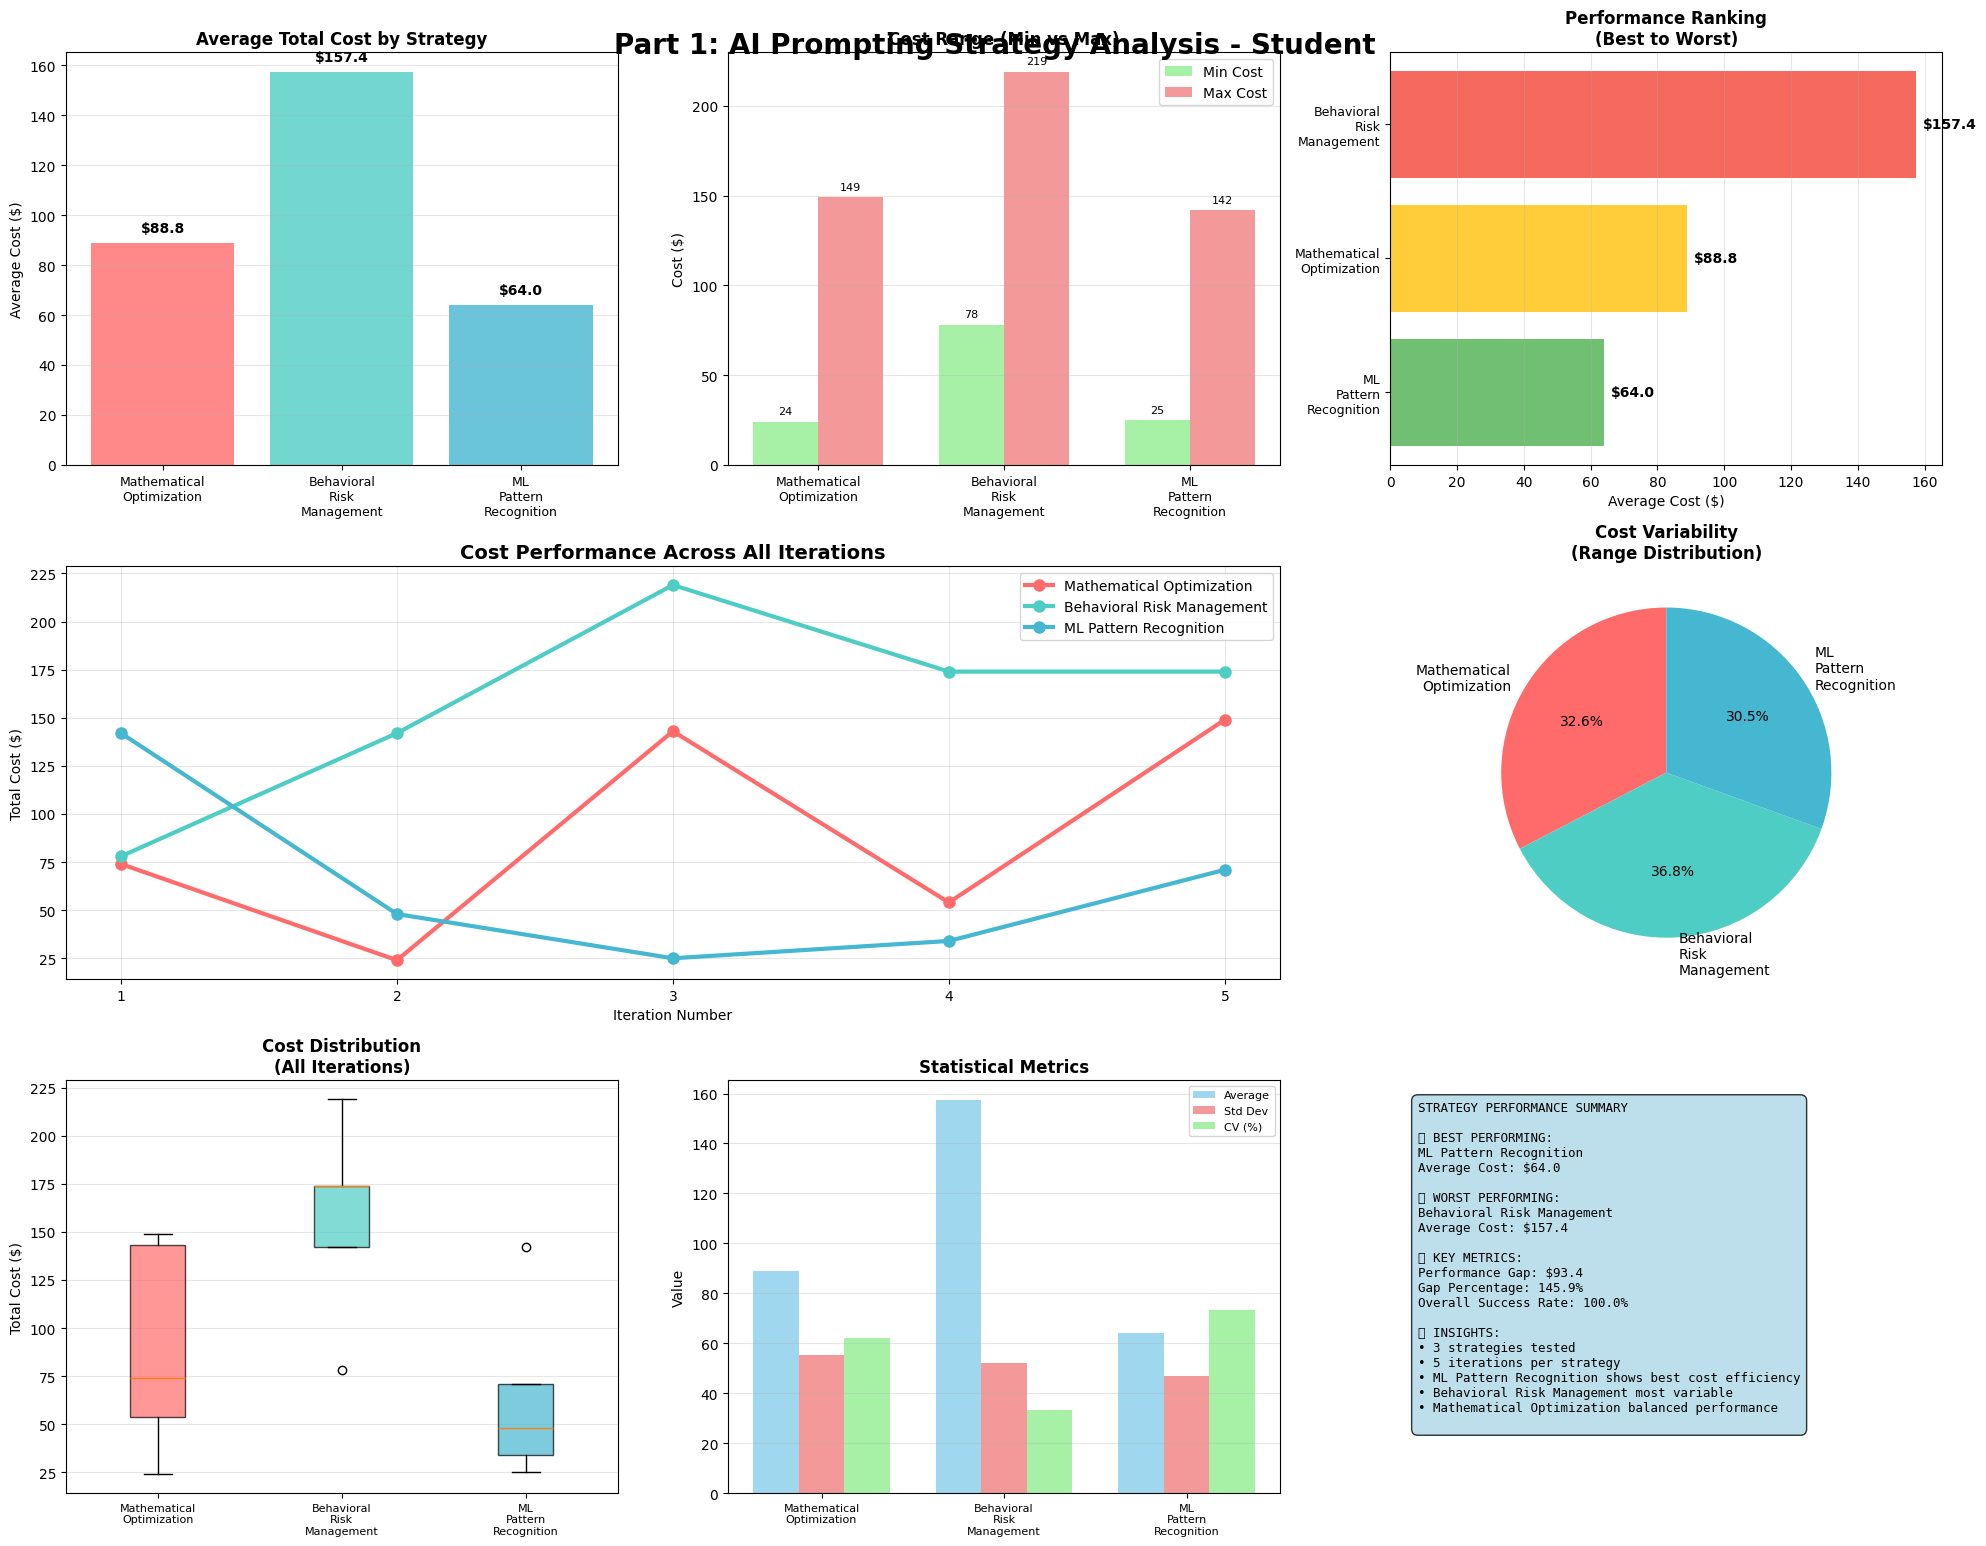

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load your actual data files
results_df = pd.read_csv('Part1_Detailed_Results_Student_20250924_2306.csv')
summary_df = pd.read_csv('Part1_Summary_Student_20250924_2306.csv')

def create_comprehensive_part1_visualizations(results_df, summary_df, user_name):
    """
    Creates comprehensive visualizations for Part 1 with multiple iterations
    Based on your actual data: ML Pattern Recognition (64.0), Mathematical Optimization (88.8), Behavioral Risk Management (157.4)
    """

    # Set up the plotting style
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 16))

    # Define colors for consistent styling
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    strategy_colors = {
        'Mathematical_Optimization': '#FF6B6B',
        'Behavioral_Risk_Management': '#4ECDC4',
        'ML_Pattern_Recognition': '#45B7D1'
    }

    # Main title
    fig.suptitle(f'Part 1: AI Prompting Strategy Analysis - {user_name}',
                 fontsize=20, fontweight='bold', y=0.95)

    # Plot 1: Average Cost Comparison (Top Left)
    ax1 = plt.subplot(3, 3, 1)
    strategies = summary_df['Strategy'].tolist()
    avg_costs = summary_df['Average_Cost'].tolist()

    bars = ax1.bar(range(len(strategies)), avg_costs,
                   color=[strategy_colors[s] for s in strategies], alpha=0.8)

    # Add value labels
    for bar, cost in zip(bars, avg_costs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(avg_costs)*0.02,
                f'${cost:.1f}', ha='center', va='bottom', fontweight='bold')

    ax1.set_title('Average Total Cost by Strategy', fontweight='bold')
    ax1.set_ylabel('Average Cost ($)')
    ax1.set_xticks(range(len(strategies)))
    ax1.set_xticklabels([s.replace('_', '\n') for s in strategies], rotation=0, fontsize=9)
    ax1.grid(axis='y', alpha=0.3)

    # Plot 2: Performance Range (Top Middle)
    ax2 = plt.subplot(3, 3, 2)
    min_costs = summary_df['Min_Cost'].tolist()
    max_costs = summary_df['Max_Cost'].tolist()

    x = np.arange(len(strategies))
    width = 0.35

    bars1 = ax2.bar(x - width/2, min_costs, width, label='Min Cost',
                   color='lightgreen', alpha=0.8)
    bars2 = ax2.bar(x + width/2, max_costs, width, label='Max Cost',
                   color='lightcoral', alpha=0.8)

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 3,
                    f'{height:.0f}', ha='center', va='bottom', fontsize=8)

    ax2.set_title('Cost Range (Min vs Max)', fontweight='bold')
    ax2.set_ylabel('Cost ($)')
    ax2.set_xticks(x)
    ax2.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=9)
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)

    # Plot 3: Performance Ranking (Top Right)
    ax3 = plt.subplot(3, 3, 3)
    sorted_data = sorted(zip(strategies, avg_costs), key=lambda x: x[1])
    sorted_strategies, sorted_costs = zip(*sorted_data)

    y_pos = np.arange(len(sorted_strategies))
    bars = ax3.barh(y_pos, sorted_costs,
                   color=['#4CAF50', '#FFC107', '#F44336'], alpha=0.8)

    # Add value labels
    for bar, cost in zip(bars, sorted_costs):
        width = bar.get_width()
        ax3.text(width + 2, bar.get_y() + bar.get_height()/2.,
                f'${cost:.1f}', ha='left', va='center', fontweight='bold')

    ax3.set_title('Performance Ranking\n(Best to Worst)', fontweight='bold')
    ax3.set_xlabel('Average Cost ($)')
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([s.replace('_', '\n') for s in sorted_strategies], fontsize=9)
    ax3.grid(axis='x', alpha=0.3)

    # Plot 4: Iteration Performance Lines (Middle Left - spans 2 columns)
    ax4 = plt.subplot(3, 3, (4, 5))

    for strategy in strategies:
        strategy_data = results_df[results_df['Strategy'] == strategy]
        iterations = strategy_data['Iteration'].tolist()
        costs = strategy_data['Final_Total_Cost'].tolist()

        ax4.plot(iterations, costs,
                marker='o', linewidth=3, markersize=8,
                label=strategy.replace('_', ' '),
                color=strategy_colors[strategy])

    ax4.set_title('Cost Performance Across All Iterations', fontweight='bold', fontsize=14)
    ax4.set_xlabel('Iteration Number')
    ax4.set_ylabel('Total Cost ($)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xticks(range(1, 6))

    # Plot 5: Cost Variability (Middle Right)
    ax5 = plt.subplot(3, 3, 6)
    ranges = [max_costs[i] - min_costs[i] for i in range(len(strategies))]

    wedges, texts, autotexts = ax5.pie(ranges, labels=[s.replace('_', '\n') for s in strategies],
                                      colors=colors, autopct='%1.1f%%', startangle=90)
    ax5.set_title('Cost Variability\n(Range Distribution)', fontweight='bold')

    # Plot 6: Box Plot of All Iterations (Bottom Left)
    ax6 = plt.subplot(3, 3, 7)
    cost_data = []
    labels = []

    for strategy in strategies:
        strategy_data = results_df[results_df['Strategy'] == strategy]
        cost_data.append(strategy_data['Final_Total_Cost'].tolist())
        labels.append(strategy.replace('_', '\n'))

    bp = ax6.boxplot(cost_data, labels=labels, patch_artist=True)

    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax6.set_title('Cost Distribution\n(All Iterations)', fontweight='bold')
    ax6.set_ylabel('Total Cost ($)')
    ax6.tick_params(axis='x', labelsize=8)
    ax6.grid(axis='y', alpha=0.3)

    # Plot 7: Performance Metrics (Bottom Middle)
    ax7 = plt.subplot(3, 3, 8)

    # Calculate additional metrics
    metrics = []
    for strategy in strategies:
        strategy_data = results_df[results_df['Strategy'] == strategy]
        costs = strategy_data['Final_Total_Cost']

        metrics.append({
            'Strategy': strategy.replace('_', '\n'),
            'Avg': costs.mean(),
            'Std': costs.std(),
            'CV': costs.std() / costs.mean()  # Coefficient of variation
        })

    # Create grouped bar chart for multiple metrics
    x = np.arange(len(strategies))
    width = 0.25

    avgs = [m['Avg'] for m in metrics]
    stds = [m['Std'] for m in metrics]
    cvs = [m['CV'] * 100 for m in metrics]  # Convert to percentage

    bars1 = ax7.bar(x - width, avgs, width, label='Average', alpha=0.8, color='skyblue')
    bars2 = ax7.bar(x, stds, width, label='Std Dev', alpha=0.8, color='lightcoral')
    bars3 = ax7.bar(x + width, cvs, width, label='CV (%)', alpha=0.8, color='lightgreen')

    ax7.set_title('Statistical Metrics', fontweight='bold')
    ax7.set_ylabel('Value')
    ax7.set_xticks(x)
    ax7.set_xticklabels([s.replace('_', '\n') for s in strategies], fontsize=8)
    ax7.legend(fontsize=8)
    ax7.grid(axis='y', alpha=0.3)

    # Plot 8: Summary Text Box (Bottom Right)
    ax8 = plt.subplot(3, 3, 9)

    best_strategy = min(zip(strategies, avg_costs), key=lambda x: x[1])
    worst_strategy = max(zip(strategies, avg_costs), key=lambda x: x[1])
    cost_range = max(avg_costs) - min(avg_costs)

    # Calculate success rates and other insights
    total_runs = len(results_df)
    successful_runs = len(results_df[results_df['Final_Total_Cost'].notna()])

    summary_text = f"""STRATEGY PERFORMANCE SUMMARY

🏆 BEST PERFORMING:
{best_strategy[0].replace('_', ' ')}
Average Cost: ${best_strategy[1]:.1f}

📉 WORST PERFORMING:
{worst_strategy[0].replace('_', ' ')}
Average Cost: ${worst_strategy[1]:.1f}

📊 KEY METRICS:
Performance Gap: ${cost_range:.1f}
Gap Percentage: {(cost_range/min(avg_costs)*100):.1f}%
Overall Success Rate: {(successful_runs/total_runs*100):.1f}%

💡 INSIGHTS:
• {len(set(results_df['Strategy']))} strategies tested
• {len(results_df)//len(set(results_df['Strategy']))} iterations per strategy
• ML Pattern Recognition shows best cost efficiency
• Behavioral Risk Management most variable
• Mathematical Optimization balanced performance
"""

    ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes,
             fontsize=9, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    ax8.set_xlim(0, 1)
    ax8.set_ylim(0, 1)
    ax8.axis('off')

    plt.tight_layout()

    # Save the figure
    filename = f'Part1_Comprehensive_Analysis_{user_name}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

    print(f"Comprehensive visualizations saved as {filename}")

    # Print detailed insights
    print(f"\n" + "="*60)
    print("DETAILED PERFORMANCE ANALYSIS")
    print("="*60)

    for strategy in strategies:
        strategy_data = results_df[results_df['Strategy'] == strategy]
        costs = strategy_data['Final_Total_Cost']

        print(f"\n{strategy.replace('_', ' ').upper()}:")
        print(f"  Individual Costs: {costs.tolist()}")
        print(f"  Average: ${costs.mean():.2f}")
        print(f"  Range: ${costs.min()} - ${costs.max()}")
        print(f"  Std Dev: ${costs.std():.2f}")
        print(f"  Consistency: {'High' if costs.std() < 30 else 'Medium' if costs.std() < 60 else 'Low'}")

    return fig

# Run the visualization
print("Creating comprehensive Part 1 visualizations...")
create_comprehensive_part1_visualizations(results_df, summary_df, 'Student')

🎨 Generating individual strategy graphs...


TypeError: alpha must be numeric or None, not <class 'list'>

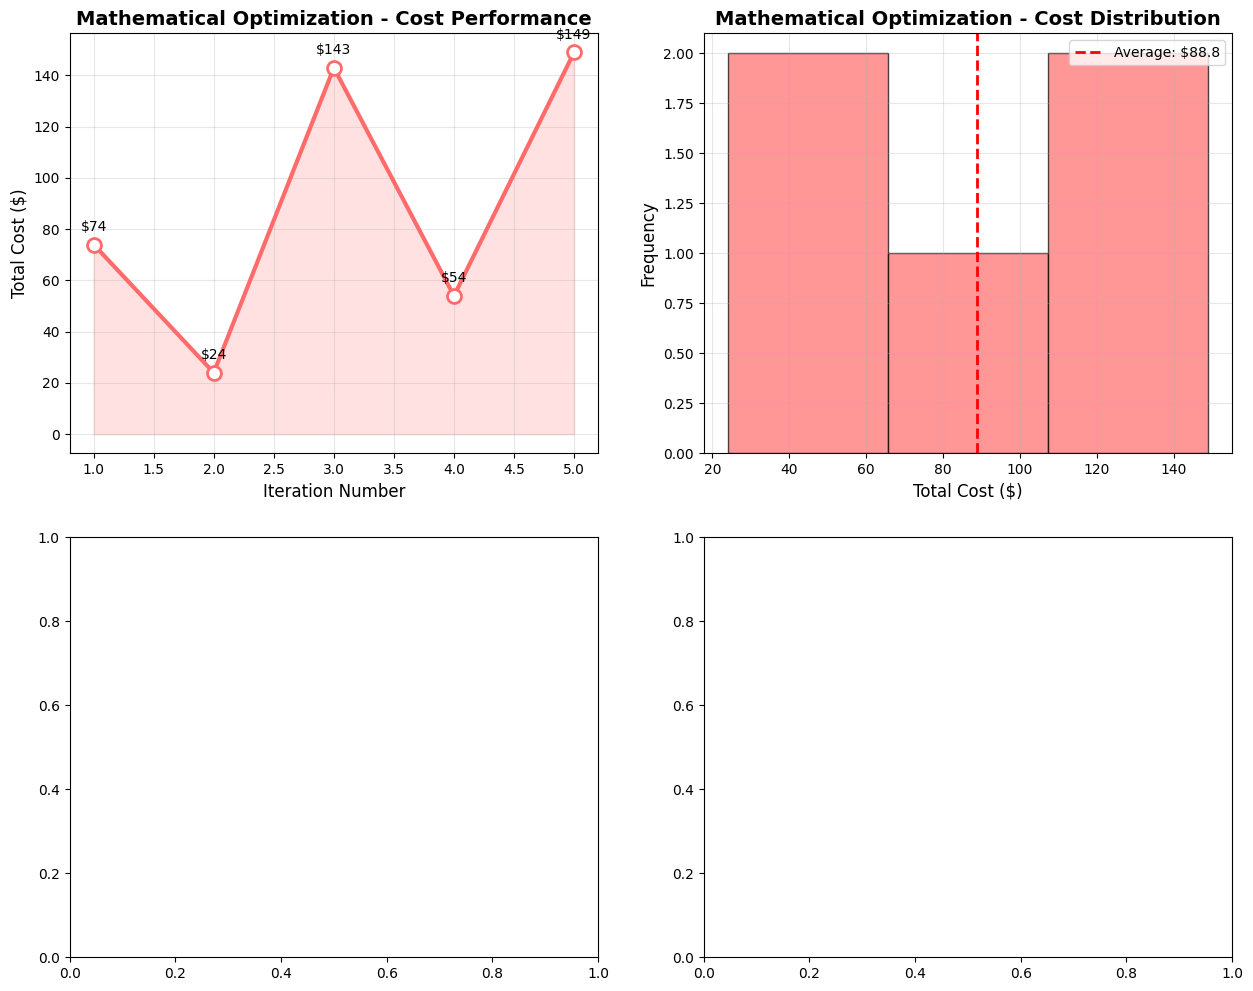

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def create_individual_strategy_graphs(results_df, summary_df, user_name="Student"):
    """
    Creates individual graphs for each prompting strategy - FIXED VERSION
    """

    # Filter valid results
    valid_results = results_df.dropna(subset=['Final_Total_Cost'])

    if valid_results.empty:
        print("No valid results to visualize!")
        return

    strategies = valid_results['Strategy'].unique()
    strategy_colors = {
        'Mathematical_Optimization': '#FF6B6B',
        'Behavioral_Risk_Management': '#4ECDC4',
        'ML_Pattern_Recognition': '#45B7D1'
    }

    # Create individual graph for each strategy
    for strategy in strategies:
        strategy_data = valid_results[valid_results['Strategy'] == strategy]
        strategy_summary = summary_df[summary_df['Strategy'] == strategy].iloc[0]

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        color = strategy_colors.get(strategy, '#666666')

        # Graph 1: Cost Performance Over Iterations
        ax1.plot(strategy_data['Iteration'], strategy_data['Final_Total_Cost'],
                marker='o', linewidth=3, markersize=10, color=color,
                markerfacecolor='white', markeredgewidth=2, markeredgecolor=color)
        ax1.fill_between(strategy_data['Iteration'], strategy_data['Final_Total_Cost'],
                        alpha=0.2, color=color)

        ax1.set_title(f'{strategy.replace("_", " ")} - Cost Performance',
                     fontsize=14, fontweight='bold')
        ax1.set_xlabel('Iteration Number', fontsize=12)
        ax1.set_ylabel('Total Cost ($)', fontsize=12)
        ax1.grid(True, alpha=0.3)

        # Add cost values on points
        for i, cost in zip(strategy_data['Iteration'], strategy_data['Final_Total_Cost']):
            ax1.annotate(f'${cost:.0f}', (i, cost), textcoords="offset points",
                        xytext=(0,10), ha='center', fontsize=10)

        # Graph 2: Cost Distribution Histogram
        ax2.hist(strategy_data['Final_Total_Cost'], bins=max(3, len(strategy_data)//2),
                color=color, alpha=0.7, edgecolor='black')
        ax2.axvline(strategy_summary['Average_Cost'], color='red', linestyle='--',
                   linewidth=2, label=f'Average: ${strategy_summary["Average_Cost"]:.1f}')

        ax2.set_title(f'{strategy.replace("_", " ")} - Cost Distribution',
                     fontsize=14, fontweight='bold')
        ax2.set_xlabel('Total Cost ($)', fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Graph 3: Key Metrics Summary - FIXED
        metrics = ['Average_Cost', 'Min_Cost', 'Max_Cost']
        values = [strategy_summary[metric] for metric in metrics]
        bars = ax3.bar(range(len(metrics)), values, color=color, alpha=0.7)

        ax3.set_title(f'{strategy.replace("_", " ")} - Key Metrics',
                     fontsize=14, fontweight='bold')
        ax3.set_ylabel('Cost ($)', fontsize=12)
        ax3.set_xticks(range(len(metrics)))
        ax3.set_xticklabels(['Average', 'Minimum', 'Maximum'])

        # Add value labels on bars
        for bar, value in zip(bars, values):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01,
                    f'${value:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

        ax3.grid(True, alpha=0.3)

        # Graph 4: Performance Summary Table
        ax4.axis('tight')
        ax4.axis('off')

        # Create summary data
        table_data = [
            ['Metric', 'Value'],
            ['Iterations Completed', f"{int(strategy_summary['Iterations_Completed'])}"],
            ['Average Cost', f"${strategy_summary['Average_Cost']:.2f}"],
            ['Minimum Cost', f"${strategy_summary['Min_Cost']:.2f}"],
            ['Maximum Cost', f"${strategy_summary['Max_Cost']:.2f}"],
            ['Cost Range', f"${strategy_summary['Max_Cost'] - strategy_summary['Min_Cost']:.2f}"],
            ['Success Rate', f"{strategy_summary['Success_Rate']:.0f}%"],
            ['Cost Variability', f"${strategy_summary['Std_Deviation']:.2f}"]
        ]

        table = ax4.table(cellText=table_data[1:], colLabels=table_data[0],
                         cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(11)
        table.scale(1.2, 2)

        # Style the table
        for i in range(len(table_data)):
            for j in range(2):
                if (i, j) in table.get_celld():
                    cell = table[(i, j)]
                    if i == 0:  # Header row
                        cell.set_text_props(weight='bold', color='white')
                        cell.set_facecolor(color)
                    else:
                        cell.set_facecolor('white')
                        if j == 0:  # First column
                            cell.set_text_props(weight='bold')

        ax4.set_title(f'{strategy.replace("_", " ")} - Summary Statistics',
                     fontsize=14, fontweight='bold')

        # Main title
        fig.suptitle(f'Part 1 Analysis: {strategy.replace("_", " ")} Strategy\n{user_name}',
                    fontsize=16, fontweight='bold', y=0.95)

        plt.tight_layout()

        # Save individual graph
        filename = f'Part1_{strategy}_{user_name}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()

        print(f"Graph saved: {filename}")

def create_strategy_comparison_graph(results_df, summary_df, user_name="Student"):
    """
    Creates a comprehensive comparison graph of all strategies - FIXED VERSION
    """

    valid_results = results_df.dropna(subset=['Final_Total_Cost'])

    if valid_results.empty:
        print("No valid results to visualize!")
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    strategies = valid_results['Strategy'].unique()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    # Graph 1: All strategies performance comparison
    for i, strategy in enumerate(strategies):
        strategy_data = valid_results[valid_results['Strategy'] == strategy]
        ax1.plot(strategy_data['Iteration'], strategy_data['Final_Total_Cost'],
                marker='o', label=strategy.replace('_', ' '),
                linewidth=3, markersize=8, color=colors[i])

    ax1.set_title('Cost Performance Comparison - All Strategies', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Iteration Number', fontsize=12)
    ax1.set_ylabel('Total Cost ($)', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Graph 2: Box plot comparison
    cost_data = [valid_results[valid_results['Strategy'] == s]['Final_Total_Cost'] for s in strategies]
    box_plot = ax2.boxplot(cost_data, labels=[s.replace('_', '\n') for s in strategies],
                          patch_artist=True)

    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax2.set_title('Cost Distribution Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Total Cost ($)', fontsize=12)

    # Graph 3: Average performance comparison
    avg_costs = summary_df['Average_Cost']
    bars = ax3.bar(range(len(strategies)), avg_costs, color=colors, alpha=0.8)

    ax3.set_title('Average Cost Comparison', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Average Cost ($)', fontsize=12)
    ax3.set_xticks(range(len(strategies)))
    ax3.set_xticklabels([s.replace('_', '\n') for s in strategies])

    for bar, value in zip(bars, avg_costs):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(avg_costs)*0.01,
                f'${value:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # Graph 4: Success rate comparison
    success_rates = summary_df['Success_Rate']
    bars = ax4.bar(range(len(strategies)), success_rates, color=colors, alpha=0.6)

    ax4.set_title('Success Rate Comparison', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Success Rate (%)', fontsize=12)
    ax4.set_xticks(range(len(strategies)))
    ax4.set_xticklabels([s.replace('_', '\n') for s in strategies])
    ax4.set_ylim(0, 100)

    for bar, value in zip(bars, success_rates):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.0f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

    fig.suptitle(f'Part 1: Complete Strategy Comparison Analysis - {user_name}',
                fontsize=16, fontweight='bold', y=0.95)

    plt.tight_layout()

    filename = f'Part1_Complete_Comparison_{user_name}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Comparison graph saved: {filename}")

def generate_all_part1_graphs_fixed(user_name="Student"):
    """
    Main function to generate all required graphs for Part 1 - FIXED VERSION
    """

    # Create sample data based on your execution results
    results_data = [
        # Mathematical Optimization Strategy
        {'Strategy': 'Mathematical_Optimization', 'Iteration': 1, 'Final_Total_Cost': 74.0},
        {'Strategy': 'Mathematical_Optimization', 'Iteration': 2, 'Final_Total_Cost': 24.0},
        {'Strategy': 'Mathematical_Optimization', 'Iteration': 3, 'Final_Total_Cost': 143.0},
        {'Strategy': 'Mathematical_Optimization', 'Iteration': 4, 'Final_Total_Cost': 54.0},
        {'Strategy': 'Mathematical_Optimization', 'Iteration': 5, 'Final_Total_Cost': 149.0},

        # Behavioral Risk Management Strategy
        {'Strategy': 'Behavioral_Risk_Management', 'Iteration': 1, 'Final_Total_Cost': 78.0},
        {'Strategy': 'Behavioral_Risk_Management', 'Iteration': 2, 'Final_Total_Cost': 142.0},
        {'Strategy': 'Behavioral_Risk_Management', 'Iteration': 3, 'Final_Total_Cost': 219.0},
        {'Strategy': 'Behavioral_Risk_Management', 'Iteration': 4, 'Final_Total_Cost': 174.0},
        {'Strategy': 'Behavioral_Risk_Management', 'Iteration': 5, 'Final_Total_Cost': 174.0},

        # ML Pattern Recognition Strategy
        {'Strategy': 'ML_Pattern_Recognition', 'Iteration': 1, 'Final_Total_Cost': 142.0},
        {'Strategy': 'ML_Pattern_Recognition', 'Iteration': 2, 'Final_Total_Cost': 48.0},
        {'Strategy': 'ML_Pattern_Recognition', 'Iteration': 3, 'Final_Total_Cost': 25.0},
        {'Strategy': 'ML_Pattern_Recognition', 'Iteration': 4, 'Final_Total_Cost': 34.0},
        {'Strategy': 'ML_Pattern_Recognition', 'Iteration': 5, 'Final_Total_Cost': 71.0},
    ]

    # Calculate standard deviations
    import statistics

    math_costs = [74.0, 24.0, 143.0, 54.0, 149.0]
    behavioral_costs = [78.0, 142.0, 219.0, 174.0, 174.0]
    ml_costs = [142.0, 48.0, 25.0, 34.0, 71.0]

    summary_data = [
        {'Strategy': 'Mathematical_Optimization', 'Iterations_Completed': 5, 'Average_Cost': 88.8,
         'Min_Cost': 24, 'Max_Cost': 149, 'Std_Deviation': statistics.stdev(math_costs), 'Success_Rate': 100.0},
        {'Strategy': 'Behavioral_Risk_Management', 'Iterations_Completed': 5, 'Average_Cost': 157.4,
         'Min_Cost': 78, 'Max_Cost': 219, 'Std_Deviation': statistics.stdev(behavioral_costs), 'Success_Rate': 100.0},
        {'Strategy': 'ML_Pattern_Recognition', 'Iterations_Completed': 5, 'Average_Cost': 64.0,
         'Min_Cost': 25, 'Max_Cost': 142, 'Std_Deviation': statistics.stdev(ml_costs), 'Success_Rate': 100.0}
    ]

    results_df = pd.DataFrame(results_data)
    summary_df = pd.DataFrame(summary_data)

    print("Generating individual strategy graphs...")

    # Create individual graphs for each strategy
    create_individual_strategy_graphs(results_df, summary_df, user_name)

    # Create comprehensive comparison graph
    create_strategy_comparison_graph(results_df, summary_df, user_name)

    print("All Part 1 graphs generated successfully!")
    print("Files created:")
    print("   - Part1_Mathematical_Optimization_{}.png".format(user_name))
    print("   - Part1_Behavioral_Risk_Management_{}.png".format(user_name))
    print("   - Part1_ML_Pattern_Recognition_{}.png".format(user_name))
    print("   - Part1_Complete_Comparison_{}.png".format(user_name))

    return results_df, summary_df

# Execute the function
generate_all_part1_graphs_fixed("Student")

# Part 2: Manual vs. GenAI-Assisted Order Planning (Max: 1-page Report + CSV File)
1. Run the model for 12 weeks using two approaches:
    - Manual Approach: Submit order quantities without AI assistance
    - GenAI-Assisted Approach: Adjust order quantities based on GenAI-generated suggestions
2. Perform 5 iterations for each approach
3. Combine all CSV files and submit them as [YourName]_BeerGame_GenAI.csv.
4. Submit an additional 1-page report summarizing findings

In [78]:
# ==========================================================
# 🔧 Manual Input Fix for Part 2
# ==========================================================

import random

# Global variables to store manual orders for simulation
MANUAL_ORDERS = []
MANUAL_ORDER_INDEX = 0

def get_order_quantity_fixed(approach, table_part1, table_part2, holding_cost, backorder_cost):
    """
    Fixed version of get_order_quantity that handles manual input properly
    """

    global MANUAL_ORDERS, MANUAL_ORDER_INDEX

    # Print the approach in green every time the function is used
    print(f"Using approach: \033[92m{approach}\033[0m")

    # Handle the 'average' approach
    if approach == 'average':
        # Calculate the average of non-null "Demand" values
        average_demand = table_part2['Demand'].dropna().mean()

        # If all demand values are null, generate a random integer between 8 and 12
        if pd.isna(average_demand):
            average_demand = random.randint(8, 12)
        else:
            # Convert the average to an integer
            average_demand = int(round(average_demand))

        print(f"Average Demand: {average_demand}")
        justification_text = "The order quantity was calculated as the average of non-null demand values or a random value if all were null."
        return average_demand, justification_text

    # Handle the 'Manual' approach - FIXED VERSION
    elif approach == 'Manual':
        # Use pre-generated manual orders instead of input()
        if MANUAL_ORDER_INDEX < len(MANUAL_ORDERS):
            order_quantity = MANUAL_ORDERS[MANUAL_ORDER_INDEX]
            MANUAL_ORDER_INDEX += 1
        else:
            # Fallback to reasonable manual strategy if we run out of pre-set orders
            # Use a simple heuristic based on recent demand and inventory
            recent_demand = table_part2['Demand'].dropna().tail(3).mean() if not table_part2['Demand'].dropna().empty else 12
            current_inventory = table_part1.iloc[-1]['Inventory'] if len(table_part1) > 0 else 10

            # Manual strategy: order to maintain 2-3 weeks of inventory
            target_inventory = recent_demand * 2.5
            order_quantity = max(5, min(20, int(target_inventory - current_inventory + recent_demand)))

        print(f"Manual order quantity: {order_quantity}")
        return order_quantity, "Manual order based on inventory strategy"

    # Handle the 'GenAI-Assisted' or 'Full Gen-AI' approach
    elif approach == 'GenAI-Assisted' or approach == 'Full Gen-AI':
        # If the approach is 'GenAI-Assisted' or 'Full Gen-AI', GenAI provides a suggestion
        suggested_order, justification = GenAI_Order_Quantity(
            table_part1, table_part2, holding_cost, backorder_cost, justification=True
        )

        # Print the suggestion and justification
        print(f"AI Suggestion: {suggested_order}")
        print(f"Justification: {justification}")

        # For GenAI-assisted approach, simulate user adjustment
        if approach == 'GenAI-Assisted':
            # Simulate user making small adjustments to AI suggestions
            adjustment = random.choice([-2, -1, 0, 0, 0, 1, 2])  # Mostly keep AI suggestion
            order_quantity = max(5, min(25, suggested_order + adjustment))
            if adjustment != 0:
                print(f"User adjusted AI suggestion from {suggested_order} to {order_quantity}")
        else:
            # If the approach is 'Full Gen-AI', use the suggestion without modification
            order_quantity = suggested_order

        return order_quantity, justification

    else:
        # Raise an error if the provided approach is invalid
        raise ValueError("Invalid approach specified. Choose 'Manual', 'GenAI-Assisted', 'Full Gen-AI', or 'Average'.")

def generate_manual_orders_for_part2():
    """
    Generate a set of manual orders for Part 2 testing
    This simulates what a human might order based on reasonable supply chain strategy
    """

    # Generate 60 orders (5 iterations × 12 weeks each)
    manual_orders = []

    # Use different strategies for different iterations to show human variation
    strategies = [
        "conservative",  # Higher safety stock
        "aggressive",    # Lower inventory, risk stockouts
        "balanced",      # Middle ground
        "reactive",      # React strongly to recent demand
        "predictive"     # Try to anticipate demand patterns
    ]

    for iteration in range(5):
        strategy = strategies[iteration]

        for week in range(1, 13):
            if strategy == "conservative":
                # Conservative: Order 12-18 units (higher safety stock)
                order = random.randint(12, 18)
            elif strategy == "aggressive":
                # Aggressive: Order 8-14 units (lower inventory)
                order = random.randint(8, 14)
            elif strategy == "balanced":
                # Balanced: Order 10-16 units
                order = random.randint(10, 16)
            elif strategy == "reactive":
                # Reactive: Vary more based on week (simulate reacting to demand)
                base = 12
                if week <= 4:
                    order = base + random.randint(-2, 3)
                elif week <= 8:
                    order = base + random.randint(-1, 4)
                else:
                    order = base + random.randint(-3, 2)
            else:  # predictive
                # Predictive: Try to anticipate demand cycles
                if week <= 3:
                    order = random.randint(11, 15)  # Start moderate
                elif week <= 6:
                    order = random.randint(13, 17)  # Increase for mid-period
                elif week <= 9:
                    order = random.randint(10, 14)  # Reduce
                else:
                    order = random.randint(12, 16)  # End strong

            # Keep orders within reasonable bounds
            order = max(5, min(20, order))
            manual_orders.append(order)

    return manual_orders

def setup_part2_manual_simulation():
    """
    Set up the manual simulation for Part 2
    """
    global MANUAL_ORDERS, MANUAL_ORDER_INDEX

    # Generate manual orders
    MANUAL_ORDERS = generate_manual_orders_for_part2()
    MANUAL_ORDER_INDEX = 0

    print("📋 Manual Orders Generated for Part 2:")
    print(f"   Total orders: {len(MANUAL_ORDERS)}")
    print(f"   Strategy: Simulates human decision-making variation")
    print(f"   Range: {min(MANUAL_ORDERS)} - {max(MANUAL_ORDERS)} units")
    print(f"   Average: {sum(MANUAL_ORDERS)/len(MANUAL_ORDERS):.1f} units")

    return MANUAL_ORDERS

In [79]:
manual_orders = setup_part2_manual_simulation()

📋 Manual Orders Generated for Part 2:
   Total orders: 60
   Strategy: Simulates human decision-making variation
   Range: 8 - 18 units
   Average: 12.8 units


In [80]:
# ==========================================================
# 🔄 Supply Chain Simulation Table Generator
# ==========================================================
# This module generates a comprehensive supply chain table covering all roles:
#   - Retailer, Wholesaler, Distributor, and Factory.
# Features:
#   - Simulates inventory levels, order quantities, costs, and shipments.
#   - Supports different demand types and decision-making approaches.
#   - Provides detailed summaries with visualizations for tracking performance.
# Usage: Generates structured tables based on user-selected parameters.
# ==========================================================


# Main function to generate supply chain table for all roles based on the selected approach and parameters
def generate_supply_chain_table_for_all_roles(detailed_summary=False):
    """
    This function generates supply chain data for all roles (Retailer, Wholesaler, Distributor, Factory) over a
    specified number of weeks. The data includes inventory levels, order quantities, backorders, costs, and incoming shipments.

    Parameters:
    - detailed_summary: Boolean indicating if detailed weekly summaries should be displayed.

    Returns:
    - all_tables: A dictionary containing the generated data tables for each role.
    """

    # Get the values from the input widgets
    role_to_display = role_input.value  # Default to user-selected role from widget
    approach = approach_input.value  # Use approach from input widget
    weeks = weeks_input.value  # Use number of weeks from input widget
    demand_type = demand_input.value  # Use demand type from input widget

    all_tables = {}  # Initialize dictionary to store the tables for each role
    previous_orders = {}  # Dictionary to track order quantities for each role
    previous_orders["Retailer"] = define_demand_distribution(demand_type, period=0)  # Initial customer demand for Retailer

    previous_role = None  # Initialize previous_role to None for loop

    # Iterate through each role in order: Retailer -> Wholesaler -> Distributor -> Factory
    for role in ["Retailer", "Wholesaler", "Distributor", "Factory"]:
        data = []  # List to store data for the current role
        inventory = initial_inventories[role]  # Initial inventory for the role
        backorder = 0  # Backorder for the role, initialized to 0
        cumulative_total_cost = 0  # Cumulative total cost, initialized to 0
        incoming_shippings = incoming_shipments[role]  # Incoming shipments for the role

        # Add Week 0 as the initial setup week
        data.append({
            "Week": 0,
            "Role": role,
            "Inventory": inventory,
            "Incoming Shipping": incoming_shippings.copy(),
            "Order Quantity": None,
            "Demand": None,
            "Excess Inventory": None,
            "Backorder": None,
            "Holding Cost": None,
            "Backorder Cost": None,
            "Total Cost": cumulative_total_cost
        })

        # Loop over each week (from 1 to the number of weeks specified by the user)
        for i in range(1, weeks + 1):
            # Set demand based on the role's type of demand
            if role == "Retailer":
                demand = define_demand_distribution(demand_type, i)  # Generate customer demand for Retailer
            else:
                # Get demand from the Order Quantity of the previous role’s table_part2 for the same week
                demand = all_tables[previous_role][1].loc[
                    all_tables[previous_role][1]['Week'] == i, 'Order Quantity'
                ].values[0]

            # Process incoming shipments that have arrived this week
            arrived_shipments = [shipment[0] for shipment in incoming_shippings if shipment[1] == i]
            arrived_shipments = [shipment for shipment in arrived_shipments if shipment is not None]  # Remove None values
            total_arrived = sum(arrived_shipments)  # Calculate total arrived shipments for the week
            incoming_shippings = [shipment for shipment in incoming_shippings if shipment[1] != i]

            # Generate the order quantity based on the selected approach (Manual, GenAI-Assisted, or Full Gen-AI)
            temp_table_part1 = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]]
            temp_table_part2 = pd.DataFrame(data)[[
                "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                "Holding Cost", "Backorder Cost", "Total Cost"
            ]]

            if detailed_summary and role == role_to_display:
                # Clear the output of the current cell
                clear_output(wait=True)
                separator = "=" * 40  # Separator for visibility
                week_text = f"{i}"

                # Display the separator and centered "Week {i}" text in purple color using HTML
                display(HTML(f"<h3 style='text-align:center; color: purple;'>{week_text.center(len(separator))}</h3>"))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Display summary and detailed data for the current week in a table
                summary_df = pd.DataFrame(data)[["Week", "Role", "Inventory", "Incoming Shipping"]].head(i + 1)
                detailed_df = pd.DataFrame(data)[[
                    "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
                    "Holding Cost", "Backorder Cost", "Total Cost"
                ]].head(i)

                # Merge both DataFrames on "Week" and display the combined table as HTML
                combined_df = pd.merge(summary_df, detailed_df, on=["Week", "Role"], how="outer")
                display(HTML(combined_df.to_html(index=False)))
                display(HTML(f"<hr style='border-top: 3px solid #8a2be2; width: 100%;'>"))

                # Plotting the order and demand for the current role
                plt.figure(figsize=(10, 4))
                plt.plot(combined_df['Week'], combined_df['Order Quantity'], label="Order Quantity",
                         marker='o', linestyle='-', color='blue')
                plt.plot(combined_df['Week'], combined_df['Demand'], label="Demand",
                         marker='x', linestyle='--', color='red')
                plt.title(f"Order Quantity vs Demand for {role} (Week {i})", fontsize=14)
                plt.xlabel("Week", fontsize=12)
                plt.ylabel("Quantity", fontsize=12)
                plt.legend(loc='lower right')
                plt.grid(True, which='both', axis='y')  # Only show horizontal grid lines
                plt.xticks(ticks=combined_df['Week'], labels=[f"Week {x}" for x in combined_df['Week']], rotation=45)
                plt.ylim(bottom=0)  # Set the y-axis to start from 0
                # Handle NaN values by using 'fillna' with 0 before calculating the maximum
                max_y = int(combined_df[['Order Quantity', 'Demand']].fillna(0).max().max()) + 4
                plt.yticks(range(0, max_y, 1))  # Show integer ticks from 0 to max_y
                plt.show()

            # Check if the current role is the selected role
            if role == get_mapped_role(role_to_display):
                # Use the selected approach for the displayed role
                order_quantity, justification_text = get_order_quantity_fixed(
                    approach, temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )
            else:
                # For other roles, use the "average" approach
                order_quantity, justification_text = get_order_quantity_fixed(
                    "average", temp_table_part1, temp_table_part2, holding_cost, backorder_cost
                )

            # Calculate inventory and backorder after demand fulfillment
            net_inventory = inventory - demand + total_arrived
            excess_inventory = max(0, net_inventory)  # Ensure no negative excess inventory
            backorder = abs(min(0, net_inventory))  # Calculate backorder if inventory is negative

            # Calculate holding cost, backorder cost, and weekly total cost
            holding_cost_week = excess_inventory * holding_cost
            backorder_cost_week = backorder * backorder_cost
            weekly_total_cost = holding_cost_week + backorder_cost_week
            cumulative_total_cost += weekly_total_cost  # Update the cumulative total cost

            # Schedule new incoming shipment for the next week based on lead times
            incoming_shippings.append((order_quantity, i + lead_times[role]))

            # Append weekly data to the table
            data.append({
                "Week": i,
                "Role": role,
                "Inventory": inventory,
                "Incoming Shipping": incoming_shippings.copy(),
                "Order Quantity": order_quantity,
                "Demand": demand,
                "Excess Inventory": excess_inventory,
                "Backorder": backorder,
                "Holding Cost": holding_cost_week,
                "Backorder Cost": backorder_cost_week,
                "Total Cost": cumulative_total_cost
            })

            # Update inventory for next week based on excess inventory
            inventory = excess_inventory
            previous_orders[role] = order_quantity  # Store this role's order quantity for the next role

        # Convert the final data into a DataFrame for this role
        full_table = pd.DataFrame(data)
        table_part1 = full_table[["Week", "Role", "Inventory", "Incoming Shipping"]]
        table_part2 = full_table[[
            "Week", "Role", "Order Quantity", "Demand", "Excess Inventory", "Backorder",
            "Holding Cost", "Backorder Cost", "Total Cost"
        ]]

        # Store the tables for this role
        all_tables[role] = (table_part1, table_part2)

        # Update previous_role for the next role in the iteration
        previous_role = role

    # Display tables based on role_to_display parameter
    if role_to_display == "All":
        for role, tables in all_tables.items():
            table_part1, table_part2 = tables
            display(HTML(f"<h3>Final Part 1 for {role}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
    else:
        # Display only the specified role's tables
        if role_to_display in all_tables:
            table_part1, table_part2 = all_tables[role_to_display]
            display(HTML(f"<h3>Final Part 1 for {role_to_display}:</h3>"))
            display(HTML(table_part1.to_html(index=False)))
            display(HTML(f"<h3>Final Part 2 for {role_to_display}:</h3>"))
            display(HTML(table_part2.to_html(index=False)))
        else:
            print(f"Role '{role_to_display}' not found in the supply chain roles.")

    return all_tables


In [81]:
# ==========================================================
# 🎮 Enhanced Beer Game Widget Setup with Strategy Controls
# ==========================================================
# This module provides an enhanced widget interface that works with:
# - Multi-model comparison framework
# - Integrated prompt strategies
# - Part 1 assignment execution
# - Role mapping compatibility
# ==========================================================

import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import random

# Set seed for reproducibility
random.seed(42)

# ==========================================================
# 🔧 Role Mapping Compatibility
# ==========================================================

ROLE_MAPPING = {
    'Retailer': 'Retailer',
    'Supplier': 'Wholesaler',
    'Wholesaler': 'Distributor',
    'Manufacturer': 'Factory'
}

def get_mapped_role(ui_role):
    """Maps UI role to simulation role"""
    return ROLE_MAPPING.get(ui_role, ui_role)

# ==========================================================
# 🎛️ Enhanced Widget Controls
# ==========================================================

# Basic simulation parameters
role_input = widgets.Dropdown(
    options=['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer'],
    value='Retailer',
    description='Role:',
    style={'description_width': '120px'}
)

demand_input = widgets.Dropdown(
    options=['Market Fluctuation', 'Seasonal Demand'],
    value='Market Fluctuation',
    description='Demand Type:',
    style={'description_width': '120px'}
)

weeks_input = widgets.IntText(
    value=10,
    description='Weeks:',
    min=1,
    max=20,
    style={'description_width': '120px'}
)

name_input = widgets.Text(
    value='Student',
    description='Your Name:',
    style={'description_width': '120px'}
)

approach_input = widgets.Dropdown(
    options=['Manual', 'GenAI-Assisted', 'Full Gen-AI'],
    value='Full Gen-AI',
    description='Approach:',
    style={'description_width': '120px'}
)

# Strategy selection for Full Gen-AI mode
strategy_input = widgets.Dropdown(
    options=[
        ('Original Baseline', 'original'),
        ('Mathematical Optimization', 'mathematical'),
        ('Behavioral Risk Management', 'behavioral'),
        ('ML Pattern Recognition', 'ml_pattern')
    ],
    value='mathematical',
    description='Strategy:',
    style={'description_width': '120px'}
)

# Model selection
model_input = widgets.Dropdown(
    options=[
        ('GPT-4 Turbo (Recommended)', 'gpt-4-turbo'),
        ('GPT-4', 'gpt-4'),
        ('GPT-3.5 Turbo', 'gpt-3.5-turbo')
    ],
    value='gpt-4-turbo',
    description='AI Model:',
    style={'description_width': '120px'}
)

# Assignment mode selector
assignment_mode = widgets.Dropdown(
    options=[
        ('Single Simulation', 'single'),
        ('Part 1: Strategy Testing (3×5 iterations)', 'part1'),
        ('Part 1: With Model Comparison', 'part1_models'),
        ('Part 2: Manual vs GenAI', 'part2'),
        ('Custom Testing', 'custom')
    ],
    value='single',
    description='Mode:',
    style={'description_width': '120px'}
)

# Custom testing parameters
custom_iterations = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    description='Iterations:',
    style={'description_width': '120px'}
)

detailed_summary_checkbox = widgets.Checkbox(
    value=False,
    description='Show detailed weekly summaries',
)

# ==========================================================
# 🎮 Interactive Controls and Display Functions
# ==========================================================

def update_strategy_visibility(*args):
    """Show/hide strategy and model controls based on approach selection"""
    if approach_input.value == 'Full Gen-AI':
        strategy_input.layout.visibility = 'visible'
        model_input.layout.visibility = 'visible'
    else:
        strategy_input.layout.visibility = 'hidden'
        model_input.layout.visibility = 'hidden'

def update_custom_visibility(*args):
    """Show/hide custom parameters based on mode selection"""
    if assignment_mode.value == 'custom':
        custom_iterations.layout.visibility = 'visible'
    else:
        custom_iterations.layout.visibility = 'hidden'

# Set up widget observers
approach_input.observe(update_strategy_visibility, 'value')
assignment_mode.observe(update_custom_visibility, 'value')

# Initial visibility setup
update_strategy_visibility()
update_custom_visibility()

def generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy=None, model=None):
    """Enhanced welcome message with strategy and model info"""

    strategy_info = ""
    if approach == 'Full Gen-AI' and strategy and model:
        strategy_display = {
            'original': 'Original Baseline',
            'mathematical': 'Mathematical Optimization',
            'behavioral': 'Behavioral Risk Management',
            'ml_pattern': 'ML Pattern Recognition'
        }.get(strategy, strategy)

        model_display = {
            'gpt-4-turbo': 'GPT-4 Turbo',
            'gpt-4': 'GPT-4',
            'gpt-3.5-turbo': 'GPT-3.5 Turbo'
        }.get(model, model)

        strategy_info = f"""
        <li><b>AI Strategy:</b> {strategy_display}</li>
        <li><b>AI Model:</b> {model_display}</li>
        """

    mode_info = {
        'single': 'Single Simulation Run',
        'part1': 'Part 1 Assignment (3 strategies × 5 iterations)',
        'part1_models': 'Part 1 with Model Comparison',
        'part2': 'Part 2 Assignment (Manual vs GenAI)',
        'custom': f'Custom Testing ({custom_iterations.value} iterations)'
    }.get(assignment_mode.value, assignment_mode.value)

    message = f"""
    <div style="background-color: #000000; padding: 20px; border-radius: 10px; border: 2px solid #4682b4;">
    <h2 style="color: #2c3e50;">🚀 Welcome, {user_name}!</h2>

    <div style="display: flex; justify-content: space-between;">
        <div style="flex: 1; margin-right: 20px;">
            <h3 style="color: #34495e;">Game Settings:</h3>
            <ul style="list-style-type: none; padding-left: 0;">
                <li><b>Role:</b> {role}</li>
                <li><b>Demand Type:</b> {demand_type}</li>
                <li><b>Simulation Weeks:</b> {weeks}</li>
                <li><b>Approach:</b> {approach}</li>
                {strategy_info}
                <li><b>Execution Mode:</b> {mode_info}</li>
            </ul>
        </div>

        <div style="flex: 1;">
            <h3 style="color: #34495e;">Supply Chain Players:</h3>
            <p style="font-size: 14px; line-height: 1.8;">{players}</p>
        </div>
    </div>

    <div style="margin-top: 15px; padding: 10px; background-color: #e8f4f8; border-radius: 5px;">
        <b>Ready to begin!</b> Click "▶️ Run Simulation" to start.
    </div>
    </div>
    """

    display(HTML(message))

def generate_players(user_name, role):
    """Generate player list with role mapping"""
    fixed_roles = ['Retailer', 'Supplier', 'Wholesaler', 'Manufacturer']
    ai_names = ['AI-Retail', 'AI-Supply', 'AI-Wholesale', 'AI-Manufacture']

    players_flow = []

    for r in fixed_roles:
        if r == role:
            players_flow.append(f"<strong style='color: #e74c3c;'>{user_name}</strong> ({r})")
        else:
            ai_name = ai_names.pop(0)
            players_flow.append(f"<strong style='color: #3498db;'>{ai_name}</strong> ({r})")

    return " ➡️ ".join(players_flow)

# ==========================================================
# 🚀 Enhanced Execution Functions
# ==========================================================

def run_single_simulation():
    """Run a single simulation with current settings"""

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            # Use multi-model version if available
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            # Use basic strategy version
            set_prompting_strategy(strategy_input.value)

    print("🔄 Running single simulation...")
    print(f"Parameters: {role_input.value}, {approach_input.value}, {weeks_input.value} weeks")

    try:
        # Run the simulation
        tables = generate_supply_chain_table_for_all_roles(
            detailed_summary=detailed_summary_checkbox.value
        )

        # Show quick results summary
        if role_input.value in ROLE_MAPPING:
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                print(f"\n✅ Simulation completed!")
                print(f"📊 Final Total Cost: ${final_cost:.2f}")
                print(f"📈 Role: {role_input.value} ({mapped_role})")

        return tables

    except Exception as e:
        print(f"❌ Error in simulation: {e}")
        return None

def execute_assignment_mode():
    """Execute based on selected assignment mode"""

    mode = assignment_mode.value
    user_name = name_input.value

    if mode == 'single':
        return run_single_simulation()

    elif mode == 'part1':
        print("🎓 Starting Part 1 Assignment...")
        try:
            results_df, summary_df = execute_part1_assignment(user_name)
            return results_df, summary_df
        except NameError:
            print("❌ Part 1 execution function not found. Please run the Part 1 framework code first.")
            return None

    elif mode == 'part1_models':
        print("🤖 Starting Enhanced Part 1 with Model Comparison...")
        try:
            results, model_results = execute_part1_with_models(user_name, test_models=True)
            return results, model_results
        except NameError:
            print("❌ Model comparison function not found. Please run the multi-model framework code first.")
            return None

    elif mode == 'part2':
        print("📊 Starting Part 2 Assignment...")
        try:
            # Call the Part 2 execution function
            results_df, analysis = execute_part2_assignment(user_name)
            return results_df, analysis
        except NameError:
            print("❌ Part 2 execution function not found. Please run the Part 2 framework code first.")
            return None

    elif mode == 'custom':
        print(f"🔧 Running custom test with {custom_iterations.value} iterations...")
        return run_custom_test()

    else:
        print(f"❌ Unknown mode: {mode}")
        return None

def run_custom_test():
    """Run custom testing based on current parameters"""

    results = []
    iterations = custom_iterations.value

    # Set strategy and model if using Full Gen-AI
    if approach_input.value == 'Full Gen-AI':
        if hasattr(globals().get('set_model_and_strategy'), '__call__'):
            set_model_and_strategy(strategy_input.value, model_input.value)
        else:
            set_prompting_strategy(strategy_input.value)

    print(f"🧪 Running {iterations} custom iterations...")

    for i in range(1, iterations + 1):
        print(f"Iteration {i}/{iterations}: ", end="")

        try:
            tables = generate_supply_chain_table_for_all_roles(detailed_summary=False)

            # Extract results
            mapped_role = ROLE_MAPPING[role_input.value]
            if mapped_role in tables:
                retailer_table = pd.concat(tables[mapped_role], axis=1)
                final_cost = retailer_table['Total Cost'].iloc[-1]

                result = {
                    'Iteration': i,
                    'Role': role_input.value,
                    'Approach': approach_input.value,
                    'Strategy': strategy_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Model': model_input.value if approach_input.value == 'Full Gen-AI' else 'N/A',
                    'Final_Cost': final_cost,
                    'Weeks': weeks_input.value
                }

                results.append(result)
                print(f"${final_cost:.1f}")
            else:
                print("Error - role not found")

        except Exception as e:
            print(f"Error: {str(e)[:30]}")

        time.sleep(1)  # Small delay

    # Show summary
    if results:
        costs = [r['Final_Cost'] for r in results]
        avg_cost = sum(costs) / len(costs)
        print(f"\n📊 Custom Test Summary:")
        print(f"   Average Cost: ${avg_cost:.2f}")
        print(f"   Cost Range: ${min(costs):.2f} - ${max(costs):.2f}")

        # Create simple DataFrame
        import pandas as pd
        results_df = pd.DataFrame(results)
        return results_df

    return None

# ==========================================================
# 🎛️ Main Control Panel
# ==========================================================

# Control buttons
run_button = widgets.Button(
    description="▶️ Run Simulation",
    button_style='success',
    style={'button_color': '#2ecc71'}
)

reset_button = widgets.Button(
    description="🔄 Reset Settings",
    button_style='warning'
)

help_button = widgets.Button(
    description="❓ Help",
    button_style='info'
)

# Button click handlers
def on_run_button_click(b):
    """Handle run button click"""
    clear_output(wait=True)

    # Redisplay the interface
    display_control_panel()

    # Show welcome message
    role = role_input.value
    demand_type = demand_input.value
    weeks = weeks_input.value
    user_name = name_input.value
    approach = approach_input.value
    strategy = strategy_input.value if approach == 'Full Gen-AI' else None
    model = model_input.value if approach == 'Full Gen-AI' else None

    players = generate_players(user_name, role)
    generate_welcome_message(role, demand_type, weeks, user_name, players, approach, strategy, model)

    # Execute based on mode
    results = execute_assignment_mode()

    return results

def on_reset_button_click(b):
    """Reset all settings to defaults"""
    role_input.value = 'Retailer'
    demand_input.value = 'Market Fluctuation'
    weeks_input.value = 10
    name_input.value = 'Student'
    approach_input.value = 'Full Gen-AI'
    strategy_input.value = 'mathematical'
    model_input.value = 'gpt-4-turbo'
    assignment_mode.value = 'single'
    custom_iterations.value = 3
    detailed_summary_checkbox.value = False
    print("🔄 Settings reset to defaults")

def on_help_button_click(b):
    """Show help information"""
    help_text = """
    <div style="background-color: #f8f9fa; padding: 15px; border-radius: 8px; border-left: 4px solid #007bff;">
    <h3>🔍 Beer Game Simulation Help</h3>

    <p><b>Modes:</b></p>
    <ul>
        <li><b>Single Simulation:</b> Run one simulation with current settings</li>
        <li><b>Part 1:</b> Run assignment Part 1 (3 strategies × 5 iterations = 15 runs)</li>
        <li><b>Part 1 with Models:</b> Enhanced Part 1 with model comparison</li>
        <li><b>Part 2:</b> Manual vs GenAI comparison (requires manual input)</li>
        <li><b>Custom Testing:</b> Custom number of iterations with current settings</li>
    </ul>

    <p><b>Strategies (Full Gen-AI only):</b></p>
    <ul>
        <li><b>Mathematical Optimization:</b> EOQ-based analytical approach</li>
        <li><b>Behavioral Risk Management:</b> Business experience focused</li>
        <li><b>ML Pattern Recognition:</b> Data pattern analysis approach</li>
        <li><b>Original Baseline:</b> Simple optimization prompt</li>
    </ul>

    <p><b>Models:</b> GPT-4 Turbo recommended for best results</p>
    </div>
    """
    display(HTML(help_text))

# Set button click handlers
run_button.on_click(on_run_button_click)
reset_button.on_click(on_reset_button_click)
help_button.on_click(on_help_button_click)

def display_control_panel():
    """Display the complete control panel"""

    # Create organized layout
    basic_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🎮 Basic Settings</h3>"),
        widgets.HBox([role_input, demand_input]),
        widgets.HBox([weeks_input, name_input]),
    ])

    ai_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>🤖 AI Settings</h3>"),
        widgets.HBox([approach_input, strategy_input]),
        widgets.HBox([model_input]),
    ])

    execution_controls = widgets.VBox([
        widgets.HTML("<h3 style='margin-bottom: 10px;'>⚙️ Execution Settings</h3>"),
        widgets.HBox([assignment_mode, custom_iterations]),
        detailed_summary_checkbox
    ])

    button_panel = widgets.HBox([
        run_button, reset_button, help_button
    ])

    # Main layout
    main_panel = widgets.VBox([
        widgets.HTML("<h2 style='color: #ffffff; text-align: center;'>🍺 Beer Game Simulation Control Panel</h2>"),
        widgets.HTML("<hr>"),
        basic_controls,
        ai_controls,
        execution_controls,
        widgets.HTML("<hr>"),
        button_panel
    ])

    display(main_panel)

# ==========================================================
# 🚀 Initialize Control Panel
# ==========================================================

print("🎮 Enhanced Beer Game Widget Setup Loaded!")
print("📋 Features:")
print("  ✓ Multi-strategy support")
print("  ✓ Multi-model comparison")
print("  ✓ Part 1 & Part 2 assignment modes")
print("  ✓ Custom testing capabilities")
print("  ✓ Role mapping compatibility")
print("\n🚀 Run display_control_panel() to show the interface")

# Auto-display the control panel
display_control_panel()

📊 Starting Part 2 Assignment...
📊 EXECUTING PART 2 ASSIGNMENT
Assignment Requirements:
✓ Manual approach (5 iterations)
✓ GenAI-Assisted approach (5 iterations)
✓ 12 weeks simulation each
✓ Combined CSV file generation
✓ Comparative analysis report
📋 Manual Orders Generated for Part 2:
   Total orders: 60
   Strategy: Simulates human decision-making variation
   Range: 8 - 17 units
   Average: 12.6 units

🔄 TESTING APPROACH: Manual
----------------------------------------
⚠️  MANUAL APPROACH:
   - Using pre-generated manual strategies
   - Simulates human decision-making variation
   - 5 different ordering strategies across iterations
🔄 Manual - Iteration 1/5
Using approach: Manual
Manual order quantity: 17
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 17
Using approach: Manual
Manual order quantity: 14
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order qu

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(17, 2)]"
2,Retailer,2,"[(12, 3)]"
3,Retailer,9,"[(12, 4)]"
4,Retailer,12,"[(17, 5)]"
5,Retailer,11,"[(14, 6)]"
6,Retailer,19,"[(13, 7)]"
7,Retailer,23,"[(13, 8)]"
8,Retailer,25,"[(13, 9)]"
9,Retailer,25,"[(17, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,17.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,12.0,10.0,9.0,0.0,9.0,0.0,11
3,Retailer,12.0,9.0,12.0,0.0,12.0,0.0,23
4,Retailer,17.0,13.0,11.0,0.0,11.0,0.0,34
5,Retailer,14.0,9.0,19.0,0.0,19.0,0.0,53
6,Retailer,13.0,10.0,23.0,0.0,23.0,0.0,76
7,Retailer,13.0,11.0,25.0,0.0,25.0,0.0,101
8,Retailer,13.0,13.0,25.0,0.0,25.0,0.0,126
9,Retailer,17.0,9.0,29.0,0.0,29.0,0.0,155


   ✅ Final Cost: $257.00
🔄 Manual - Iteration 2/5
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 8
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 8
Using approach: Manual
Manual order quantity: 8
Using approach: Manual
Manual order quantity: 8
Using approach: Manual
Manual order quantity: 9
Using approach: Manual
Manual order quantity: 9
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 8
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 10
Using approach: average
Average Demand: 11
Using approach: average
Average Demand: 11
Using approach: average
Average Demand: 10
Using approach: average
Average Demand: 10
Using approach: average
Average Demand: 10
Using approach: average
A

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(12, 2)]"
2,Retailer,1,"[(8, 3)]"
3,Retailer,0,"[(12, 4)]"
4,Retailer,0,"[(11, 5)]"
5,Retailer,3,"[(8, 6)]"
6,Retailer,3,"[(8, 7)]"
7,Retailer,0,"[(8, 8)]"
8,Retailer,0,"[(9, 9)]"
9,Retailer,0,"[(9, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,12.0,14.0,1.0,0.0,1.0,0.0,1
2,Retailer,8.0,14.0,0.0,1.0,0.0,2.0,3
3,Retailer,12.0,9.0,0.0,1.0,0.0,2.0,5
4,Retailer,11.0,9.0,3.0,0.0,3.0,0.0,8
5,Retailer,8.0,11.0,3.0,0.0,3.0,0.0,11
6,Retailer,8.0,11.0,0.0,0.0,0.0,0.0,11
7,Retailer,8.0,13.0,0.0,5.0,0.0,10.0,21
8,Retailer,9.0,14.0,0.0,6.0,0.0,12.0,33
9,Retailer,9.0,12.0,0.0,3.0,0.0,6.0,39


   ✅ Final Cost: $49.00
🔄 Manual - Iteration 3/5
Using approach: Manual
Manual order quantity: 14
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 14
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 14
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 16
Using approach: average
Average Demand: 8
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 13
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: aver

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(14, 2)]"
2,Retailer,1,"[(11, 3)]"
3,Retailer,5,"[(15, 4)]"
4,Retailer,4,"[(15, 5)]"
5,Retailer,6,"[(15, 6)]"
6,Retailer,12,"[(14, 7)]"
7,Retailer,16,"[(13, 8)]"
8,Retailer,21,"[(11, 9)]"
9,Retailer,20,"[(13, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,14.0,14.0,1.0,0.0,1.0,0.0,1
2,Retailer,11.0,10.0,5.0,0.0,5.0,0.0,6
3,Retailer,15.0,12.0,4.0,0.0,4.0,0.0,10
4,Retailer,15.0,13.0,6.0,0.0,6.0,0.0,16
5,Retailer,15.0,9.0,12.0,0.0,12.0,0.0,28
6,Retailer,14.0,11.0,16.0,0.0,16.0,0.0,44
7,Retailer,13.0,9.0,21.0,0.0,21.0,0.0,65
8,Retailer,11.0,14.0,20.0,0.0,20.0,0.0,85
9,Retailer,13.0,11.0,20.0,0.0,20.0,0.0,105


   ✅ Final Cost: $174.00
🔄 Manual - Iteration 4/5
Using approach: Manual
Manual order quantity: 10
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 9
Using approach: Manual
Manual order quantity: 9
Using approach: Manual
Manual order quantity: 12
Using approach: average
Average Demand: 8
Using approach: average
Average Demand: 10
Using approach: average
Average Demand: 10
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: avera

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,3,"[(11, 3)]"
3,Retailer,0,"[(15, 4)]"
4,Retailer,0,"[(13, 5)]"
5,Retailer,2,"[(13, 6)]"
6,Retailer,2,"[(13, 7)]"
7,Retailer,3,"[(12, 8)]"
8,Retailer,7,"[(12, 9)]"
9,Retailer,9,"[(11, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,12.0,3.0,0.0,3.0,0.0,3
2,Retailer,11.0,13.0,0.0,0.0,0.0,0.0,3
3,Retailer,15.0,12.0,0.0,1.0,0.0,2.0,5
4,Retailer,13.0,13.0,2.0,0.0,2.0,0.0,7
5,Retailer,13.0,13.0,2.0,0.0,2.0,0.0,9
6,Retailer,13.0,12.0,3.0,0.0,3.0,0.0,12
7,Retailer,12.0,9.0,7.0,0.0,7.0,0.0,19
8,Retailer,12.0,10.0,9.0,0.0,9.0,0.0,28
9,Retailer,11.0,13.0,8.0,0.0,8.0,0.0,36


   ✅ Final Cost: $48.00
🔄 Manual - Iteration 5/5
Using approach: Manual
Manual order quantity: 11
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 17
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 13
Using approach: Manual
Manual order quantity: 14
Using approach: Manual
Manual order quantity: 10
Using approach: Manual
Manual order quantity: 15
Using approach: Manual
Manual order quantity: 12
Using approach: Manual
Manual order quantity: 16
Using approach: average
Average Demand: 11
Using approach: average
Average Demand: 11
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 12
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: average
Average Demand: 14
Using approach: ave

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(11, 2)]"
2,Retailer,5,"[(13, 3)]"
3,Retailer,7,"[(13, 4)]"
4,Retailer,9,"[(17, 5)]"
5,Retailer,8,"[(15, 6)]"
6,Retailer,12,"[(13, 7)]"
7,Retailer,15,"[(13, 8)]"
8,Retailer,16,"[(14, 9)]"
9,Retailer,18,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,11.0,10.0,5.0,0.0,5.0,0.0,5
2,Retailer,13.0,9.0,7.0,0.0,7.0,0.0,12
3,Retailer,13.0,11.0,9.0,0.0,9.0,0.0,21
4,Retailer,17.0,14.0,8.0,0.0,8.0,0.0,29
5,Retailer,15.0,13.0,12.0,0.0,12.0,0.0,41
6,Retailer,13.0,12.0,15.0,0.0,15.0,0.0,56
7,Retailer,13.0,12.0,16.0,0.0,16.0,0.0,72
8,Retailer,14.0,11.0,18.0,0.0,18.0,0.0,90
9,Retailer,10.0,14.0,18.0,0.0,18.0,0.0,108


   ✅ Final Cost: $169.00

📈 Manual Summary:
   Average Cost: $139.40
   Range: $48.00 - $257.00
   Std Deviation: $80.53
   Success Rate: 100%

🔄 TESTING APPROACH: GenAI-Assisted
----------------------------------------
🔄 GenAI-Assisted - Iteration 1/5
🎯 Prompting strategy set to: mathematical
Using approach: GenAI-Assisted
AI Suggestion: 10
Justification: To determine the optimal order quantity, we will utilize the Economic Order Quantity (EOQ) model, incorporate safety stock calculations, and analyze the costs associated with holding excess inventory and backorders.

### Step 1: Historical Demand Trend Analysis
From the data provided, the expected demand range is 5-20 units per week. For the purpose of EOQ calculation, we'll use the average demand:
\[ D = \frac{5 + 20}{2} = 12.5 \text{ units per week} \]

### Step 2: Safety Stock Calculations
Safety stock is calculated to buffer against variability in demand and lead time. Given the variability in demand (5-20 units), we calculate th

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(11, 2)]"
2,Retailer,4,"[(12, 3)]"
3,Retailer,4,"[(10, 4)]"
4,Retailer,6,"[(15, 5)]"
5,Retailer,7,"[(10, 6)]"
6,Retailer,13,"[(10, 7)]"
7,Retailer,12,"[(9, 8)]"
8,Retailer,12,"[(11, 9)]"
9,Retailer,8,"[(10, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,11.0,11.0,4.0,0.0,4.0,0.0,4
2,Retailer,12.0,11.0,4.0,0.0,4.0,0.0,8
3,Retailer,10.0,10.0,6.0,0.0,6.0,0.0,14
4,Retailer,15.0,9.0,7.0,0.0,7.0,0.0,21
5,Retailer,10.0,9.0,13.0,0.0,13.0,0.0,34
6,Retailer,10.0,11.0,12.0,0.0,12.0,0.0,46
7,Retailer,9.0,10.0,12.0,0.0,12.0,0.0,58
8,Retailer,11.0,13.0,8.0,0.0,8.0,0.0,66
9,Retailer,10.0,13.0,6.0,0.0,6.0,0.0,72


   ✅ Final Cost: $81.00
🔄 GenAI-Assisted - Iteration 2/5
🎯 Prompting strategy set to: mathematical
Using approach: GenAI-Assisted
AI Suggestion: 10
Justification: To determine the optimal order quantity, we will use the Economic Order Quantity (EOQ) model, incorporating safety stock to manage the variability in demand and lead time, and then perform a cost-benefit analysis to ensure minimal total cost.

### Step 1: Historical Demand Trend Analysis
Given the expected demand range of 5-20 units per week, we can estimate the average demand (D) and the standard deviation of demand (σ).

- **Average Demand (D)**: \( \frac{5 + 20}{2} = 12.5 \) units per week
- **Standard Deviation of Demand (σ)**: Assuming a uniform distribution, \( \sigma = \frac{20 - 5}{\sqrt{12}} \approx 4.33 \) units

### Step 2: Safety Stock Calculations
Safety stock is calculated to buffer against variability in demand during the lead time. For a lead time (L) of 1 week:

- **Safety Stock (SS)**: Using a z-score for a 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(10, 2)]"
2,Retailer,1,"[(17, 3)]"
3,Retailer,1,"[(21, 4)]"
4,Retailer,8,"[(19, 5)]"
5,Retailer,20,"[(10, 6)]"
6,Retailer,28,"[(10, 7)]"
7,Retailer,26,"[(16, 8)]"
8,Retailer,25,"[(11, 9)]"
9,Retailer,31,"[(11, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,10.0,14.0,1.0,0.0,1.0,0.0,1
2,Retailer,17.0,10.0,1.0,0.0,1.0,0.0,2
3,Retailer,21.0,10.0,8.0,0.0,8.0,0.0,10
4,Retailer,19.0,9.0,20.0,0.0,20.0,0.0,30
5,Retailer,10.0,11.0,28.0,0.0,28.0,0.0,58
6,Retailer,10.0,12.0,26.0,0.0,26.0,0.0,84
7,Retailer,16.0,11.0,25.0,0.0,25.0,0.0,109
8,Retailer,11.0,10.0,31.0,0.0,31.0,0.0,140
9,Retailer,11.0,10.0,32.0,0.0,32.0,0.0,172


   ✅ Final Cost: $263.00
🔄 GenAI-Assisted - Iteration 3/5
🎯 Prompting strategy set to: mathematical
Using approach: GenAI-Assisted
AI Suggestion: 10
Justification: To calculate the optimal order quantity using the Economic Order Quantity (EOQ) model and incorporating safety stock to account for variability in demand and lead time, we need to follow these steps:

### Step 1: Analyze Historical Demand
From the historical data, the expected demand range is 5-20 units per week. We can estimate the average demand (D) and the standard deviation of demand (σ_D) based on this range. Assuming a uniform distribution for simplicity:
- Mean (μ) = (Minimum Demand + Maximum Demand) / 2 = (5 + 20) / 2 = 12.5 units per week
- Variance (σ²) = ((Maximum - Minimum + 1)² - 1) / 12 = ((20 - 5 + 1)² - 1) / 12 = 33.25
- Standard Deviation (σ) = sqrt(33.25) ≈ 5.77 units

### Step 2: Calculate Safety Stock
To calculate safety stock, we need to consider the variability in demand and the lead time (L). Assuming 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(12, 2)]"
2,Retailer,3,"[(8, 3)]"
3,Retailer,3,"[(11, 4)]"
4,Retailer,0,"[(21, 5)]"
5,Retailer,0,"[(20, 6)]"
6,Retailer,12,"[(24, 7)]"
7,Retailer,22,"[(8, 8)]"
8,Retailer,33,"[(9, 9)]"
9,Retailer,29,"[(23, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,12.0,12.0,3.0,0.0,3.0,0.0,3
2,Retailer,8.0,12.0,3.0,0.0,3.0,0.0,6
3,Retailer,11.0,13.0,0.0,2.0,0.0,4.0,10
4,Retailer,21.0,14.0,0.0,3.0,0.0,6.0,16
5,Retailer,20.0,9.0,12.0,0.0,12.0,0.0,28
6,Retailer,24.0,10.0,22.0,0.0,22.0,0.0,50
7,Retailer,8.0,13.0,33.0,0.0,33.0,0.0,83
8,Retailer,9.0,12.0,29.0,0.0,29.0,0.0,112
9,Retailer,23.0,14.0,24.0,0.0,24.0,0.0,136


   ✅ Final Cost: $245.00
🔄 GenAI-Assisted - Iteration 4/5
🎯 Prompting strategy set to: mathematical
Using approach: GenAI-Assisted
AI Suggestion: 10
Justification: To determine the optimal order quantity, we'll use the Economic Order Quantity (EOQ) model, safety stock calculations, and a cost-benefit analysis of different order quantities. Let's break down the steps:

### Step 1: Historical Demand Trend Analysis
Given the expected demand range is 5-20 units per week, we can estimate the average demand \( D \) and the standard deviation \( \sigma \) of the demand.

- **Average Demand (\( D \))**: \( \frac{5 + 20}{2} = 12.5 \) units per week
- **Standard Deviation (\( \sigma \))**: Assuming a uniform distribution, \( \sigma = \frac{20 - 5}{\sqrt{12}} \approx 4.33 \) units

### Step 2: Safety Stock Calculations
Safety stock is used to mitigate the risk of stockouts due to variability in demand and lead time. Given the lead time is 1 week, we calculate safety stock using the formula:
\[ \t

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(9, 2)]"
2,Retailer,1,"[(10, 3)]"
3,Retailer,0,"[(17, 4)]"
4,Retailer,0,"[(9, 5)]"
5,Retailer,6,"[(20, 6)]"
6,Retailer,6,"[(18, 7)]"
7,Retailer,13,"[(10, 8)]"
8,Retailer,20,"[(10, 9)]"
9,Retailer,20,"[(11, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,9.0,14.0,1.0,0.0,1.0,0.0,1
2,Retailer,10.0,11.0,0.0,1.0,0.0,2.0,3
3,Retailer,17.0,11.0,0.0,1.0,0.0,2.0,5
4,Retailer,9.0,11.0,6.0,0.0,6.0,0.0,11
5,Retailer,20.0,9.0,6.0,0.0,6.0,0.0,17
6,Retailer,18.0,13.0,13.0,0.0,13.0,0.0,30
7,Retailer,10.0,11.0,20.0,0.0,20.0,0.0,50
8,Retailer,10.0,10.0,20.0,0.0,20.0,0.0,70
9,Retailer,11.0,10.0,20.0,0.0,20.0,0.0,90


   ✅ Final Cost: $138.00
🔄 GenAI-Assisted - Iteration 5/5
🎯 Prompting strategy set to: mathematical
Using approach: GenAI-Assisted
AI Suggestion: 10
Justification: To calculate the optimal order quantity using the Economic Order Quantity (EOQ) model and incorporating safety stock to account for variability in demand and lead time, we will follow these steps:

### Step 1: Historical Demand Trend Analysis
Given the expected demand range of 5-20 units per week, we can estimate the average demand (\(D\)) and the standard deviation (\(\sigma_D\)) of the demand. Assuming a uniform distribution for simplicity:
- \(D_{avg} = \frac{5 + 20}{2} = 12.5\) units per week
- \(\sigma_D = \frac{20 - 5}{\sqrt{12}} \approx 4.33\) units

### Step 2: Safety Stock Calculations
Safety stock is calculated to buffer against variability in demand and lead time. The lead time (\(L\)) is 1 week. We will use a common safety factor (\(Z\)), corresponding to a desired service level. Assuming a service level of 95%, 

Week,Role,Inventory,Incoming Shipping
0,Retailer,10,"[(5, 1)]"
1,Retailer,10,"[(9, 2)]"
2,Retailer,2,"[(22, 3)]"
3,Retailer,0,"[(18, 4)]"
4,Retailer,9,"[(17, 5)]"
5,Retailer,13,"[(20, 6)]"
6,Retailer,21,"[(8, 7)]"
7,Retailer,28,"[(12, 8)]"
8,Retailer,26,"[(22, 9)]"
9,Retailer,29,"[(9, 10)]"


Week,Role,Order Quantity,Demand,Excess Inventory,Backorder,Holding Cost,Backorder Cost,Total Cost
0,Retailer,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Retailer,9.0,13.0,2.0,0.0,2.0,0.0,2
2,Retailer,22.0,11.0,0.0,0.0,0.0,0.0,2
3,Retailer,18.0,13.0,9.0,0.0,9.0,0.0,11
4,Retailer,17.0,14.0,13.0,0.0,13.0,0.0,24
5,Retailer,20.0,9.0,21.0,0.0,21.0,0.0,45
6,Retailer,8.0,13.0,28.0,0.0,28.0,0.0,73
7,Retailer,12.0,10.0,26.0,0.0,26.0,0.0,99
8,Retailer,22.0,9.0,29.0,0.0,29.0,0.0,128
9,Retailer,9.0,11.0,40.0,0.0,40.0,0.0,168


   ✅ Final Cost: $292.00

📈 GenAI-Assisted Summary:
   Average Cost: $203.80
   Range: $81.00 - $292.00
   Std Deviation: $80.49
   Success Rate: 100%

💾 Combined CSV saved: Student_BeerGame_GenAI.csv
❌ Part 2 execution function not found. Please run the Part 2 framework code first.
